# Introdução

Notebook contendo os dados a serem apresentados na reunião de conjuntura internacional no dia 28/06/2019 em que os dados estão sempre atualizados.

# Carregando pacotes

In [1]:
%config InlineBackend.figure_format = 'retina'

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from matplotlib.ticker import FuncFormatter
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
import seaborn as sns
import pandas_datareader.data as web
import datetime

start = datetime.datetime(1970,1,1)
end = datetime.datetime(2019,6,6)
sns.set_style('ticks')

import matplotlib.image as image
!rm "logo_CECON.png"
!wget https://raw.githubusercontent.com/iedados/Publico/master/logo_CECON.png

logo = "logo_CECON.png"
logo = image.imread(logo)

--2019-09-26 07:51:30--  https://raw.githubusercontent.com/iedados/Publico/master/logo_CECON.png
Resolvendo raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.192.133, 151.101.128.133, 151.101.64.133, ...
Conectando-se a raw.githubusercontent.com (raw.githubusercontent.com)|151.101.192.133|:443... conectado.
A requisição HTTP foi enviada, aguardando resposta... 200 OK
Tamanho: 127044 (124K) [image/png]
Salvando em: “logo_CECON.png”

logo_CECON.png      100%[===================>] 124,07K  --.-KB/s    em 0,05s   

2019-09-26 07:51:30 (2,39 MB/s) - “logo_CECON.png” salvo [127044/127044]



# PIB norte americano

In [2]:
df = web.DataReader(
    [
        'GDPC1',  # Real GDP
        'PCEC96',  # Real Personal Consumption Expenditures Billions of Chained 2012 Dollars, Seasonally Adjusted Annual Rate
        'GPDIC1',  # Real Gross Private Domestic Investment Billions of Chained 2012 Dollars, Seasonally Adjusted Annual Rate
        'EXPGS', # Exports of Goods and Services
        'IMPGS', # Imports of Goods and Services
        'GCEC1',  # Real Government Consumption Expenditures and Gross Investment Billions of Chained 2012 Dollars, Seasonally Adjusted Annual Rate
    ],
    'fred',
    start,
    end)
df.columns = [
    "PIB", "Consumo", "Investimento", 'Exportação', 
    'Importação', 'Gastos do governo'
]
df['Importação'] = -df['Importação']
df = df.resample('QS').mean()
df = df.dropna()
df.index.name = ''

In [3]:
(df.pct_change(4).round(3)*100).tail()

PIB  Consumo  Investimento  Exportação  Importação  \
                                                                 
2018-04-01  3.2      3.2           4.1        10.0         7.4   
2018-07-01  3.1      3.4           5.5         6.4         9.3   
2018-10-01  2.5      2.6           5.1         2.5         4.9   
2019-01-01  2.7      2.5           5.1         1.8         1.6   
2019-04-01  2.3      2.7           4.0        -1.6         1.7   

            Gastos do governo  
                               
2018-04-01                1.7  
2018-07-01                2.2  
2018-10-01                1.5  
2019-01-01                1.8  
2019-04-01                2.2

In [4]:
(df.pct_change().round(3)*100).tail()

PIB  Consumo  Investimento  Exportação  Importação  \
                                                                 
2018-04-01  0.9      1.0          -0.5         2.7         0.2   
2018-07-01  0.7      0.9           3.3        -1.3         2.2   
2018-10-01  0.3      0.4           0.7         0.0         0.4   
2019-01-01  0.8      0.3           1.5         0.4        -1.3   
2019-04-01  0.5      1.1          -1.6        -0.7         0.4   

            Gastos do governo  
                               
2018-04-01                0.6  
2018-07-01                0.5  
2018-10-01               -0.1  
2019-01-01                0.7  
2019-04-01                1.1

## Contribuição para a variação

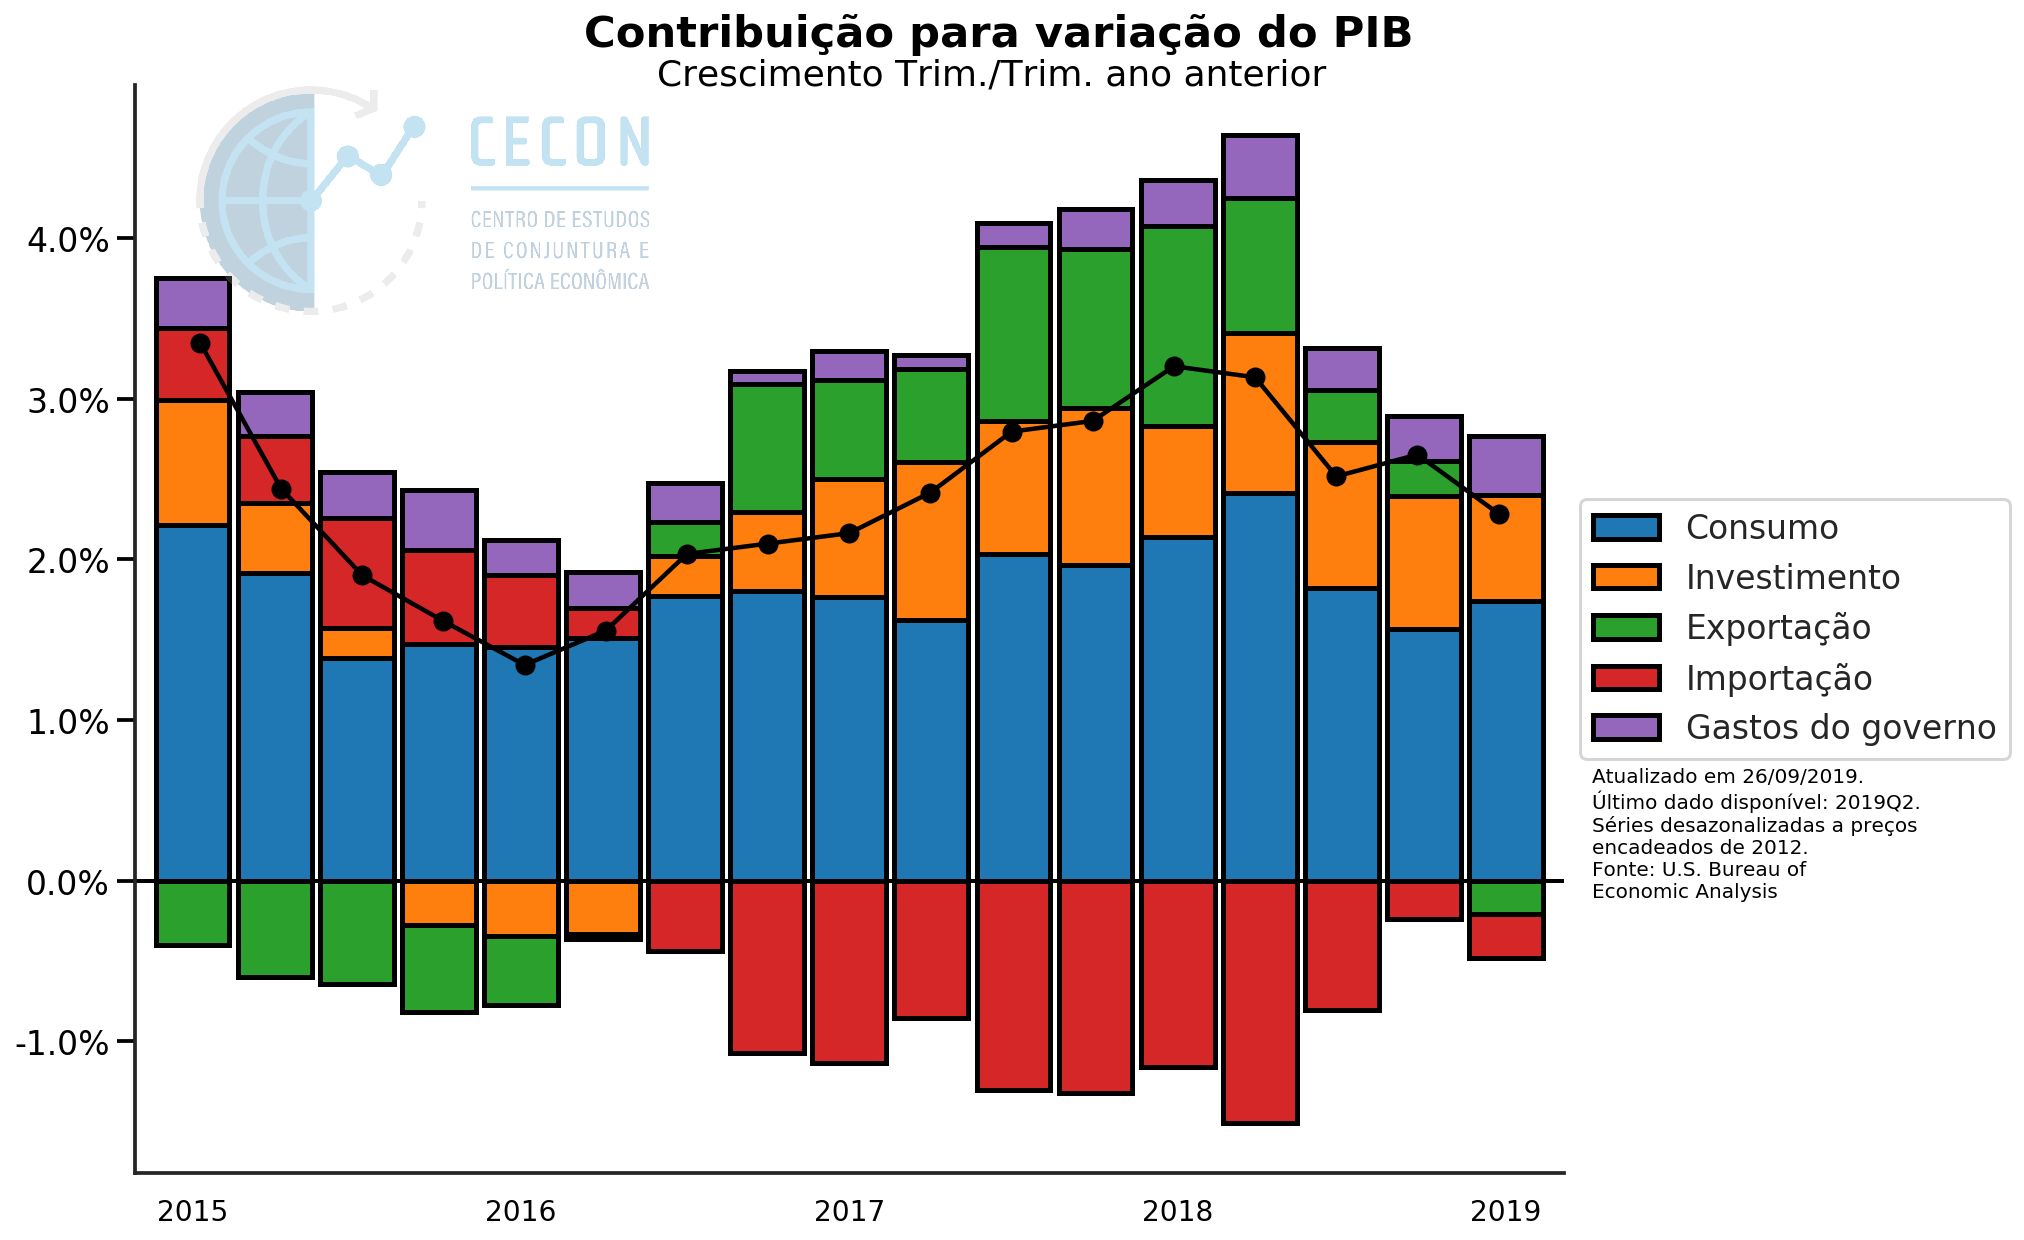

In [5]:
sns.set_context('talk')
fim = 17
periodo = len(df["PIB"]["2002"])

sns.set_context('talk')
fig, ax = plt.subplots(figsize=(16, 10))
#comercial = len(df[df.tail(fim).index[0].strftime("%Y-%m-%d"):"2018-01-01"].index)/len(df.tail(fim).index)*len(df.columns)

contribuicao = (df.drop("PIB", axis='columns').diff(
    periodo).apply(lambda x: x / (df["PIB"].shift(periodo))).tail(fim))
soma = df.drop("PIB", axis='columns').diff(periodo).apply(lambda x: x / (df[
    "PIB"].shift(periodo))).tail(fim).sum(axis=1)

contribuicao.apply(lambda x: (x / soma) * df["PIB"].pct_change(periodo).tail(
    fim)).plot(
        kind='bar',
        stacked=True,
        ax=ax,
        width=0.9,
        # cmap="RdYlGn",
        edgecolor='black',
        linewidth=2.5,
        figsize=(16, 10),
        zorder=1)

ax.axhline(y=0, color='black', linestyle='-', lw=2)
#ax.axvline(x=comercial, color='black', ls='--')
#ax.axvline(x=tributaria, color='black', ls='--')

axl = ax.twiny()
axl.plot(ax.get_xticks(),
         df["PIB"].pct_change(periodo).tail(fim),
         marker='o',
         ls='-',
         color='black',
         label='PIB')

axl.axis('off')

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.suptitle(
    'Contribuição para variação do PIB',
    color='black',
    weight='bold',
    y=.93)

ax.set_title('Crescimento Trim./Trim. ano anterior',
             color='black', y=.99, x=.6)

ax.text(1.02,
        0.25,
        'Fonte: U.S. Bureau of \nEconomic Analysis',
        verticalalignment='bottom',
        horizontalalignment='left',
        transform=ax.transAxes,
        color='black',
        fontsize=10)
ax.text(1.02,
        0.29,
        'Atualizado em {}. \nÚltimo dado disponível: {}. \nSéries {}.'.format(
            datetime.datetime.now().strftime("%d/%m/%Y"),
            df.index[-1].to_period('Q'),
            "desazonalizadas a preços \nencadeados de 2012"),
        verticalalignment='bottom',
        horizontalalignment='left',
        transform=ax.transAxes,
        color='black',
        fontsize=10)

ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.yaxis.label.set_color('black')
ax.xaxis.label.set_color('black')
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.1%}'.format(y)))

labels = [i.strftime("%Y") for i in df.tail(fim).index]
dates = ["" for i in df.tail(fim).index]

for i in range(len(dates)):

    if i % 4 == 0:
        dates[i] = labels[i]

ax.tick_params(axis='x', which='minor', width=1)

ax.xaxis.set_ticklabels(dates,
                        fontsize=14,
                        minor=False,
                        rotation=0,
                        color='black')
ax.xaxis.set_ticks_position('none')

ax2 = fig.add_axes([0.15, 0.7, 0.2, 0.2], zorder=0)
ax2.imshow(logo, aspect='equal', zorder=0, alpha=.25)

ax2.axis('off')

sns.despine()
fig.savefig(
    'Apresentacao/figs/Contrib_Var_AnoAnterior.png',
    bbox_inches='tight',
    dpi=300,
    pad_inches=0.05
)
plt.show()

In [6]:
comercial = len(df[df.tail(fim).index[0].strftime("%Y-%m-%d"):"2018-01-01"].index)/len(df.tail(fim).index)*len(df.columns)

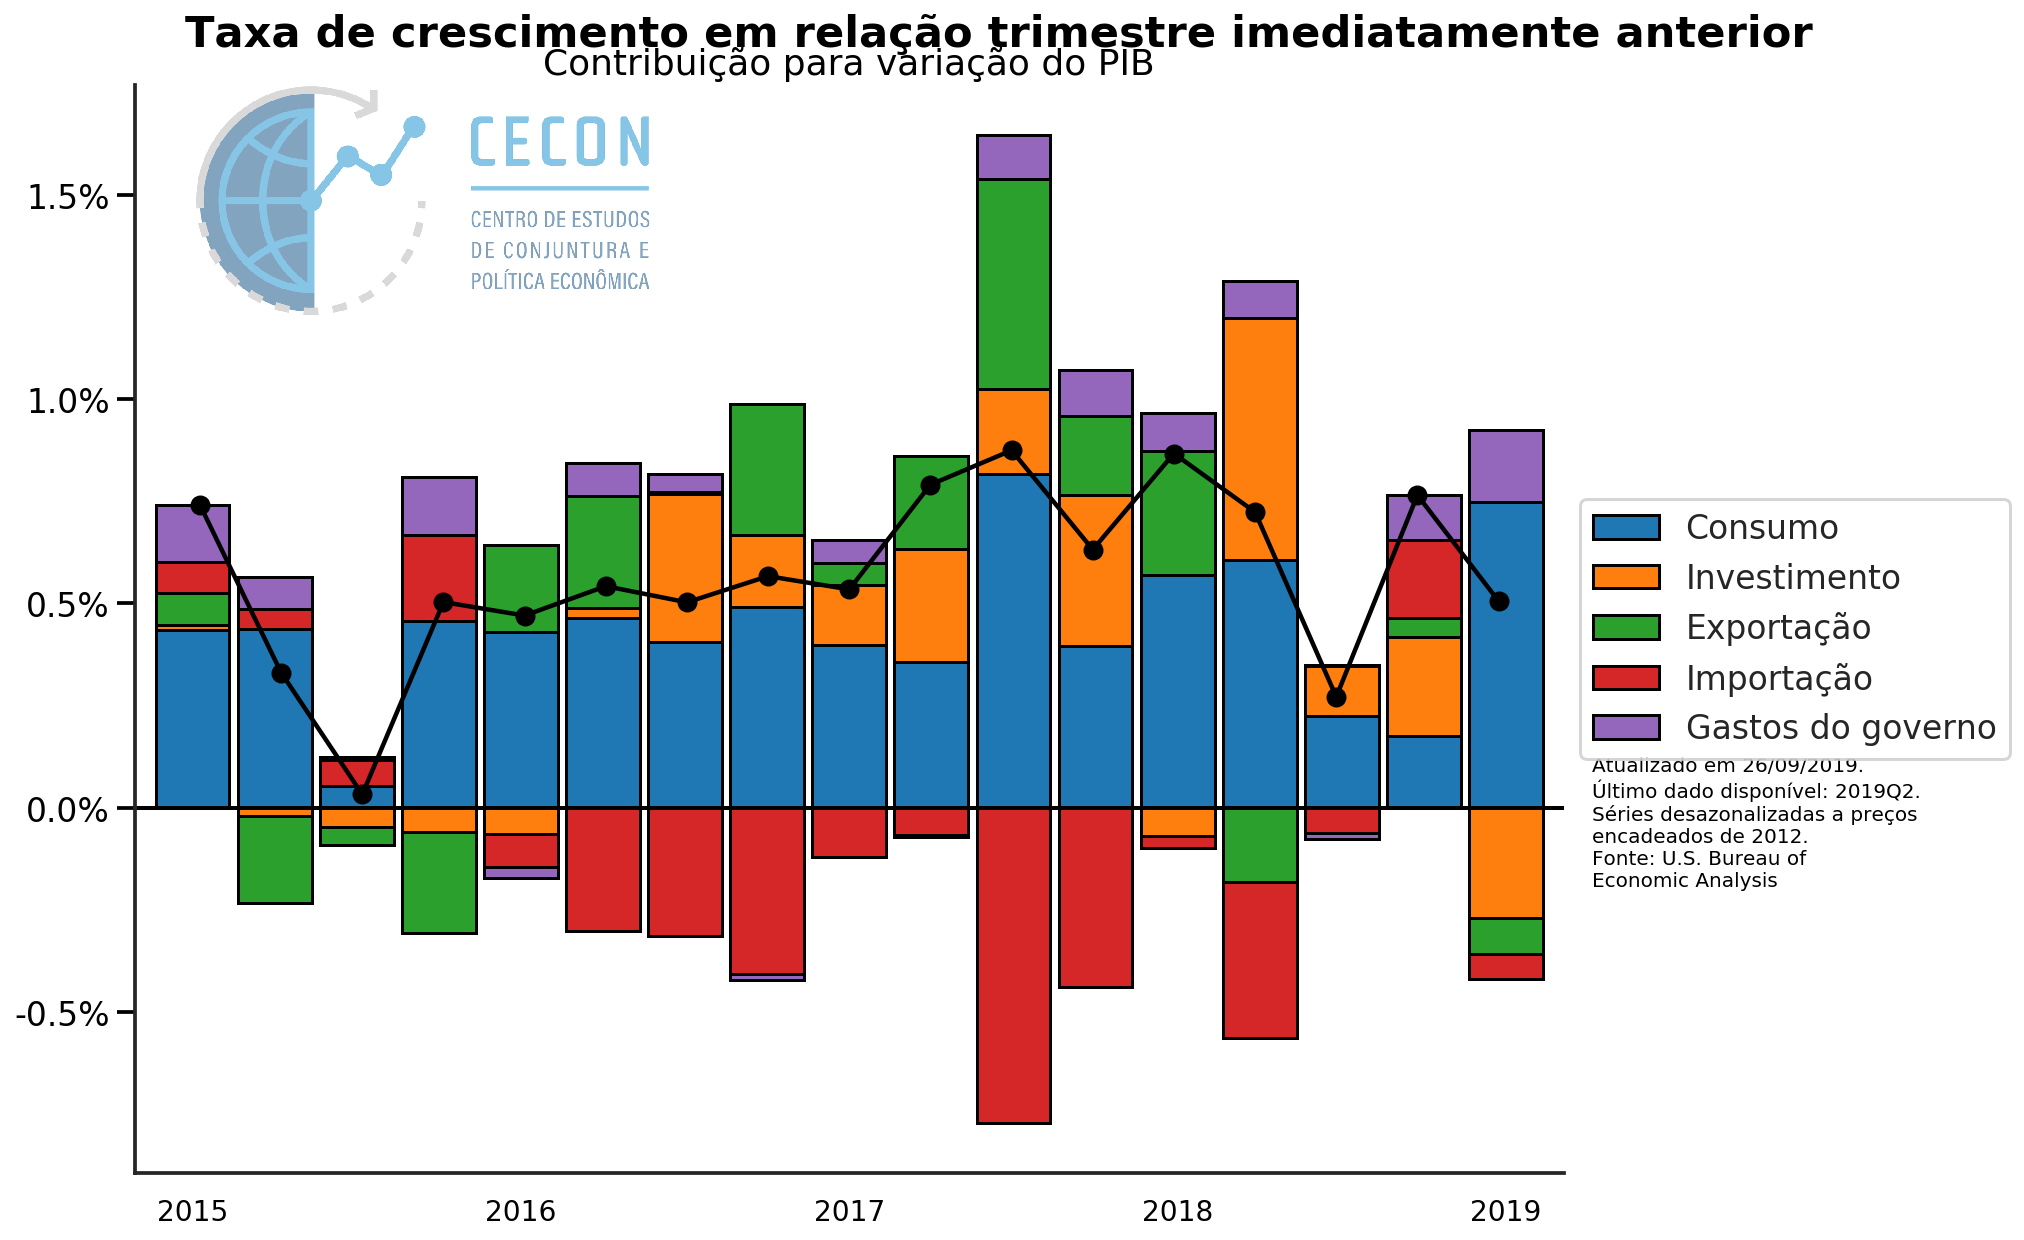

In [7]:
sns.set_context('talk')
fim = 17
periodo = 1
sns.set_context('talk')
fig, ax = plt.subplots()

contribuicao = (df.drop("PIB", axis='columns').diff(
    periodo).apply(lambda x: x / (df["PIB"].shift(periodo))).tail(fim))
soma = df.drop("PIB", axis='columns').diff(periodo).apply(lambda x: x / (df[
    "PIB"].shift(periodo))).tail(fim).sum(axis=1)

contribuicao.apply(lambda x: (x / soma) * df["PIB"].pct_change(periodo).tail(
    fim)).plot(
        kind='bar',
        stacked=True,
        ax=ax,
        width=0.9,
        # cmap="RdYlGn",
        edgecolor='black',
        figsize=(16, 10),
        zorder=1)

ax.axhline(y=0, color='black', linestyle='-', lw=2)

axl = ax.twiny()
axl.plot(ax.get_xticks(),
         df["PIB"].pct_change(periodo).tail(fim),
         marker='o',
         ls='-',
         color='black',
         label='PIB')

axl.axis('off')

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.suptitle(
    'Taxa de crescimento em relação trimestre imediatamente anterior',
    color='black',
    weight='bold',
    y=.93)

ax.set_title('Contribuição para variação do PIB', color='black', y=.999)

ax.text(1.02,
        0.26,
        'Fonte: U.S. Bureau of \nEconomic Analysis',
        verticalalignment='bottom',
        horizontalalignment='left',
        transform=ax.transAxes,
        color='black',
        fontsize=10)
ax.text(1.02,
        0.3,
        'Atualizado em {}. \nÚltimo dado disponível: {}. \nSéries {}.'.format(
            datetime.datetime.now().strftime("%d/%m/%Y"),
            df.index[-1].to_period('Q'),
            "desazonalizadas a preços \nencadeados de 2012"),
        verticalalignment='bottom',
        horizontalalignment='left',
        transform=ax.transAxes,
        color='black',
        fontsize=10)

ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.yaxis.label.set_color('black')
ax.xaxis.label.set_color('black')
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.1%}'.format(y)))

labels = [i.strftime("%Y") for i in df.tail(fim).index]
dates = ["" for i in df.tail(fim).index]

for i in range(len(dates)):

    if i % 4 == 0:
        dates[i] = labels[i]

ax.tick_params(axis='x', which='minor', width=1)

ax.xaxis.set_ticklabels(dates,
                        fontsize=14,
                        minor=False,
                        rotation=0,
                        color='black')
ax.xaxis.set_ticks_position('none')

ax2 = fig.add_axes([0.15, 0.7, 0.2, 0.2])
ax2.imshow(logo, aspect='equal', zorder=0, alpha=.5)

ax2.axis('off')

sns.despine()
fig.savefig(
    'Contrib_Var_TrimAnterior.png',
    bbox_inches='tight', 
    dpi=300,
    pad_inches=0.05
)
plt.show()

## Taxa de desemprego

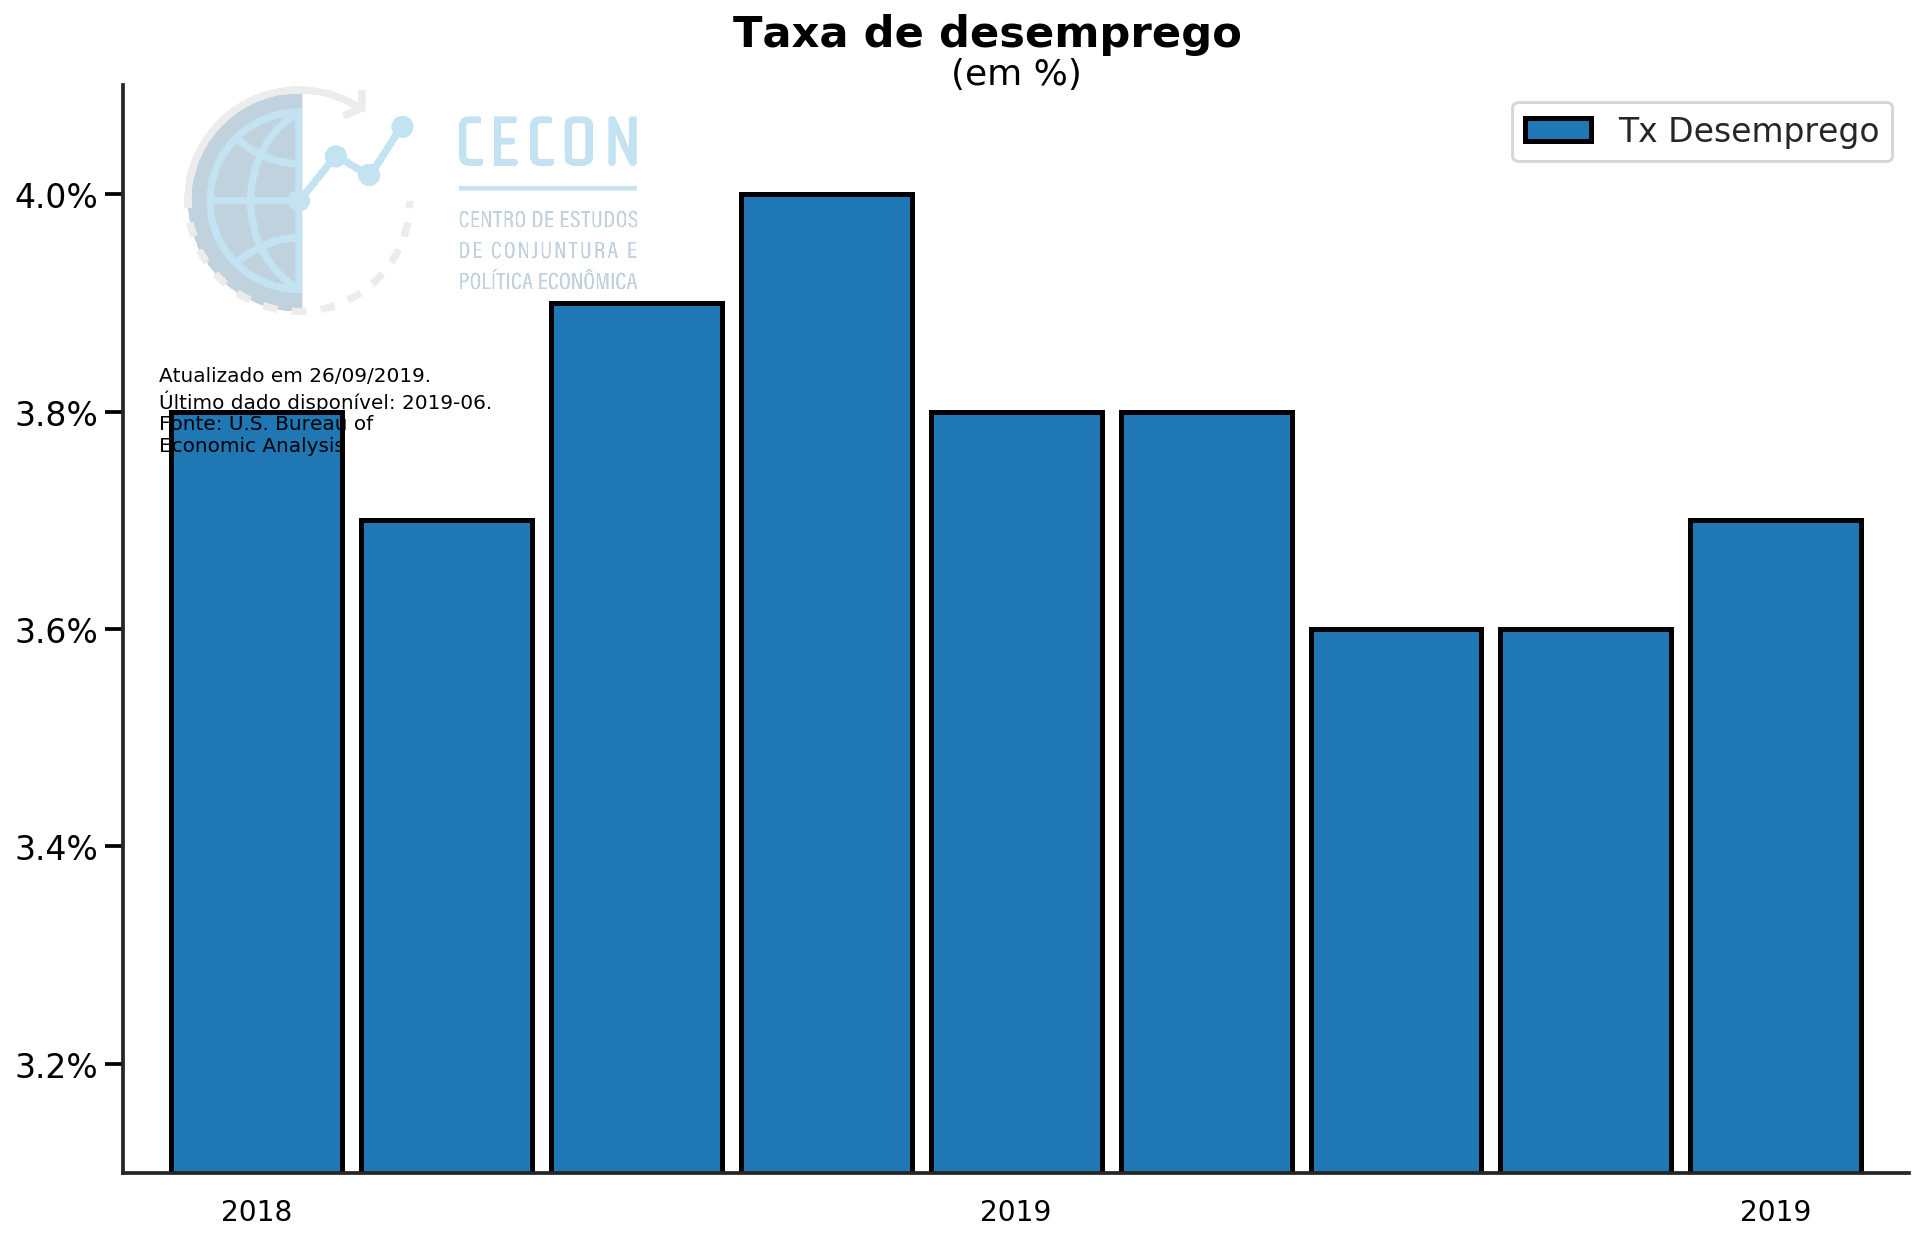

In [8]:
df = web.DataReader(
    [
        'UNRATE'
    ],
    'fred',
    start,
    end)
df.columns = [
    "Tx Desemprego",
]
df.index.name = ''
df = df/100

sns.set_context('talk')
fim = 4*2+1
periodo = len(df["2002"])

sns.set_context('talk')
fig, ax = plt.subplots(figsize=(16, 10))

df.tail(fim).plot(
    kind='bar',
    ax=ax,
    width=0.9,
    edgecolor='black',
    linewidth=2.5,
    figsize=(16, 10),
    zorder=1)

plt.suptitle(
    'Taxa de desemprego', 
    color='black',
    weight='bold',
    y=.93)

ax.set_title(
    '(em %)', 
    color='black',
    y=.99)

ax.text(.02,
        0.66,
        'Fonte: U.S. Bureau of \nEconomic Analysis',
        verticalalignment='bottom',
        horizontalalignment='left',
        transform=ax.transAxes,
        color='black',
        fontsize=10)
ax.text(.02,
        0.7,
        'Atualizado em {}. \nÚltimo dado disponível: {}.'.format(
            datetime.datetime.now().strftime("%d/%m/%Y"),
            df.index[-1].to_period('M')),
        verticalalignment='bottom',
        horizontalalignment='left',
        transform=ax.transAxes,
        color='black',
        fontsize=10)

ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.yaxis.label.set_color('black')
ax.xaxis.label.set_color('black')
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.1%}'.format(y)))
ax.set_ylim(0.031,0.041)

labels = [i.strftime("%Y") for i in df.tail(fim).index]
dates = ["" for i in df.tail(fim).index]

for i in range(len(dates)):

    if i % 4 == 0:
        dates[i] = labels[i]

ax.tick_params(axis='x', which='minor', width=1)

ax.xaxis.set_ticklabels(dates,
                        fontsize=14,
                        minor=False,
                        rotation=0,
                        color='black')
ax.xaxis.set_ticks_position('none')

ax2 = fig.add_axes([0.15, 0.7, 0.2, 0.2], zorder=0)
ax2.imshow(logo, aspect='equal', zorder=0, alpha=.25)

ax2.axis('off')

sns.despine()
fig.savefig(
    'Desemprego.png',
    bbox_inches='tight',
    dpi=300,
    pad_inches=0.05
)
plt.show()

## Produção industrial

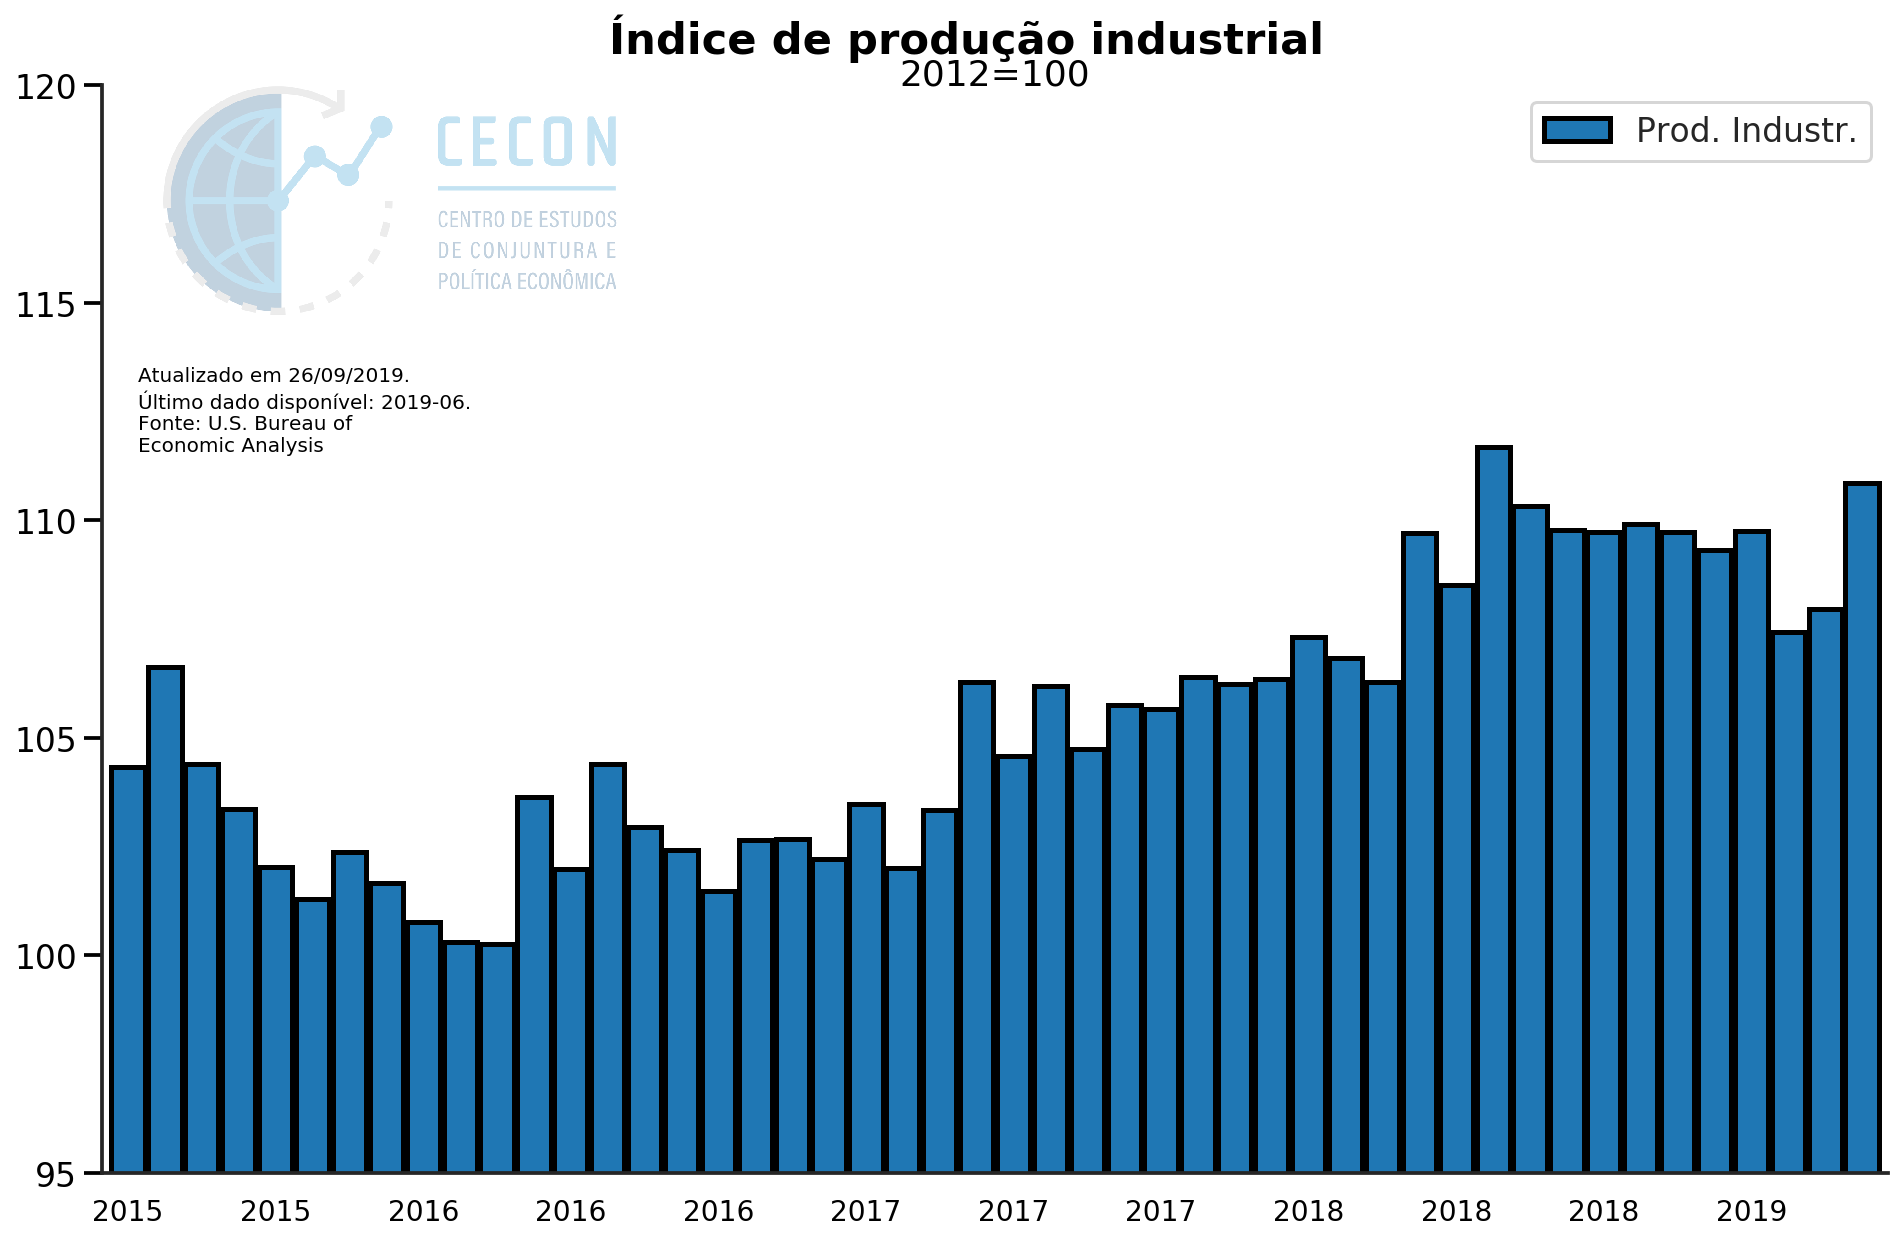

In [9]:
df = web.DataReader(
    [
        'IPB50001N'
    ],
    'fred',
    start,
    end)
df.columns = [
    "Prod. Industr.",
]
df.index.name = ''

sns.set_context('talk')
fim = 12*4
periodo = len(df["2002"])

fig, ax = plt.subplots(figsize=(16, 10))

df.tail(fim).plot(
    kind='bar',
    ax=ax,
    width=0.9,
    edgecolor='black',
    linewidth=2.5,
    figsize=(16, 10),
    zorder=1)

plt.suptitle(
    'Índice de produção industrial', 
    color='black',
    weight='bold',
    y=.93)

ax.set_title(
    '2012=100', 
    color='black',
    y=.99)

ax.text(.02,
        0.66,
        'Fonte: U.S. Bureau of \nEconomic Analysis',
        verticalalignment='bottom',
        horizontalalignment='left',
        transform=ax.transAxes,
        color='black',
        fontsize=10)
ax.text(.02,
        0.7,
        'Atualizado em {}. \nÚltimo dado disponível: {}.'.format(
            datetime.datetime.now().strftime("%d/%m/%Y"),
            df.index[-1].to_period('M')),
        verticalalignment='bottom',
        horizontalalignment='left',
        transform=ax.transAxes,
        color='black',
        fontsize=10)

ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.yaxis.label.set_color('black')
ax.xaxis.label.set_color('black')
ax.set_ylim(95,120)

labels = [i.strftime("%Y") for i in df.tail(fim).index]
dates = ["" for i in df.tail(fim).index]

for i in range(len(dates)):

    if i % 4 == 0:
        dates[i] = labels[i]

ax.tick_params(axis='x', which='minor', width=1)

ax.xaxis.set_ticklabels(dates,
                        fontsize=14,
                        minor=False,
                        rotation=0,
                        color='black')
ax.xaxis.set_ticks_position('none')

ax2 = fig.add_axes([0.15, 0.7, 0.2, 0.2], zorder=0)
ax2.imshow(logo, aspect='equal', zorder=0, alpha=.25)

ax2.axis('off')

sns.despine()
fig.savefig(
    'ProdIndust.png',
    bbox_inches='tight',
    dpi=300,
    pad_inches=0.05
)
plt.show()

# Investimento

## Decomposição do investimento

In [10]:
df = web.DataReader(
    [
        'GPDI',  # Gross Private Domestic Investment
        'Y033RC1Q027SBEA',  # Gross Private Domestic Investment: Fixed Investment: Nonresidential: Equipment
        'B009RC1Q027SBEA',  # Private fixed investment: Nonresidential: Structures
        'Y001RC1Q027SBEA',  # Gross Private Domestic Investment: Fixed Investment: Nonresidential: Intellectual Property Products
        'PRFI', # Private Residential Fixed Investment
        'CBI', # Change in Private Inventories
    ],
    'fred',
    start,
    end)
df.columns = [
    "FBCF",  
    "Máquinas e equipamentos", 
    'Construação',
    "Propriedade intelectual",
    "Residencial",
    "Variação de Estoque"
]
df.index.name = ''
((df.pct_change(4).round(3))*100).tail()

FBCF  Máquinas e equipamentos  Construação  \
                                                         
2018-04-01   6.8                      7.2          8.7   
2018-07-01   8.3                      6.8          9.9   
2018-10-01   7.7                      5.3          6.9   
2019-01-01   6.8                      3.9          4.9   
2019-04-01   5.3                      3.1         -0.6   

            Propriedade intelectual  Residencial  Variação de Estoque  
                                                                       
2018-04-01                      9.7          5.4               -152.9  
2018-07-01                      9.3          4.7                 53.6  
2018-10-01                     10.1          0.9                215.8  
2019-01-01                      9.8          0.5                173.2  
2019-04-01                      8.2         -0.6               -848.8

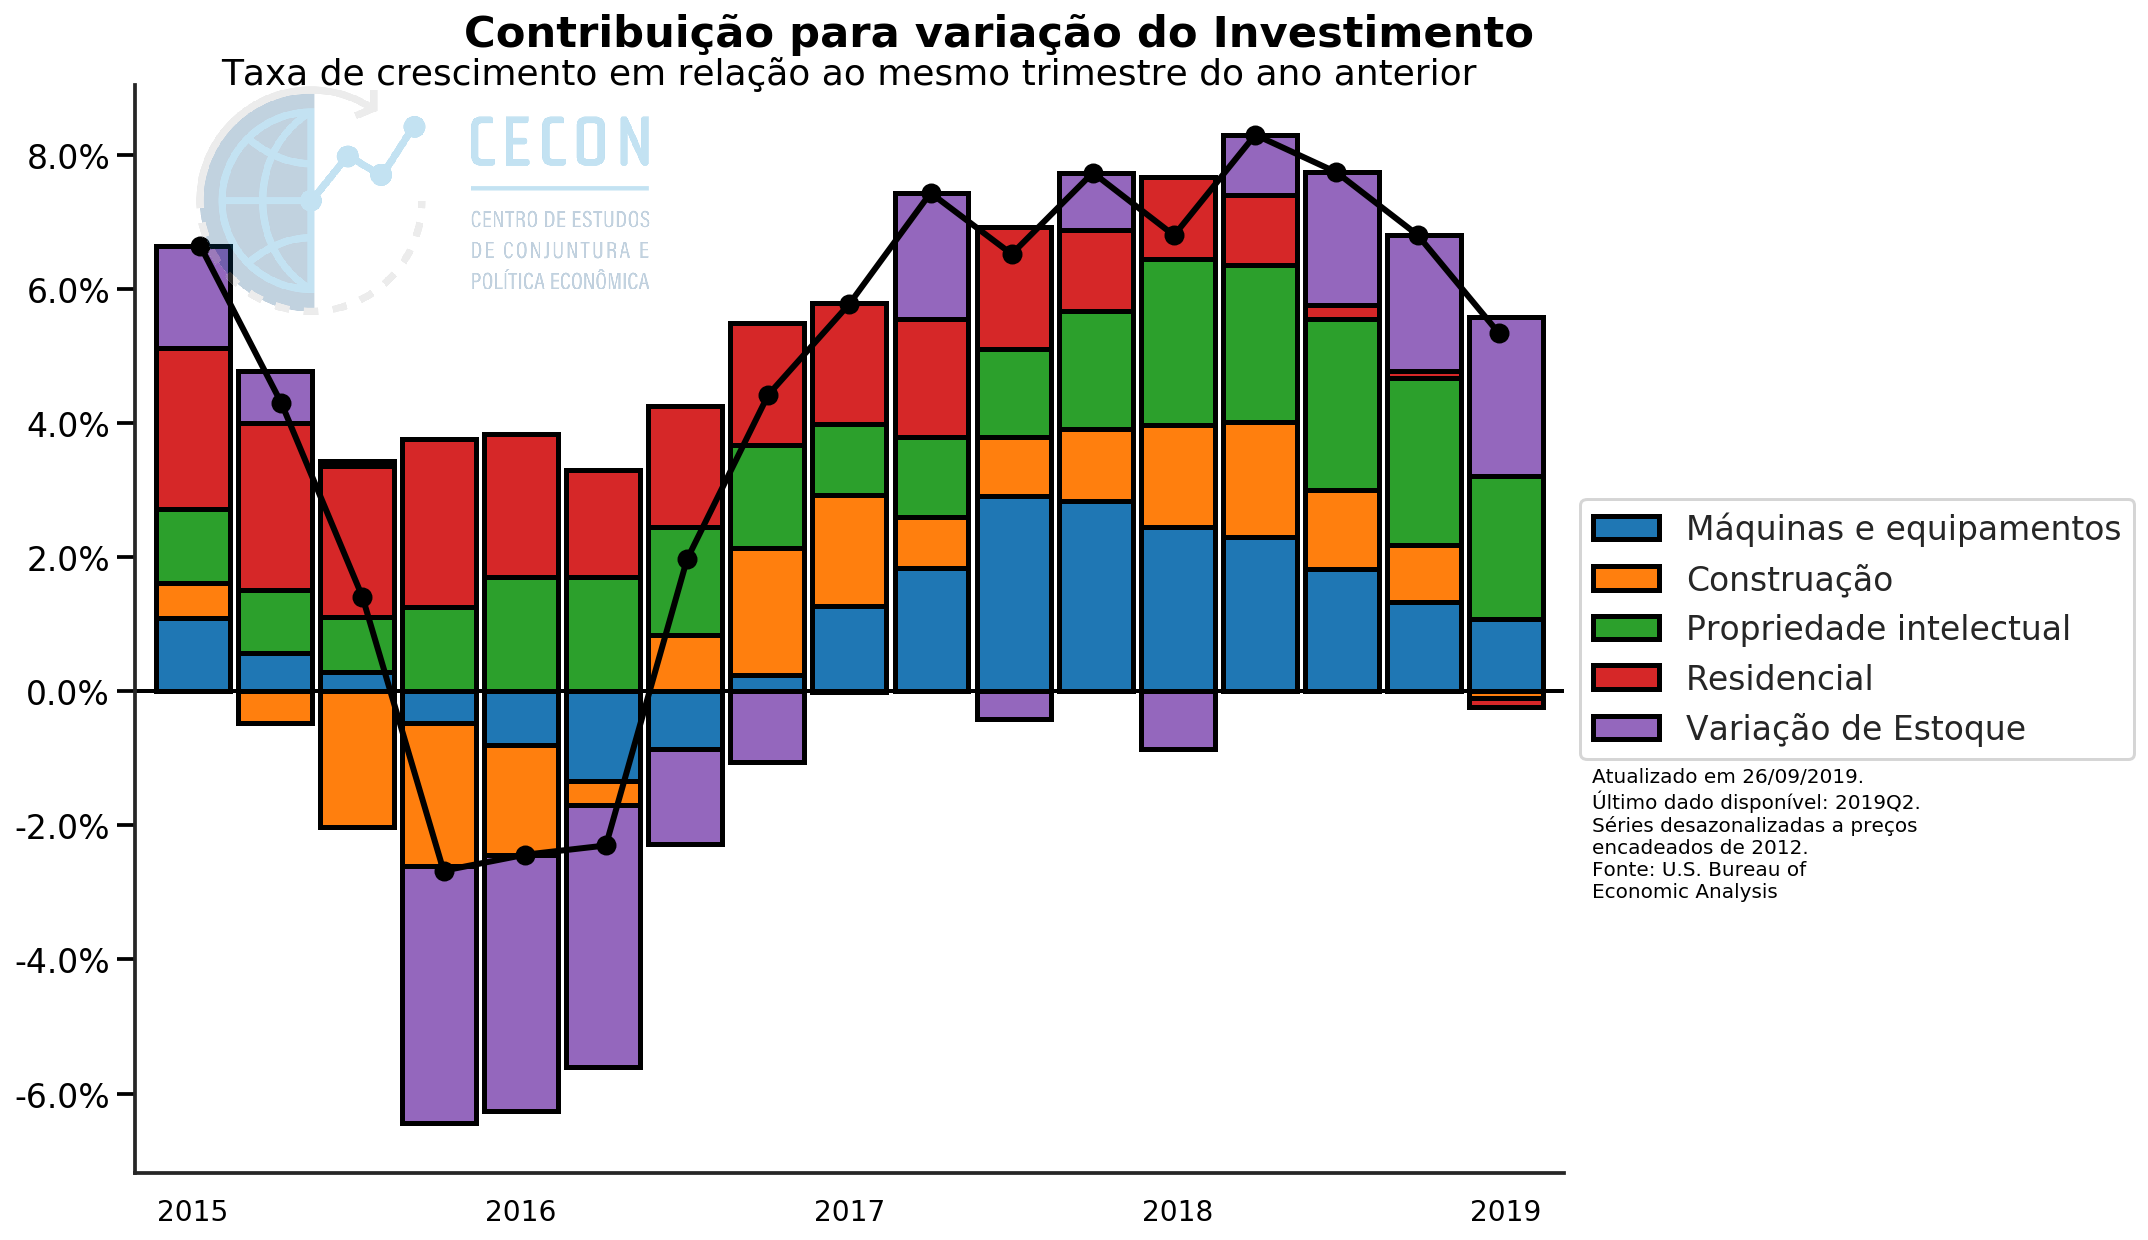

In [11]:
sns.set_context('talk')
fim = 17
periodo = len(df["FBCF"]["2002"])
fig, ax = plt.subplots(figsize=(16, 10))

contribuicao = (df.drop("FBCF", axis='columns').diff(
    periodo).apply(lambda x: x / (df["FBCF"].shift(periodo))).tail(fim))
soma = df.drop("FBCF", axis='columns').diff(periodo).apply(lambda x: x / (df[
    "FBCF"].shift(periodo))).tail(fim).sum(axis=1)

contribuicao.apply(lambda x: (x / soma) * df["FBCF"].pct_change(periodo).tail(
    fim)).plot(
        kind='bar',
        stacked=True,
        ax=ax,
        width=0.9,
        # cmap="RdYlGn",
        edgecolor='black',
        linewidth=2.5,
        figsize=(16, 10),
        zorder=1)

ax.axhline(y=0, color='black', linestyle='-', lw=2)

axl = ax.twiny()
axl.plot(ax.get_xticks(),
         df["FBCF"].pct_change(periodo).tail(fim),
         marker='o',
         ls='-',
         color='black',
         lw=3,
         label='PIB')

axl.axis('off')

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.suptitle(
    'Contribuição para variação do Investimento',
    color='black',
    weight='bold',
    y=.93)

ax.set_title(
    'Taxa de crescimento em relação ao mesmo trimestre do ano anterior', color='black', y=.99)

ax.text(1.02,
        0.25,
        'Fonte: U.S. Bureau of \nEconomic Analysis',
        verticalalignment='bottom',
        horizontalalignment='left',
        transform=ax.transAxes,
        color='black',
        fontsize=10)
ax.text(1.02,
        0.29,
        'Atualizado em {}. \nÚltimo dado disponível: {}. \nSéries {}.'.format(
            datetime.datetime.now().strftime("%d/%m/%Y"),
            df.index[-1].to_period('Q'),
            "desazonalizadas a preços \nencadeados de 2012"),
        verticalalignment='bottom',
        horizontalalignment='left',
        transform=ax.transAxes,
        color='black',
        fontsize=10)

ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.yaxis.label.set_color('black')
ax.xaxis.label.set_color('black')
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.1%}'.format(y)))

labels = [i.strftime("%Y") for i in df.tail(fim).index]
dates = ["" for i in df.tail(fim).index]

for i in range(len(dates)):

    if i % 4 == 0:
        dates[i] = labels[i]

ax.tick_params(axis='x', which='minor', width=1)

ax.xaxis.set_ticklabels(dates,
                        fontsize=14,
                        minor=False,
                        rotation=0,
                        color='black')
ax.xaxis.set_ticks_position('none')

ax2 = fig.add_axes([0.15, 0.7, 0.2, 0.2], zorder=0)
ax2.imshow(logo, aspect='equal', zorder=0, alpha=.25)

ax2.axis('off')

sns.despine()
fig.savefig(
    'Apresentacao/figs/Contrib_Investo_AnoAnterior.png',
    bbox_inches='tight',
    dpi=300,
    pad_inches=0.05
)
plt.show()

## Investimento não residencial

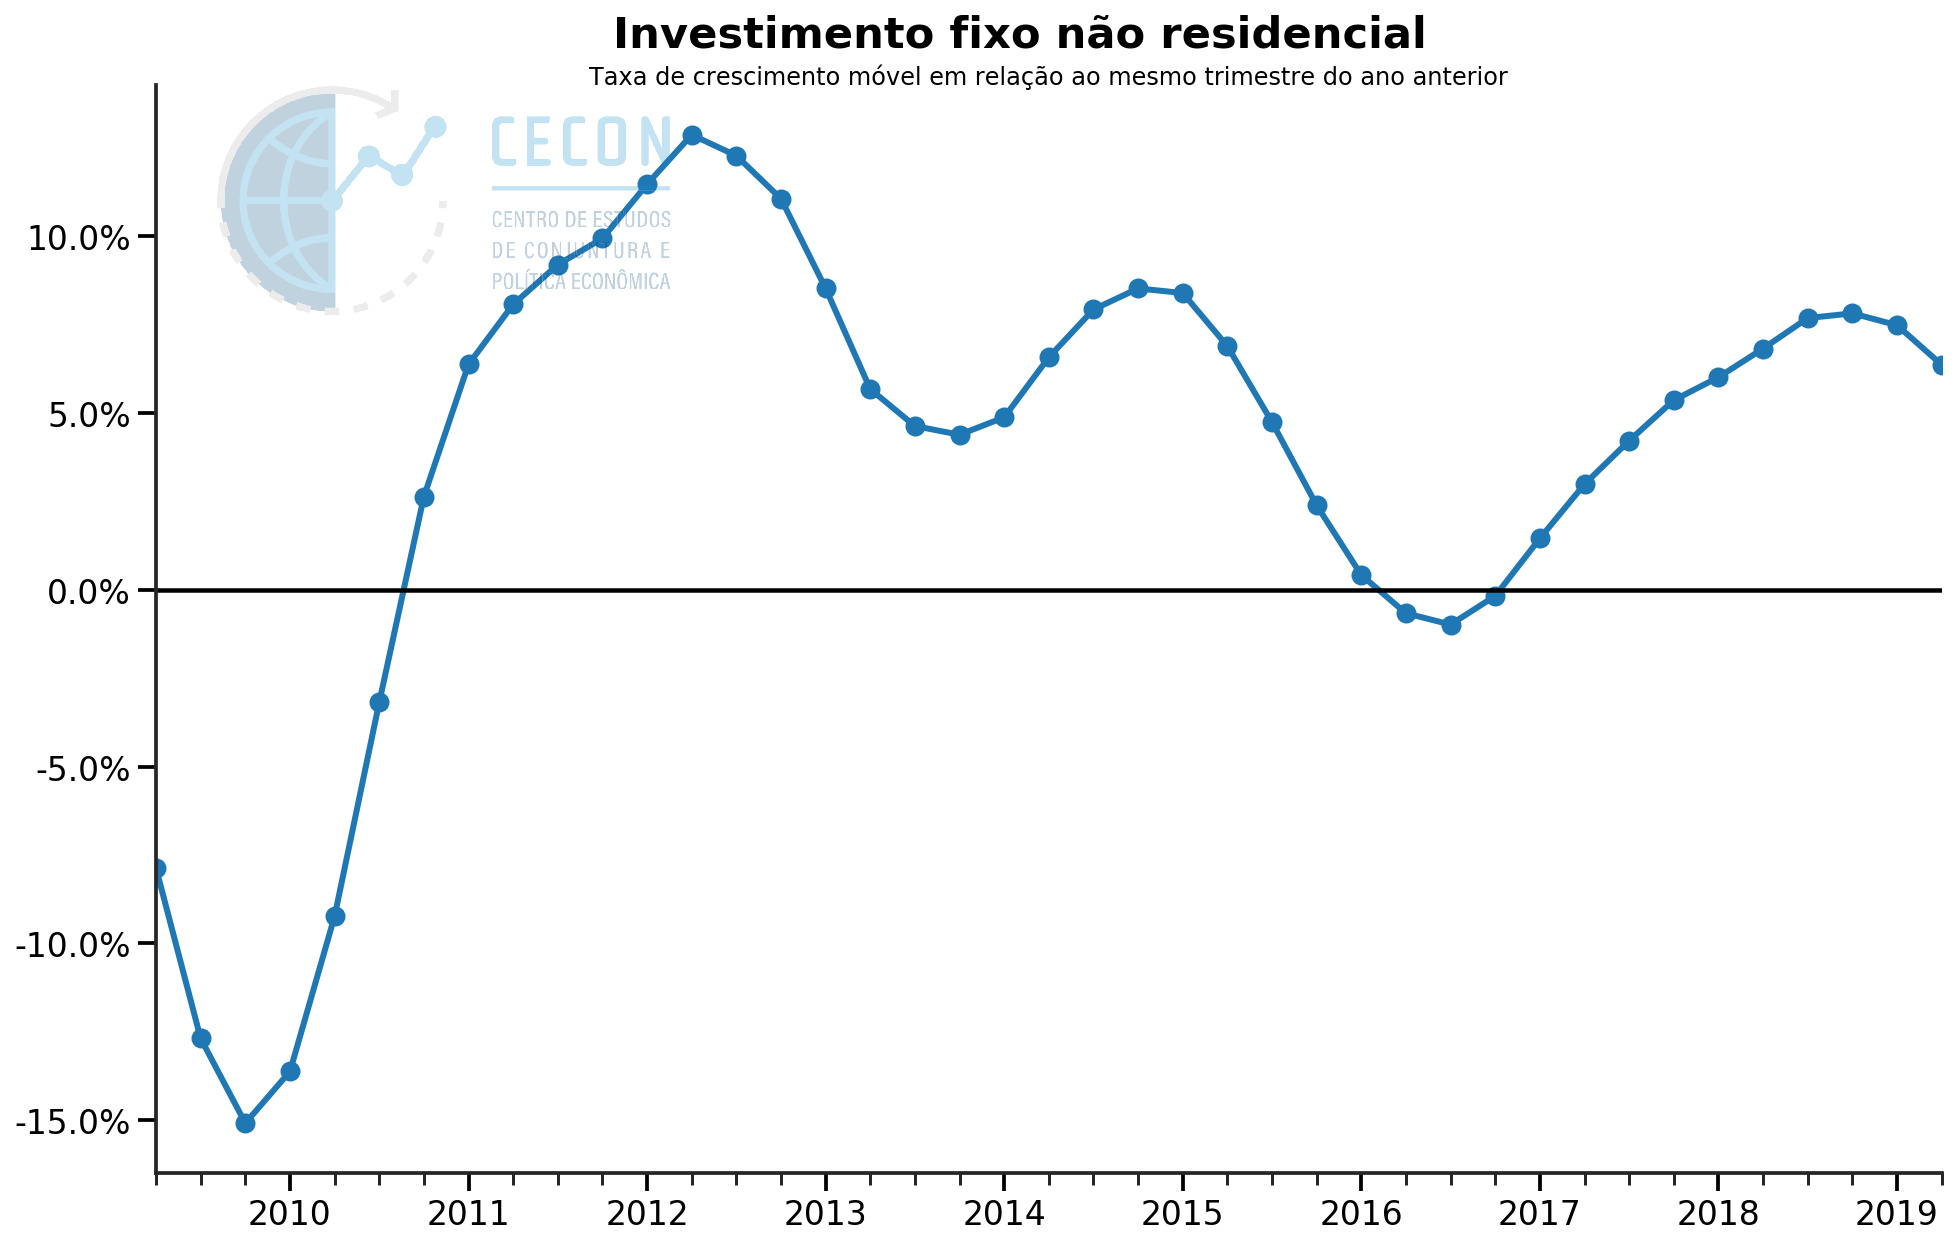

In [12]:
df = web.DataReader(
    [
        'GDPC1',
        'PNFI',
    ],
    'fred',
    start,
    end)
df.columns = [
    "PIB", "Investimento não residencial"
]
df.index.name = ''

sns.set_context('talk')
fim = 41
periodo = len(df["PIB"]["2002"])
fig, ax = plt.subplots(figsize=(16, 10))

df[["Investimento não residencial"]].rolling(periodo).mean().pct_change(periodo).tail(fim).plot(
    ax=ax,
    linewidth=3,
    marker = 'o',
    figsize=(16, 10),
    legend = False,
    zorder=1)

plt.suptitle(
    'Investimento fixo não residencial', 
    color='black',
    weight='bold',
    y=.93)

ax.set_title(
    'Taxa de crescimento móvel em relação ao mesmo trimestre do ano anterior', 
    color='black', fontsize = 12,
    y=.99)


ax.axhline(y=0, color = 'black')

ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.yaxis.label.set_color('black')
ax.xaxis.label.set_color('black')
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.1%}'.format(y)))

ax2 = fig.add_axes([0.15, 0.7, 0.2, 0.2], zorder=0)
ax2.imshow(logo, aspect='equal', zorder=0, alpha=.25)

ax2.axis('off')

sns.despine()
fig.savefig(
    'Apresentacao/figs/Investo_nResidencial_Ano.png',
    bbox_inches='tight',
    dpi=300,
    pad_inches=0.05
)
plt.show()

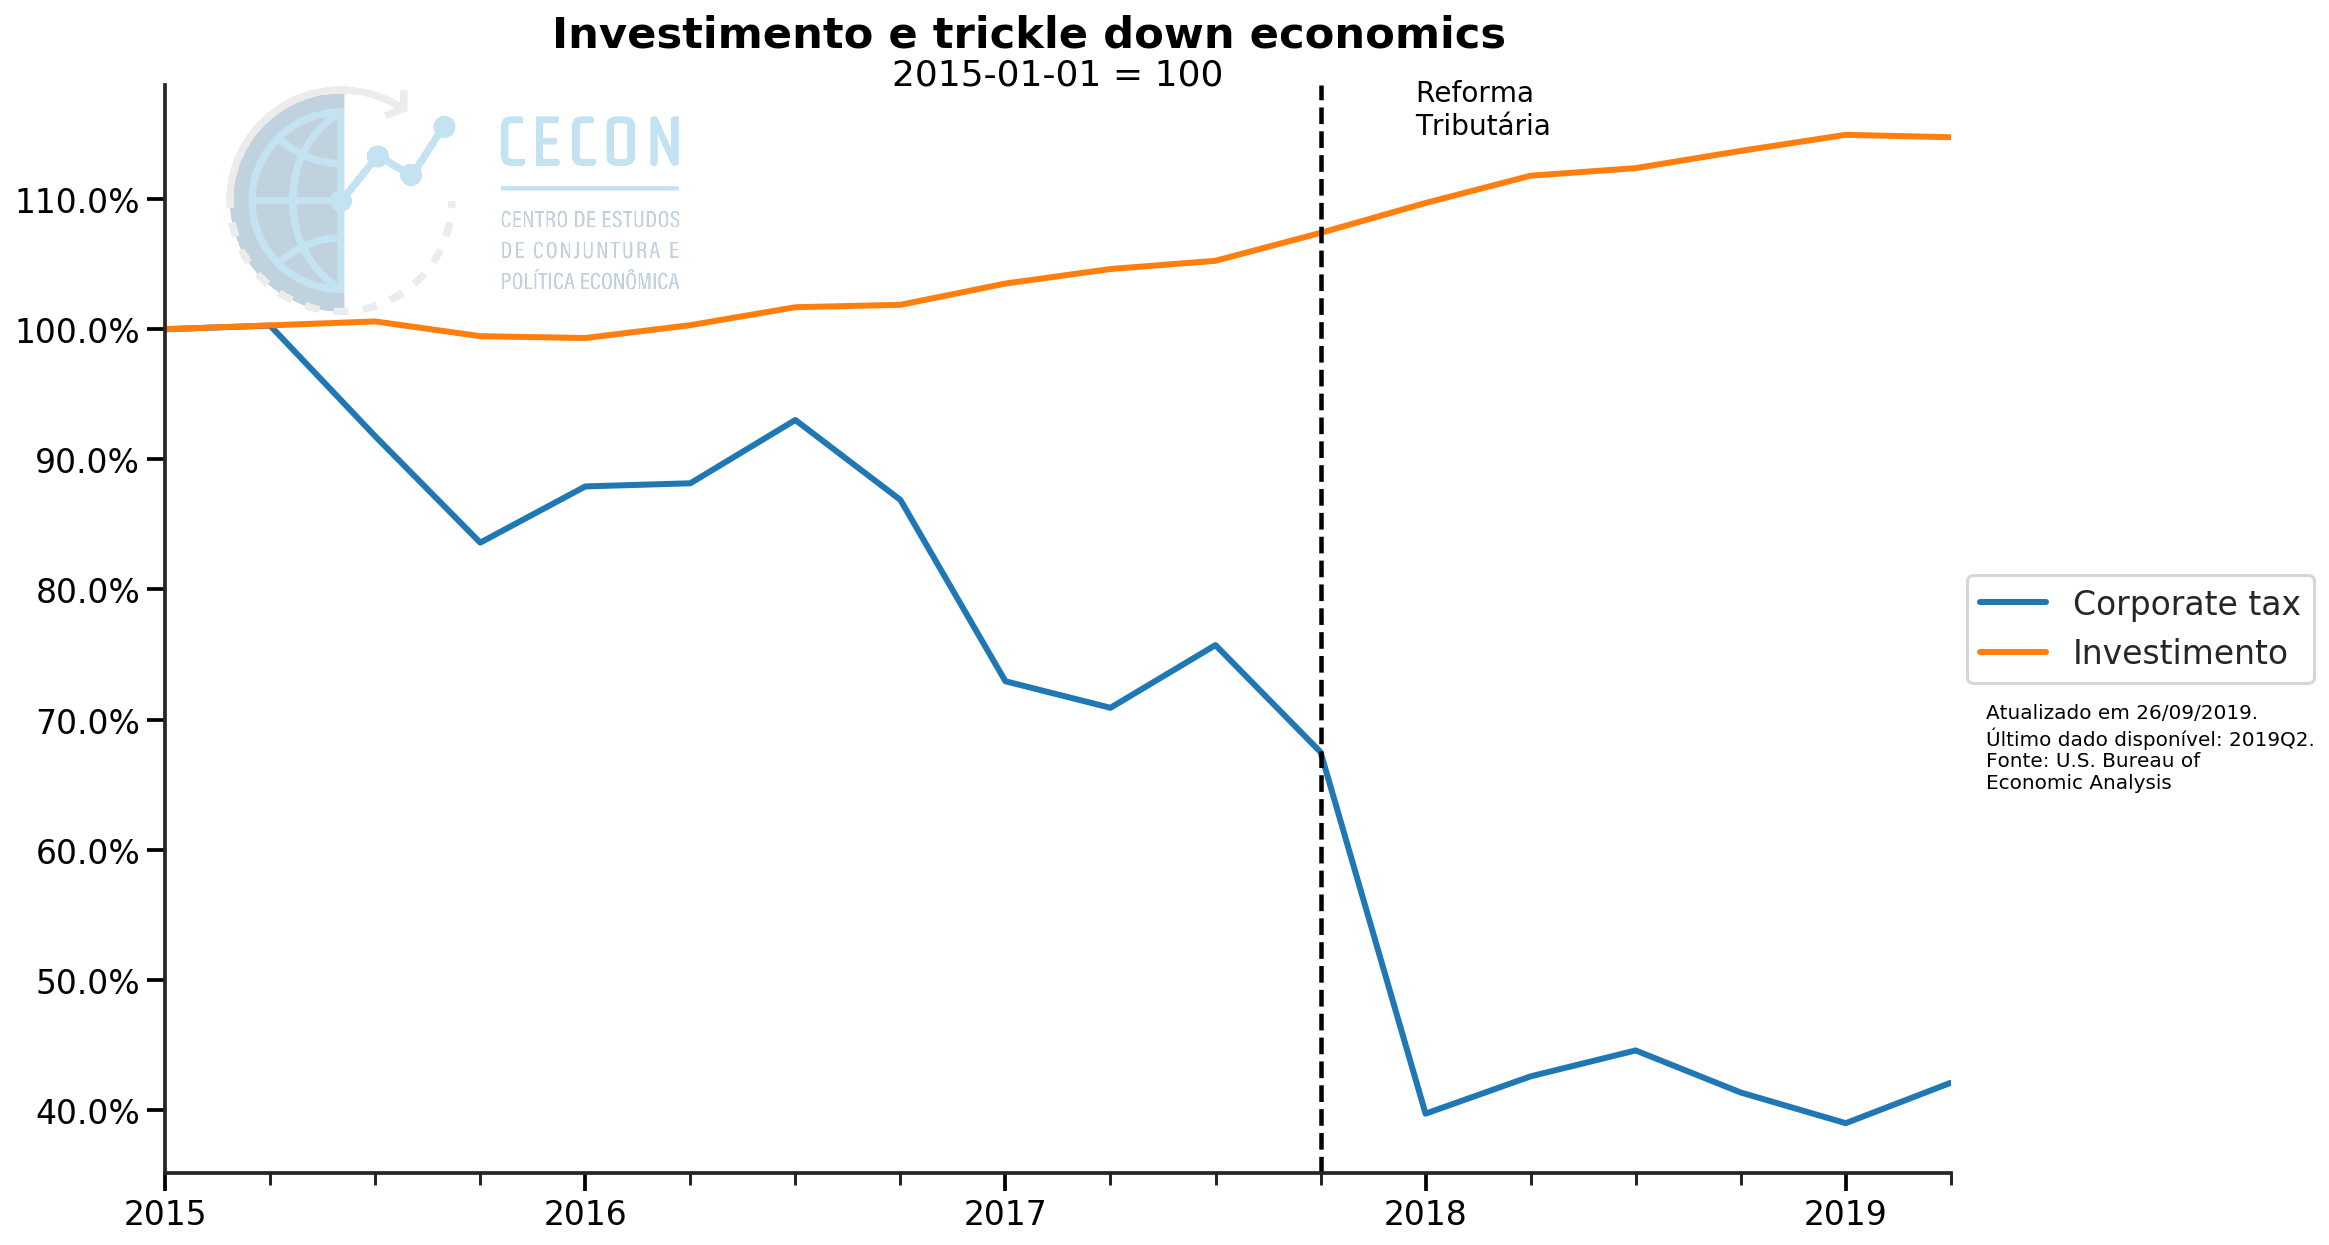

In [13]:
df = web.DataReader(
    [
        'B075RC1Q027SBEA', # Federal government current tax receipts: Taxes on corporate income
        'PNFIC1',
    ],
    'fred',
    start,
    end)
df.columns = [
    "Corporate tax", "Investimento"
]
df.index.name = ''
ano_base = "2015-01-01"
df["Corporate tax"] = df["Corporate tax"]/df["Corporate tax"].loc[ano_base]
df["Investimento"] = df["Investimento"]/df["Investimento"].loc[ano_base] 
df = df.loc[ano_base:,:]

sns.set_context('talk')
periodo = 1
fig, ax = plt.subplots(figsize=(16, 10))

df.plot(
    ax=ax,
    lw = 3,
    figsize=(16, 10),
    zorder=1
)

plt.suptitle(
    'Investimento e trickle down economics', 
    color='black',
    weight='bold',
    y=.93)

ax.axvline(x = "2017-12-20", ls = '--', color = 'black')

ax.set_title(
    '{} = 100'.format(ano_base), 
    color='black',
    y=.99)

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax.text(1.02,
        0.35,
        'Fonte: U.S. Bureau of \nEconomic Analysis',
        verticalalignment='bottom',
        horizontalalignment='left',
        transform=ax.transAxes,
        color='black',
        fontsize=10)
ax.text(1.02,
        0.39,
        'Atualizado em {}. \nÚltimo dado disponível: {}.'.format(
            datetime.datetime.now().strftime("%d/%m/%Y"),
            df.index[-1].to_period('Q')),
        verticalalignment='bottom',
        horizontalalignment='left',
        transform=ax.transAxes,
        color='black',
        fontsize=10
       )

ax.text(
    .7,
    .95,
    'Reforma\nTributária',
    verticalalignment='bottom',
    horizontalalignment='left',
    transform=ax.transAxes,
    color='black',
    fontsize=14
)

ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.yaxis.label.set_color('black')
ax.xaxis.label.set_color('black')
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.1%}'.format(y)))

ax2 = fig.add_axes([0.15, 0.7, 0.2, 0.2], zorder=0)
ax2.imshow(logo, aspect='equal', zorder=0, alpha=.25)

ax2.axis('off')

sns.despine()
fig.savefig(
    'Apresentacao/figs/Investo_TrickleDown.png',
    bbox_inches='tight',
    dpi=300,
    pad_inches=0.05
)
plt.show()

## Investimento residencial

Queda de 6,9% na construção de **novos** imóveis (10% do total) para uma família em relação ao mês imeadiatamente anterior. Esse valor é antecidido por aumentos sucessivos:

- Aumento no preço dos imóveis
- Queda maior que o esperado
- Em relação ao mesmo período do ano passado, houve aumento

[Trade Economics](https://tradingeconomics.com/united-states/new-home-sales)

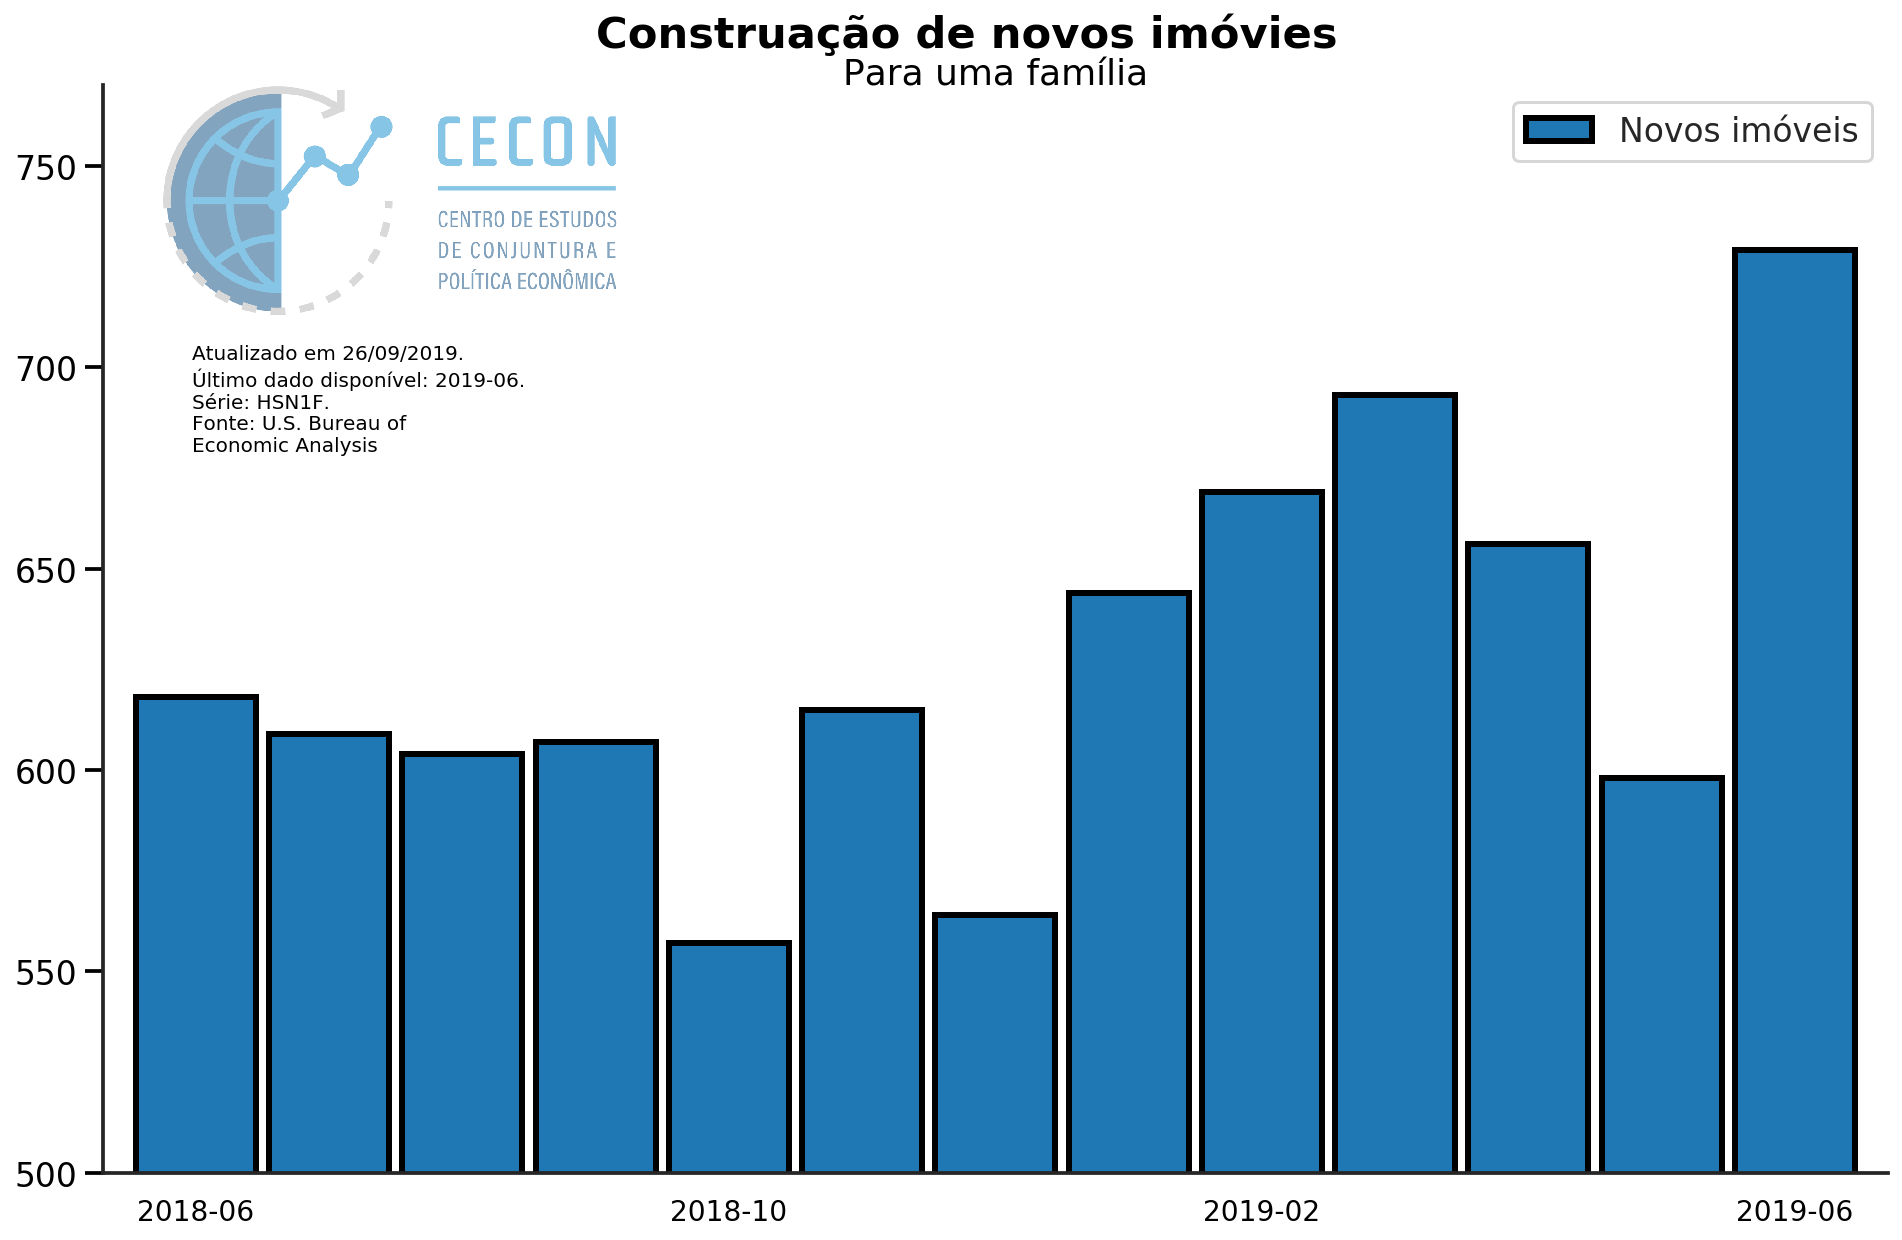

2019-03  2019-04  2019-05  2019-06
Novos imóveis    693.0    656.0    598.0    729.0

In [14]:
df = web.DataReader(
    [
        'HSN1F',  # New One Family Houses Sold: United States
    ],
    'fred',
    start, end
)
df.columns = [
    "Novos imóveis"
]
df = df.dropna()
df.index.name = ''
df.index = df.index.to_period('M')


sns.set_context('talk')
fim = 13
periodo = 1
fig, ax = plt.subplots()


df.tail(fim).plot(
    kind = 'bar', 
    ax = ax,
    width = 0.9,
    edgecolor='black',
    linewidth = 3,
    figsize=(16,10),
    zorder = 1
)


plt.suptitle(
    'Construação de novos imóvies', 
    color='black', 
    weight = 'bold',
    y = .93
)

ax.set_title(
    'Para uma família', 
    color='black', 
    y = 0.99
)

ax.text(0.05, 
        0.66, 
        'Fonte: U.S. Bureau of \nEconomic Analysis',
        verticalalignment='bottom', 
        horizontalalignment='left',
        transform=ax.transAxes,
        color='black', fontsize=10)
ax.text(
    0.05, 
    0.7,
    'Atualizado em {}. \nÚltimo dado disponível: {}. \nSérie: {}.'.format(
        datetime.datetime.now().strftime("%d/%m/%Y"),
        df.index[-1],
        "HSN1F"
    ),
    verticalalignment='bottom',
    horizontalalignment='left',
    transform=ax.transAxes,
    color='black', 
    fontsize=10
)

ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.yaxis.label.set_color('black')
ax.xaxis.label.set_color('black')

labels = [i.strftime("%Y-%m") for i in df.tail(fim).index]
dates = ["" for i in df.tail(fim).index]

for i in range(len(dates)):
  
  if i%4 == 0:
    dates[i] = labels[i]
    
ax.tick_params(axis='x', which='minor', width = 1)

ax.xaxis.set_ticklabels(
    dates, 
    fontsize = 14,
    minor = False,
    rotation = 0,
    color = 'black'
)
ax.xaxis.set_ticks_position('none') 

ax.set_ylim(500,770)

ax2 = fig.add_axes([0.15,0.7,0.2,0.2])
ax2.imshow(
    logo, 
    aspect='equal',
    zorder=0,
    alpha=.5
)

ax2.axis('off')

sns.despine()
fig.savefig(
    'InvetResid_NovosImoveis.png',
    bbox_inches='tight', 
    dpi=300 ,
    pad_inches=0.05
)
plt.show()
df.tail(4).transpose()

In [15]:
df = web.DataReader(
    [
        'CSUSHPINSA',
        'NASDAQCOM'
    ],
    'fred',
    start, end
)
df.columns = [
    "Case-Shiller index",
    'NASDAQ'
]

ano_base = "2007-11-01"

df = df.dropna()
df.index.name = ''
df.index = df.index.to_period('M')
df['Case-Shiller index'] = df['Case-Shiller index']/df['Case-Shiller index'].loc[ano_base]
df['NASDAQ'] = df['NASDAQ']/df['NASDAQ'].loc[ano_base]
df.head()

Case-Shiller index    NASDAQ
                                     
1987-04            0.371035  0.153262
1987-05            0.374312  0.149719
1987-06            0.378131  0.148492
1987-07            0.381351  0.151873
1987-09            0.386118  0.161906

In [16]:
df.loc["2007-11-01",:]

Case-Shiller index    1.0
NASDAQ                1.0
Name: 2007-11, dtype: float64

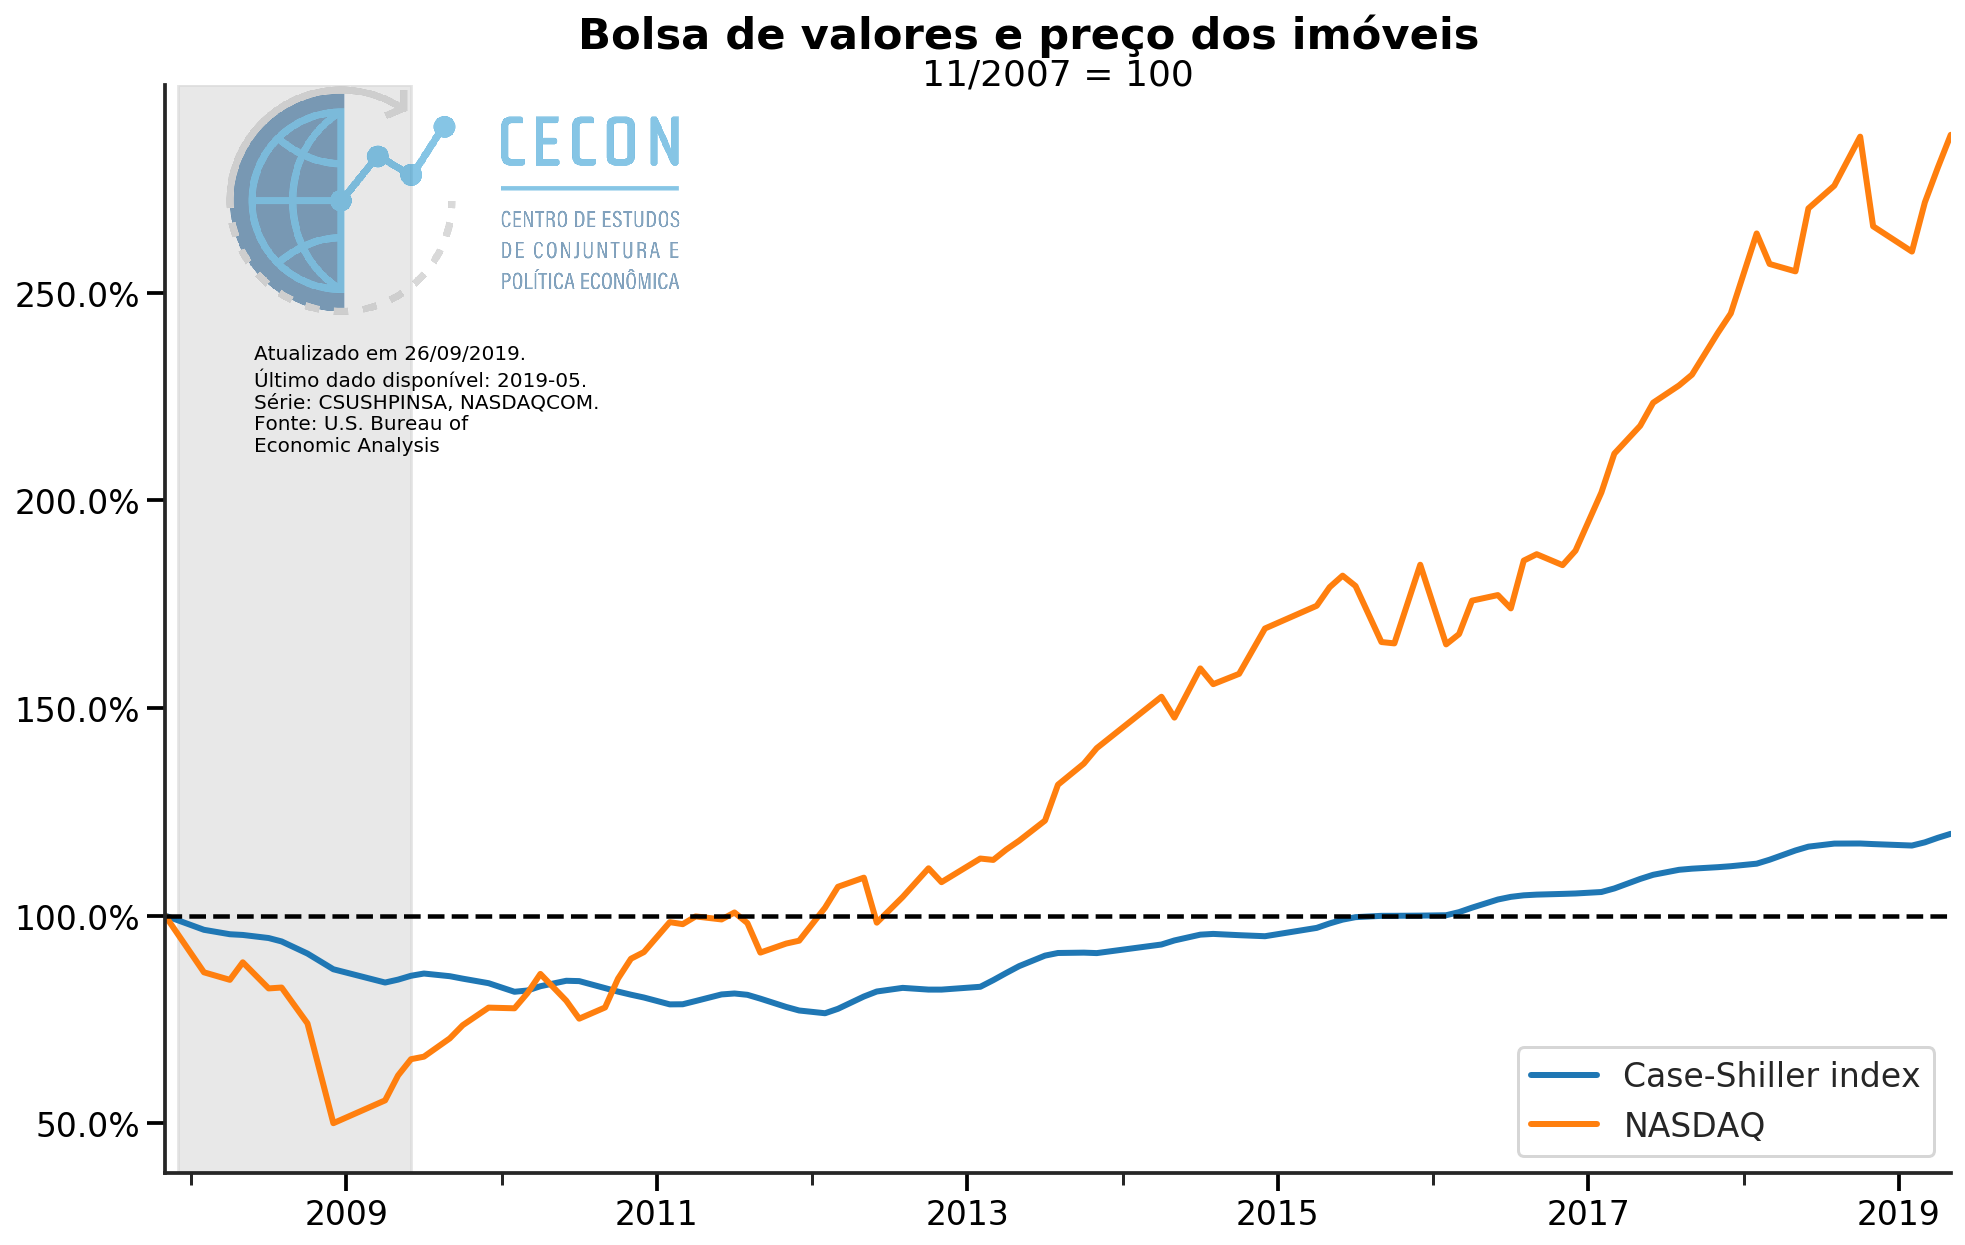

2017-12   2018-02   2018-03   2018-05   2018-06  \
Case-Shiller index  1.119003  1.125100  1.134656  1.156954  1.166122   
NASDAQ              2.450092  2.642687  2.569230  2.551391  2.702967   

                     2018-08   2018-10   2018-11   2019-02   2019-03  \
Case-Shiller index  1.173481  1.173721  1.172299  1.168788  1.176489   
NASDAQ              2.757694  2.875775  2.659932  2.599037  2.717644   

                     2019-04   2019-05  
Case-Shiller index  1.187393  1.197052  
NASDAQ              2.801212  2.880190

In [17]:
df = web.DataReader(
    [
        'CSUSHPINSA',
        'NASDAQCOM'
    ],
    'fred',
    start, end
)
df.columns = [
    "Case-Shiller index",
    'NASDAQ'
]

ano_base = "2007-11-01"

df = df.dropna()
df.index.name = ''
df.index = df.index.to_period('M')
df['Case-Shiller index'] = df['Case-Shiller index']/df['Case-Shiller index'].loc[ano_base]
df['NASDAQ'] = df['NASDAQ']/df['NASDAQ'].loc[ano_base]

sns.set_context('talk')
fim = len(df[ano_base:])
periodo = 1
fig, ax = plt.subplots()


df.tail(fim).plot(
    ax = ax,
    figsize=(16,10),
    lw = 3,
    zorder = 1
)

ax.axvspan(xmin = "2007-12-01", xmax = "2009-06-01", color = 'lightgray', alpha = .5)

plt.suptitle(
    'Bolsa de valores e preço dos imóveis', 
    color='black', 
    weight = 'bold',
    y = .93
)

ax.set_title(
    '11/2007 = 100',
    color = 'black',
    y = .99
)

ax.legend(loc = 'best')

ax.axhline(y=1,color='black',ls='--')

ax.text(0.05, 
        0.66, 
        'Fonte: U.S. Bureau of \nEconomic Analysis',
        verticalalignment='bottom', 
        horizontalalignment='left',
        transform=ax.transAxes,
        color='black', fontsize=10)
ax.text(
    0.05, 
    0.7,
    'Atualizado em {}. \nÚltimo dado disponível: {}. \nSérie: {}.'.format(
        datetime.datetime.now().strftime("%d/%m/%Y"),
        df.index[-1],
        "CSUSHPINSA, NASDAQCOM"
    ),
    verticalalignment='bottom',
    horizontalalignment='left',
    transform=ax.transAxes,
    color='black', 
    fontsize=10
)

ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.yaxis.label.set_color('black')
ax.xaxis.label.set_color('black')
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.1%}'.format(y)))

ax2 = fig.add_axes([0.15,0.7,0.2,0.2])
ax2.imshow(
    logo, 
    aspect='equal',
    zorder=0,
    alpha=.5
)

ax2.axis('off')

sns.despine()
fig.savefig(
    'CaseShillerIndex.png',
    bbox_inches='tight',
    dpi = 300,
    pad_inches=0.05
)
plt.show()
df.tail(12).transpose()

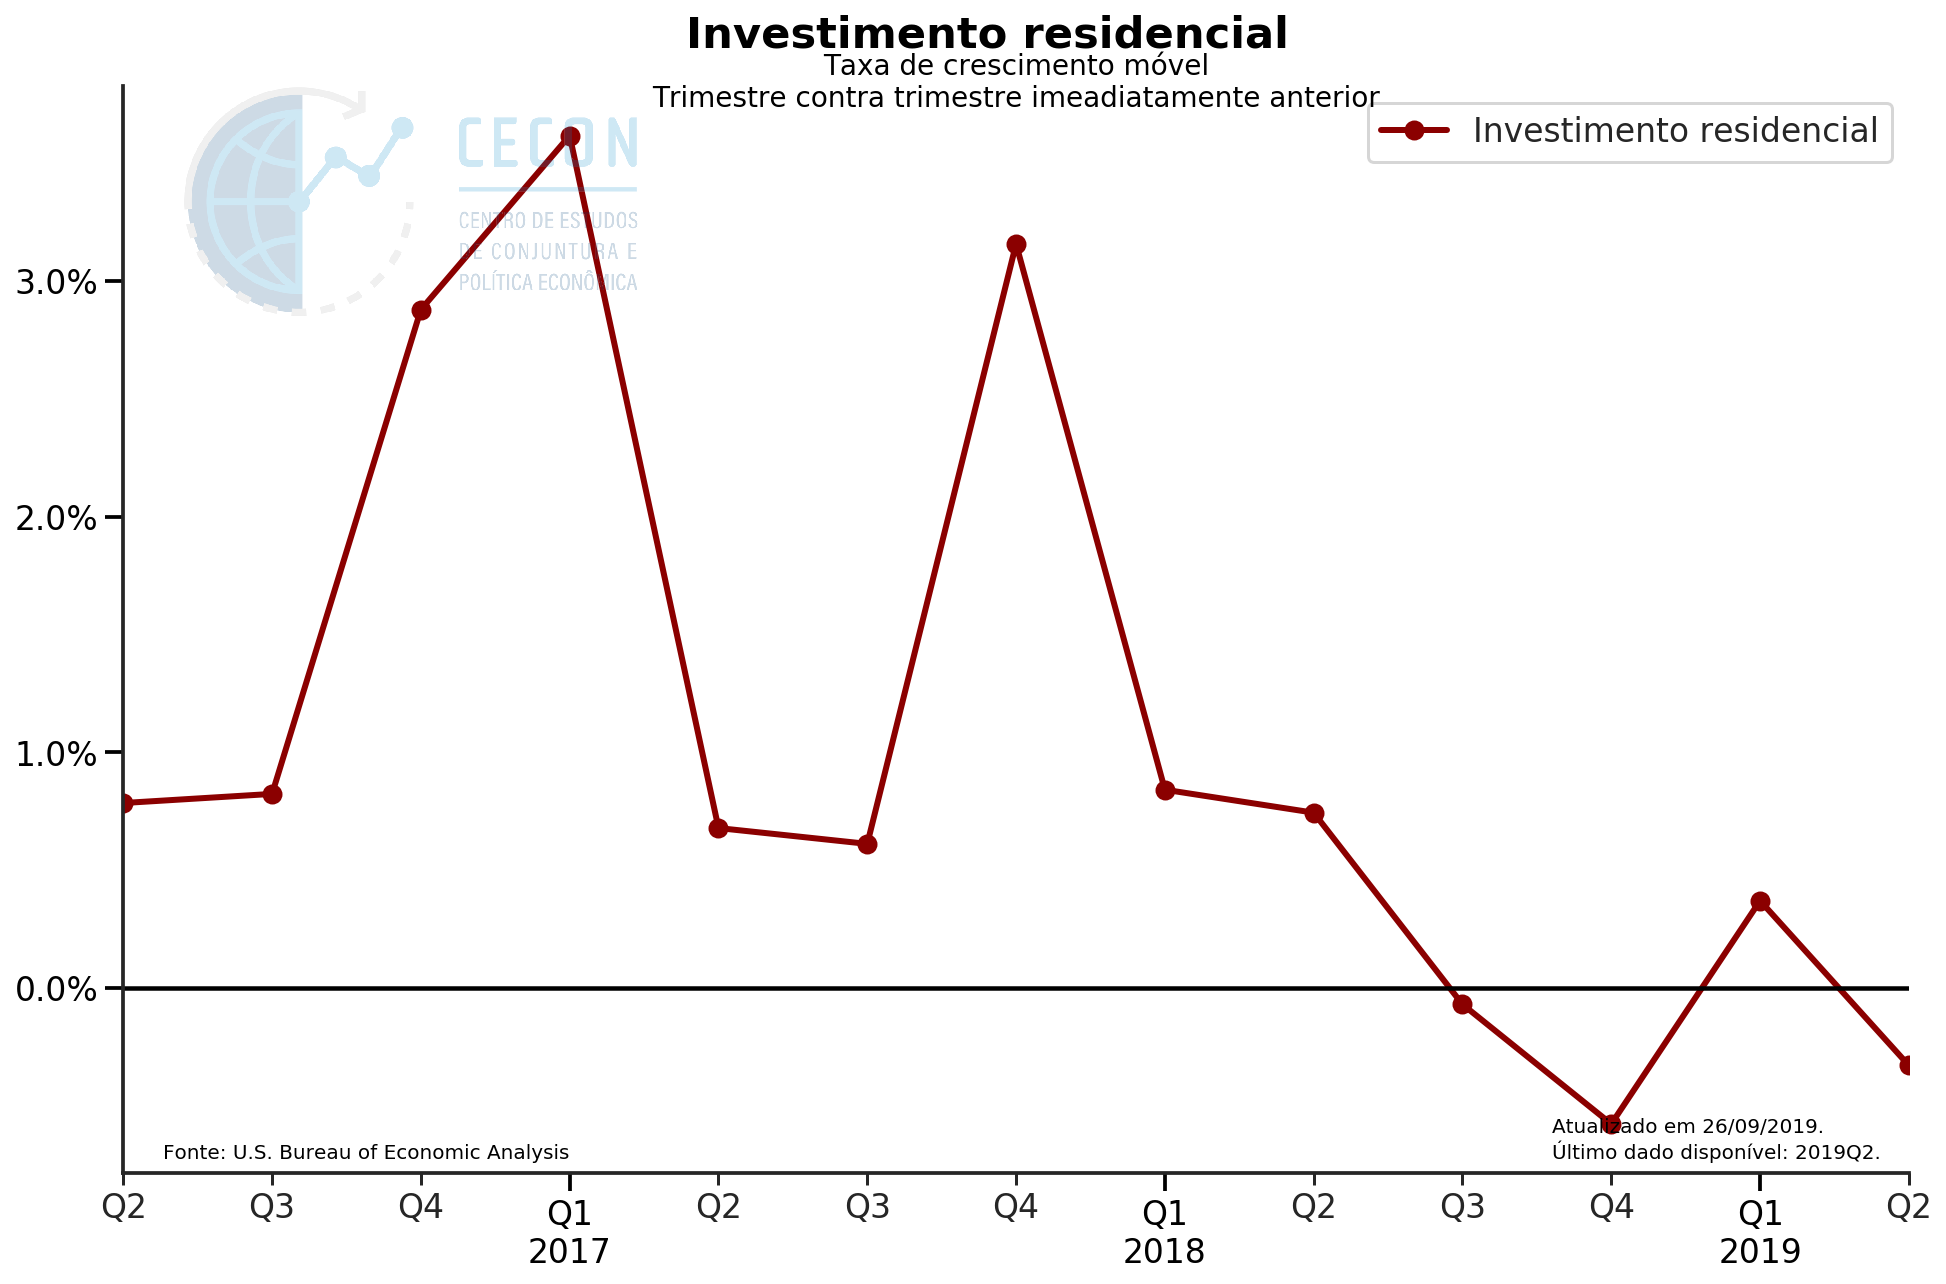

In [18]:
df = web.DataReader(
    [
        'GDPC1',  # GDP
        'PRFI',
        'CSUSHPINSA'
    ],
    'fred',
    start, end
)
df.columns = [
    "PIB",
    "Investimento residencial",
    "Case-Shiller index",
]
df = df.resample('QS').mean()
df = df.dropna()
df.index.name = ''
df['Taxa Residencial'] = df['PIB']/df['Investimento residencial']/100

sns.set_context('talk')
fim = 13
#periodo = len(df["2018"])
periodo = 1
fig, ax = plt.subplots()

df[[
    "Investimento residencial",
]].pct_change(periodo).rolling(periodo, center=False).mean().tail(fim).plot(
    ax=ax,
    lw=3,
    marker='o',
    color='darkred',
    figsize=(16, 10),
    zorder=1
)

ax.axhline(y=0, color='black')
ax.legend(loc='best').set_zorder(0)

plt.suptitle(
    'Investimento residencial',
    color='black',
    weight='bold',
    y=.93
)

ax.set_title(
    'Taxa de crescimento móvel\nTrimestre contra trimestre imeadiatamente anterior',
    color='black', fontsize=14,
    y=.97
)

ax.text(0.25,
        0.01,
        'Fonte: U.S. Bureau of Economic Analysis',
        verticalalignment='bottom',
        horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=10)
ax.text(
    0.8,
    0.01,
    'Atualizado em {}. \nÚltimo dado disponível: {}.'.format(
        datetime.datetime.now().strftime("%d/%m/%Y"),
        df.index[-1].to_period('Q')
    ),
    verticalalignment='bottom',
    horizontalalignment='left',
    transform=ax.transAxes,
    color='black',
    fontsize=10
)

ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.yaxis.label.set_color('black')
ax.xaxis.label.set_color('black')
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.1%}'.format(y)))

ax2 = fig.add_axes([0.15, 0.7, 0.2, 0.2])
ax2.imshow(
    logo,
    aspect='equal',
    zorder=0,
    alpha=.2
)

ax2.axis('off')

sns.despine()
fig.savefig(
    'InvestoResidencial.png',
    bbox_inches='tight',
    dpi=300,
    pad_inches=0.05
)
plt.show()

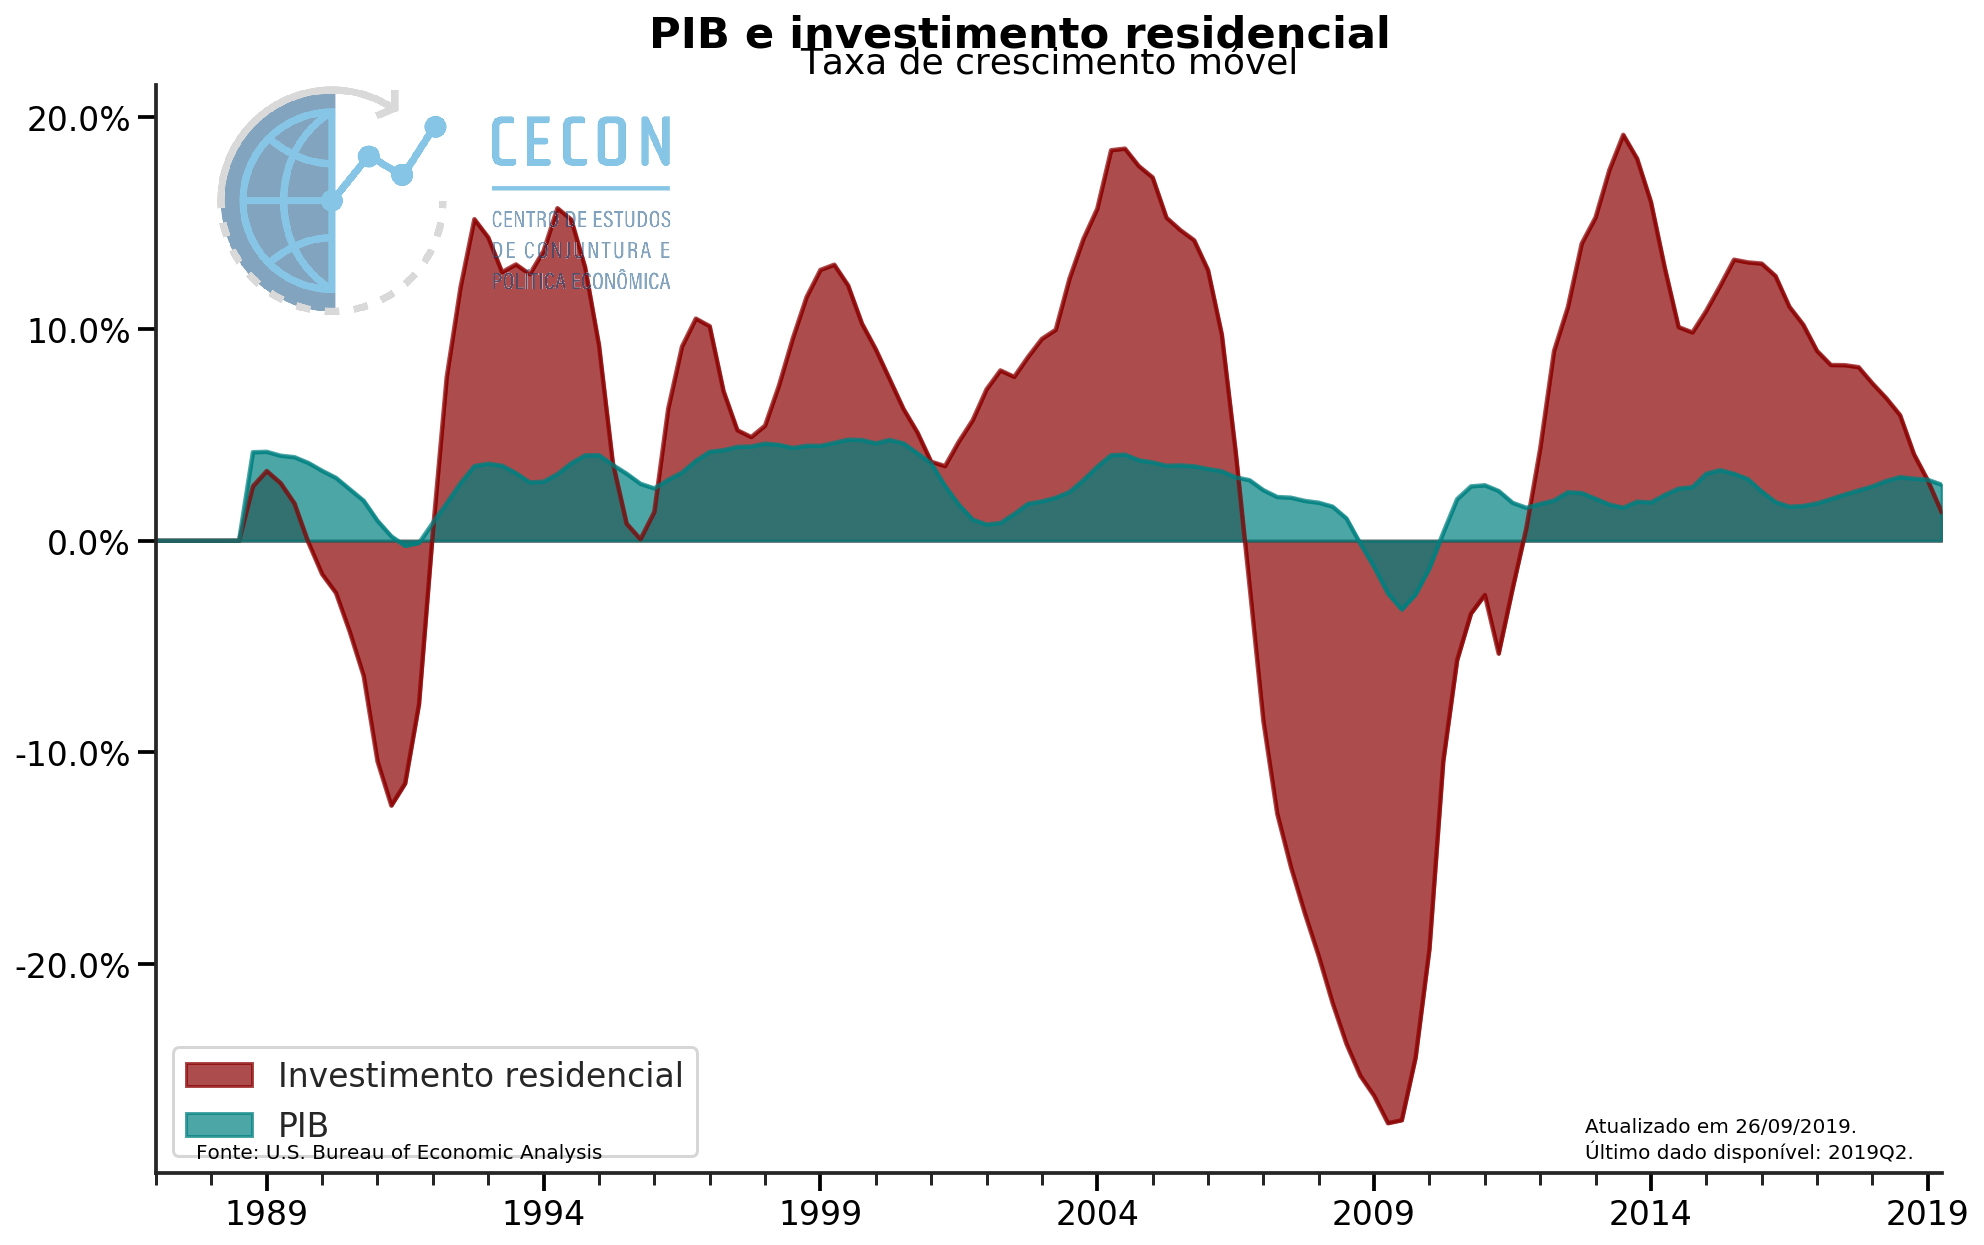

In [19]:
fim = 160
periodo = len(df["2018"])
sns.set_context('talk')
fig, ax = plt.subplots()

df[[
    "Investimento residencial",
    "PIB"
]].rolling(periodo).mean().pct_change(periodo).tail(fim).plot(
    ax = ax,
    kind = 'area', 
    color = ('darkred', 'teal'),
    stacked = False,
    alpha = 0.7,
    figsize=(16,10),
    zorder = 1
)

ax.legend(loc = 'best').set_zorder(0)

plt.suptitle(
    'PIB e investimento residencial', 
    color='black', 
    weight = 'bold',
    y = .93
)

ax.set_title(
    'Taxa de crescimento móvel', 
    color='black', 
    y = 1
)

ax.text(0.25, 
        0.01, 
        'Fonte: U.S. Bureau of Economic Analysis',
        verticalalignment='bottom', 
        horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=10)
ax.text(
    0.8, 
    0.01,
    'Atualizado em {}. \nÚltimo dado disponível: {}.'.format(
        datetime.datetime.now().strftime("%d/%m/%Y"),
        df.index[-1].to_period('Q')
    ),
    verticalalignment='bottom',
    horizontalalignment='left',
    transform=ax.transAxes,
    color='black', 
    fontsize=10
)

ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.yaxis.label.set_color('black')
ax.xaxis.label.set_color('black')
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.1%}'.format(y))) 

ax2 = fig.add_axes([0.15,0.7,0.2,0.2])
ax2.imshow(
    logo, 
    aspect='equal',
    zorder=0,
    alpha=.5
)

ax2.axis('off')

sns.despine()
fig.savefig(
    'PIB_InvestoResidencial.png',
    bbox_inches='tight', 
    dpi = 300,
    pad_inches=0.05
)
plt.show()

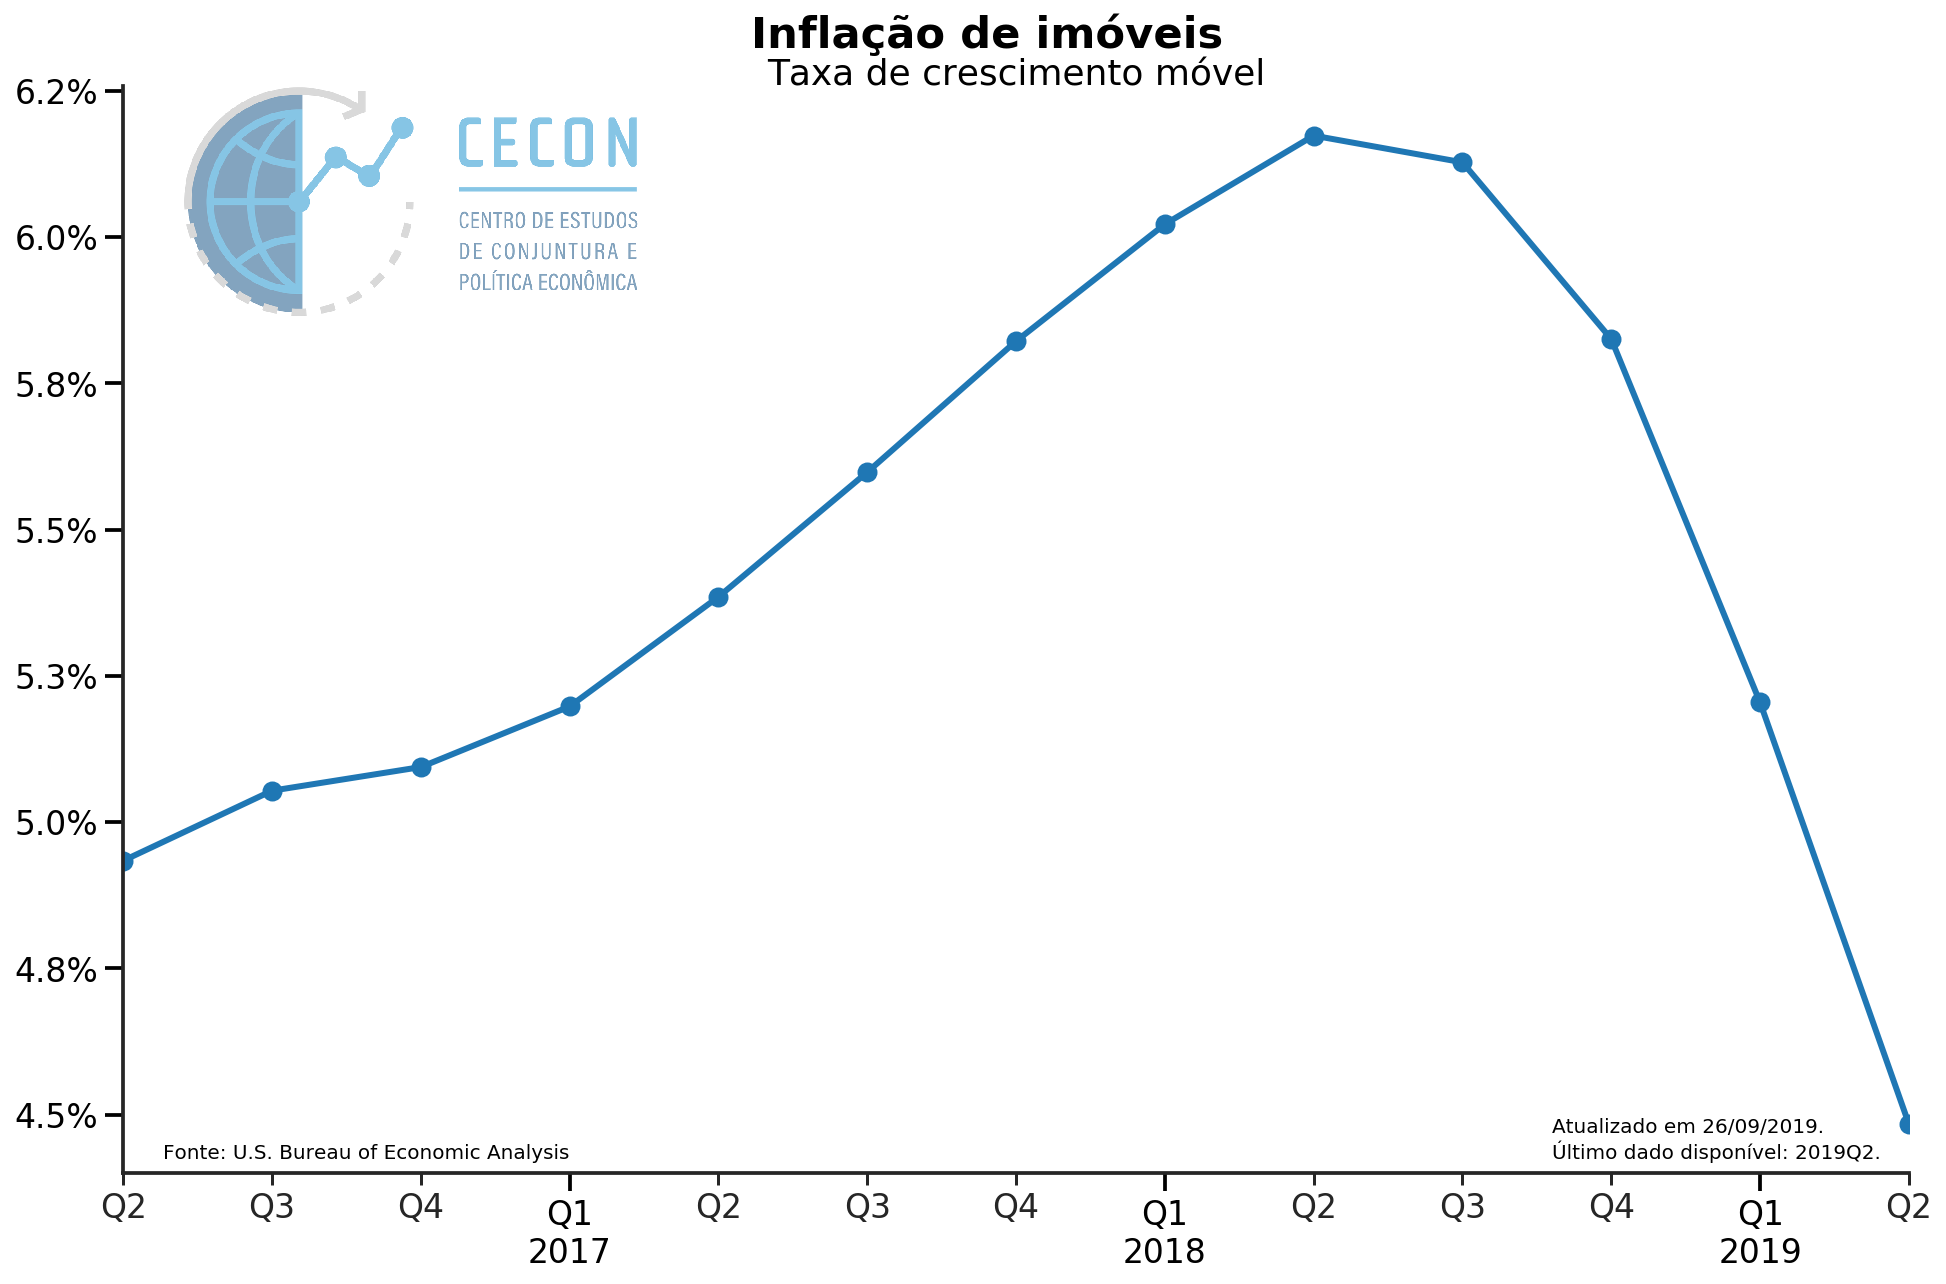

In [20]:
fim = 13
periodo = len(df["2018"])
sns.set_context('talk')
fig, ax = plt.subplots()

df[[
    "Case-Shiller index"
]].rolling(periodo).mean().pct_change(periodo).tail(fim).plot(
    ax = ax,
    lw = 3,
    marker = 'o',
    figsize=(16,10),
    legend = False,
    zorder = 1
)


plt.suptitle(
    'Inflação de imóveis', 
    color='black', 
    weight = 'bold',
    y = .93
)

ax.set_title(
    'Taxa de crescimento móvel', 
    color='black', 
    y = .99
)

ax.text(0.25, 
        0.01, 
        'Fonte: U.S. Bureau of Economic Analysis',
        verticalalignment='bottom', 
        horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=10)
ax.text(
    0.8, 
    0.01,
    'Atualizado em {}. \nÚltimo dado disponível: {}.'.format(
        datetime.datetime.now().strftime("%d/%m/%Y"),
        df.index[-1].to_period('Q')
    ),
    verticalalignment='bottom',
    horizontalalignment='left',
    transform=ax.transAxes,
    color='black', 
    fontsize=10
)

ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.yaxis.label.set_color('black')
ax.xaxis.label.set_color('black')
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.1%}'.format(y))) 

ax2 = fig.add_axes([0.15,0.7,0.2,0.2])
ax2.imshow(
    logo, 
    aspect='equal',
    zorder=0,
    alpha=.5
)

ax2.axis('off')

sns.despine()
fig.savefig(
    'Apresentacao/figs/Infla_Imoveis.png',
    bbox_inches='tight', 
    dpi = 300,
    pad_inches=0.05
)
plt.show()

# Consumo

## Decomposição

In [21]:
df = web.DataReader(
    [
        'PCECC96',  # Real Personal Consumption Expenditures
        'PCDGCC96',  # Real Personal Consumption Expenditures: Durable Goods
        'PCNDGC96',  # Real Personal Consumption Expenditures: Nondurable Goods
        'PCESVC96', # Real Personal Consumption Expenditures: Services
    ],
    'fred',
    start,
    end)
df.columns = [
    "Total",
    "Duráveis",
    "Não Duráveis",
    "Serviços"
]
df.index.name = ''
(df.pct_change(4).round(3)*100).tail()

Total  Duráveis  Não Duráveis  Serviços
                                                   
2018-04-01    3.2       7.5           3.0       2.6
2018-07-01    3.4       6.4           3.4       3.0
2018-10-01    2.6       3.8           2.5       2.5
2019-01-01    2.5       3.2           2.9       2.3
2019-04-01    2.7       4.4           3.5       2.2

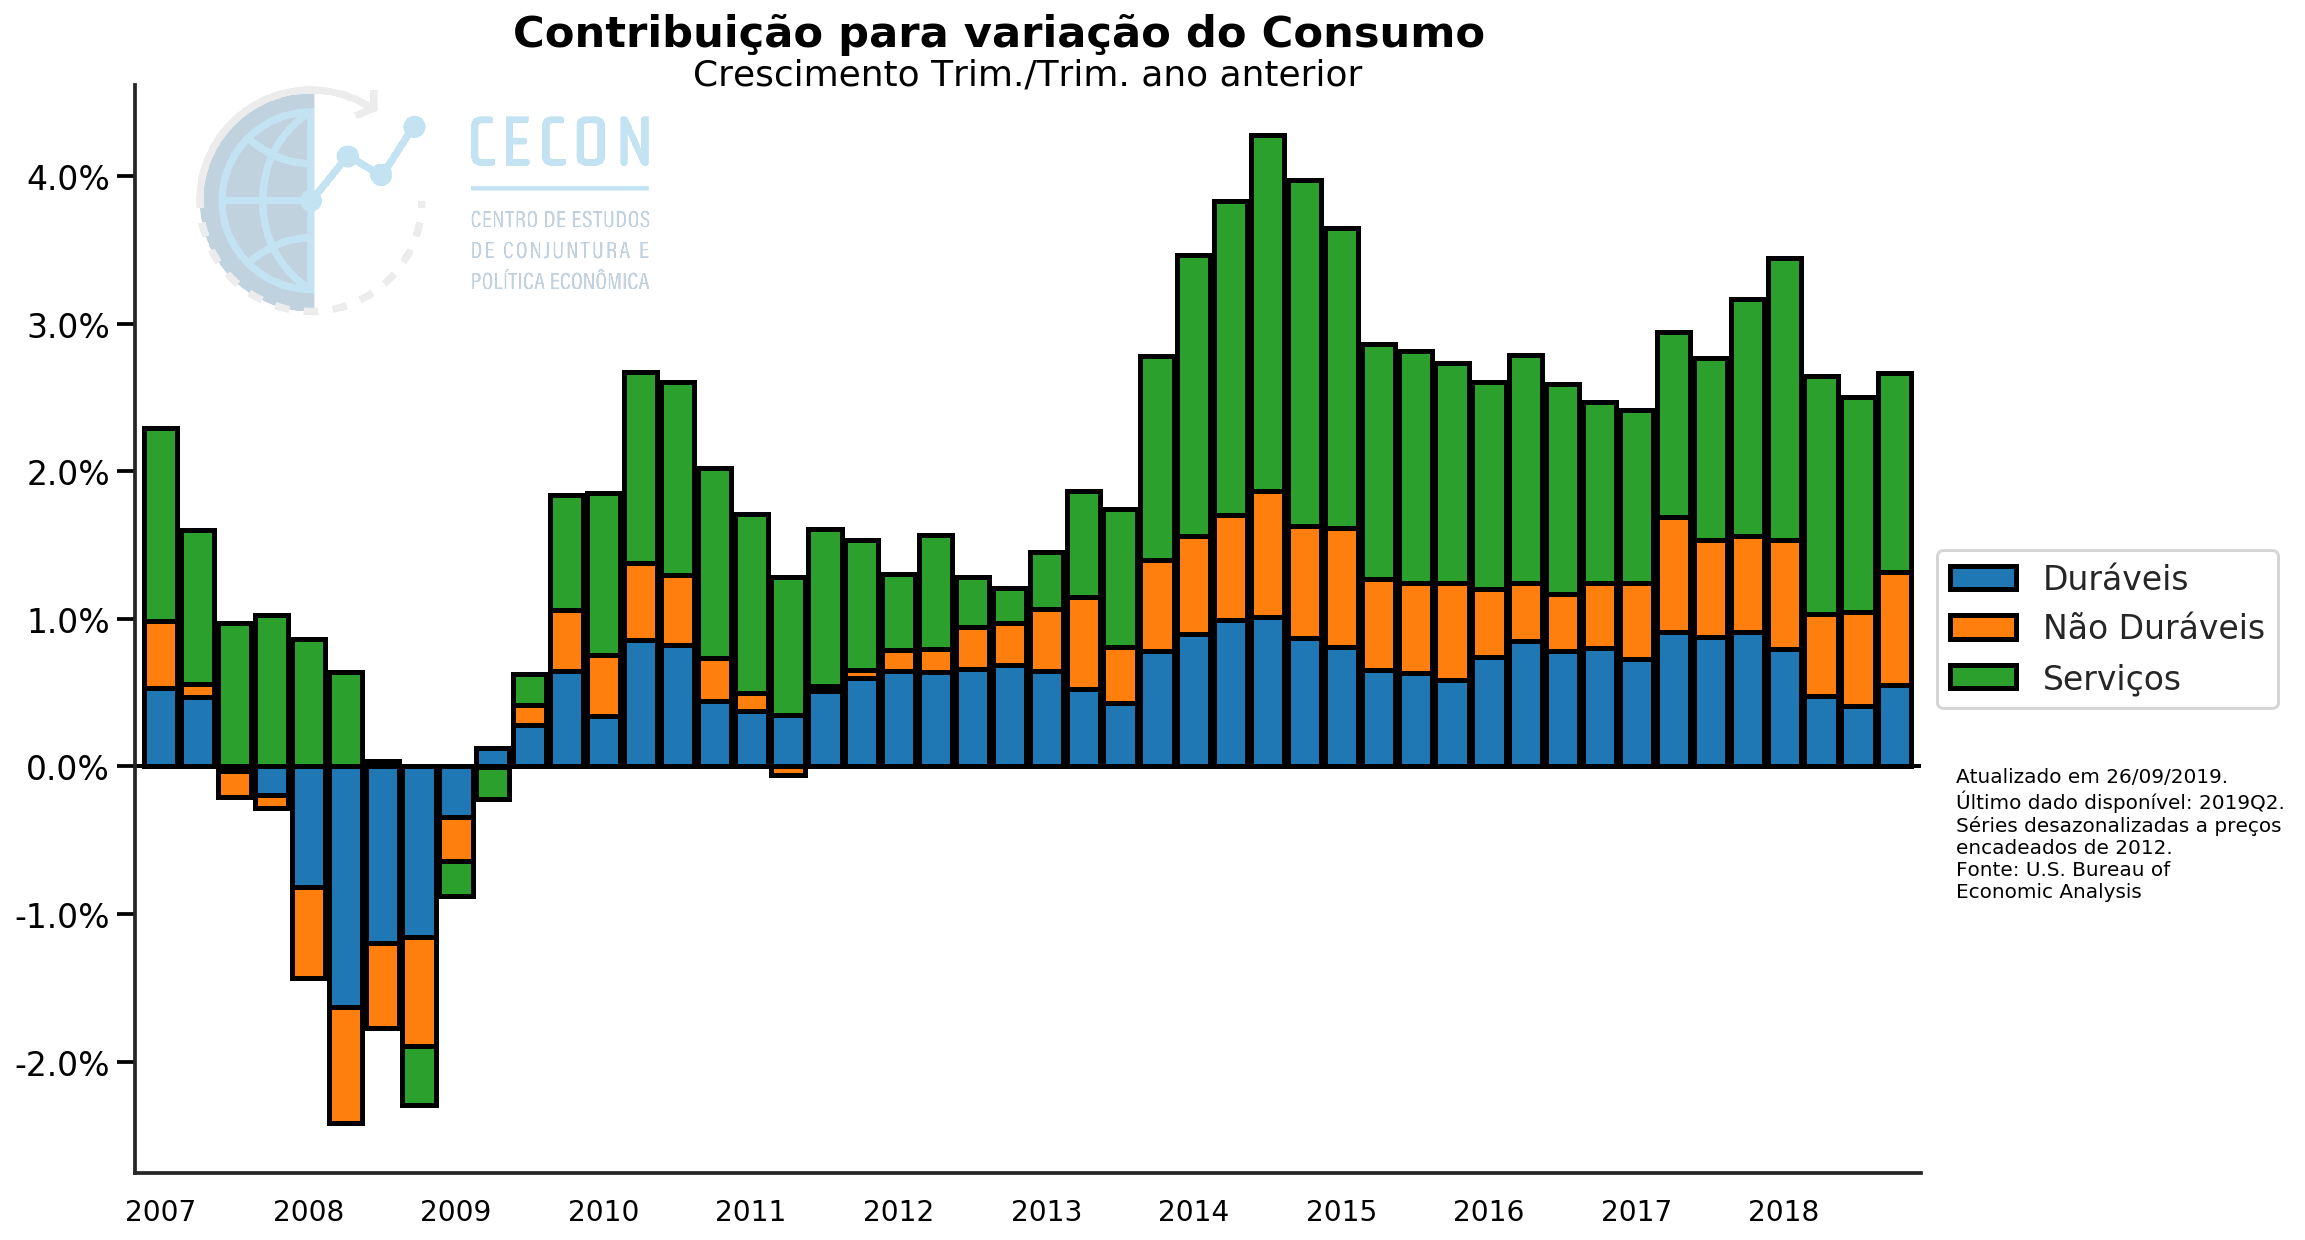

In [22]:
sns.set_context('talk')
fim = len(df.loc["2007-06-01":,"Total"])
periodo = len(df.loc["2018-01-01":"2018-12-01","Total"])
fig, ax = plt.subplots(figsize=(16, 10))

contribuicao = (df.drop("Total", axis='columns').diff(
    periodo).apply(lambda x: x / (df["Total"].shift(periodo))).tail(fim))
soma = df.drop("Total", axis='columns').diff(periodo).apply(lambda x: x / (df[
    "Total"].shift(periodo))).tail(fim).sum(axis=1)

contribuicao.apply(lambda x: (x / soma) * df["Total"].pct_change(periodo).tail(
    fim)).plot(
        kind='bar',
        stacked=True,
        ax=ax,
        width=0.9,
        # cmap="RdYlGn",
        edgecolor='black',
        linewidth=2.5,
        figsize=(16, 10),
        zorder=1)

ax.axhline(y=0, color='black', linestyle='-', lw=2)

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.suptitle(
    'Contribuição para variação do Consumo',
    color='black',
    weight='bold',
    y=.93)

ax.set_title('Crescimento Trim./Trim. ano anterior', color='black', y=.99)

ax.text(1.02,
        0.25,
        'Fonte: U.S. Bureau of \nEconomic Analysis',
        verticalalignment='bottom',
        horizontalalignment='left',
        transform=ax.transAxes,
        color='black',
        fontsize=10)
ax.text(1.02,
        0.29,
        'Atualizado em {}. \nÚltimo dado disponível: {}. \nSéries {}.'.format(
            datetime.datetime.now().strftime("%d/%m/%Y"),
            df.index[-1].to_period('Q'),
            "desazonalizadas a preços \nencadeados de 2012"),
        verticalalignment='bottom',
        horizontalalignment='left',
        transform=ax.transAxes,
        color='black',
        fontsize=10)

ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.yaxis.label.set_color('black')
ax.xaxis.label.set_color('black')
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.1%}'.format(y)))

labels = [i.strftime("%Y") for i in df.tail(fim).index]
dates = ["" for i in df.tail(fim).index]

for i in range(len(dates)):

    if i % 4 == 0:
        dates[i] = labels[i]

ax.tick_params(axis='x', which='minor', width=1)

ax.xaxis.set_ticklabels(dates,
                        fontsize=14,
                        minor=False,
                        rotation=0,
                        color='black')
ax.xaxis.set_ticks_position('none')

ax2 = fig.add_axes([0.15, 0.7, 0.2, 0.2], zorder=0)
ax2.imshow(logo, aspect='equal', zorder=0, alpha=.25)

ax2.axis('off')

sns.despine()
fig.savefig(
    'Apresentacao/figs/Contrib_Consumo_Longa.png',
    bbox_inches='tight',
    dpi=300,
    pad_inches=0.05
)
plt.show()

## Gastos

In [23]:
df = web.DataReader(
    [
        'PCE', # Personal Consumption Expenditures
    ],
    'fred',
    start, end
)
df.columns = [
    "Consumo"
]
df.index.name = ''
df.tail()

Consumo
                   
2019-02-01  14216.6
2019-03-01  14354.6
2019-04-01  14448.2
2019-05-01  14517.7
2019-06-01  14568.0

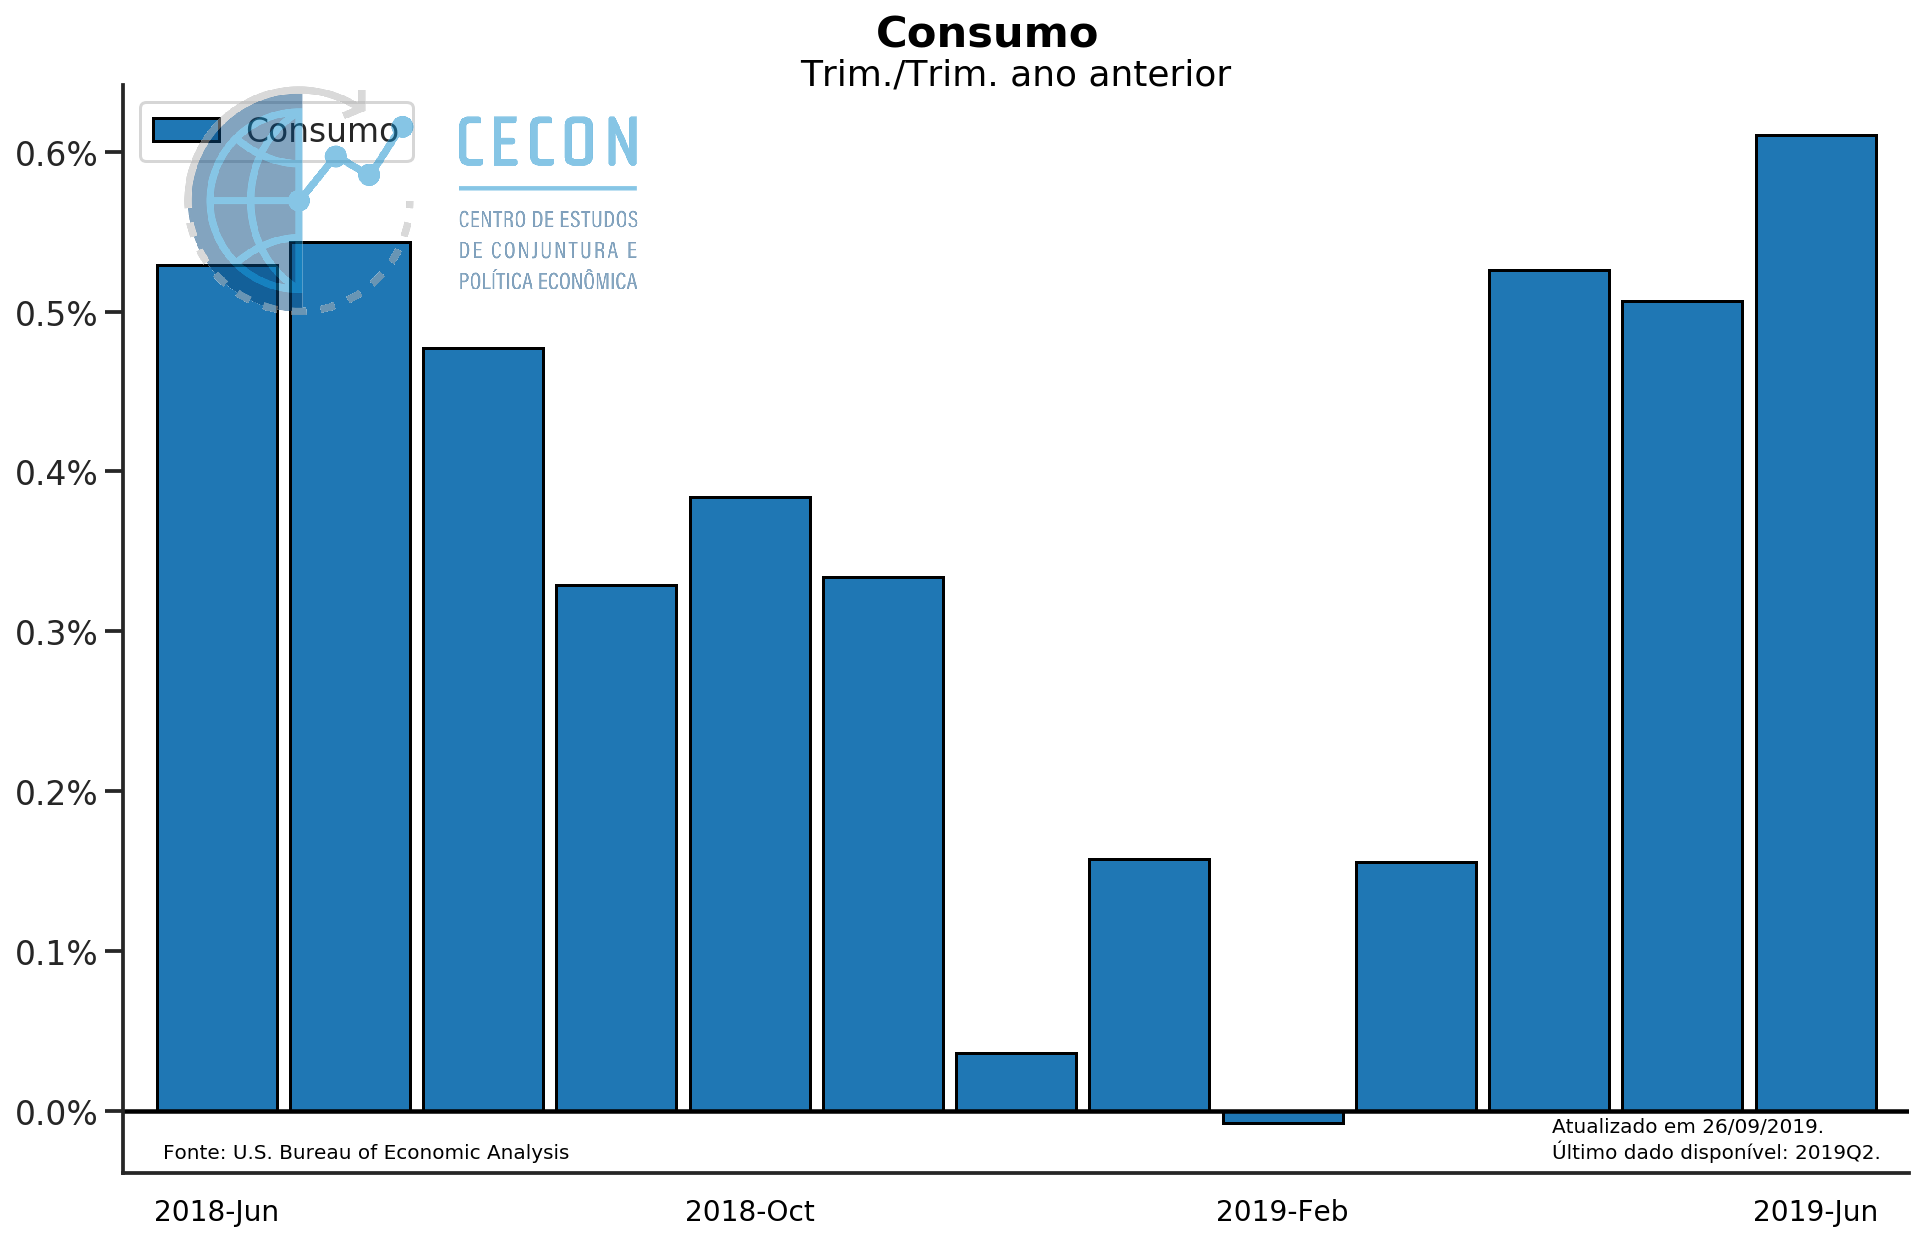

In [24]:
fim = 13
periodo = 4
sns.set_context('talk')
fig, ax = plt.subplots()

df.rolling(periodo).mean().pct_change().tail(fim).plot(
    kind = 'bar', 
    ax = ax,
    width = 0.9,
    edgecolor='black',
    figsize=(16,10),
    zorder = 1,
    legend = False
)

ax.legend(loc = 'best').set_zorder(0)

plt.suptitle(
    'Consumo', 
    color='black', 
    weight = 'bold',
    y = .93
)

ax.set_title(
    'Trim./Trim. ano anterior', 
    color='black', 
    y = .99
)

ax.text(0.25, 
        0.01, 
        'Fonte: U.S. Bureau of Economic Analysis',
        verticalalignment='bottom', 
        horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=10)
ax.text(
    0.8, 
    0.01,
    'Atualizado em {}. \nÚltimo dado disponível: {}.'.format(
        datetime.datetime.now().strftime("%d/%m/%Y"),
        df.index[-1].to_period('Q')
    ),
    verticalalignment='bottom',
    horizontalalignment='left',
    transform=ax.transAxes,
    color='black', 
    fontsize=10
)

labels = [i.strftime("%Y-%b") for i in df.tail(fim).index]
dates = ["" for i in df.tail(fim).index]

for i in range(len(dates)):
  
  if i%4 == 0:
    dates[i] = labels[i]

ax.tick_params(axis='x', which='minor', width = 1)
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.1%}'.format(y))) 
ax.axhline(y=0,color = 'black')

ax.xaxis.set_ticklabels(
    dates, 
    fontsize = 14,
    minor = False,
    rotation = 0,
    color = 'black'
)
ax.xaxis.set_ticks_position('none') 


ax2 = fig.add_axes([0.15,0.7,0.2,0.2])
ax2.imshow(
    logo, 
    aspect='equal',
    zorder=0,
    alpha=.5
)

ax2.axis('off')

sns.despine()
fig.savefig(
    'Apresentacao/figs/Consumo_Gastos.png',
    bbox_inches='tight', 
    dpi = 300,
    pad_inches=0.05
)
plt.show()

## Bens de consumo duráveis

Queda do consumo de bens duráveis maior que a esperada pelo mercado:

- Destaque para equipamentos de transportes
  - Excluindo transportes, os bens duráveis se mostraram basicamente inalterados
- Aumento nos estoques
- Queda em encomendas de bens de capital não militares

In [25]:
df = web.DataReader(
    [
        'PCDG' # Personal Consumption Expenditures: Durable Goods - Billions of Dollars, Seasonally Adjusted Annual Rate
    ],
    'fred',
    start, end
)
df.columns = [
    "Bens de consumo duráveis",
]
df.index.name = ''
df.tail()

Bens de consumo duráveis
                                    
2018-04-01                  1476.670
2018-07-01                  1485.233
2018-10-01                  1485.629
2019-01-01                  1485.350
2019-04-01                  1524.389

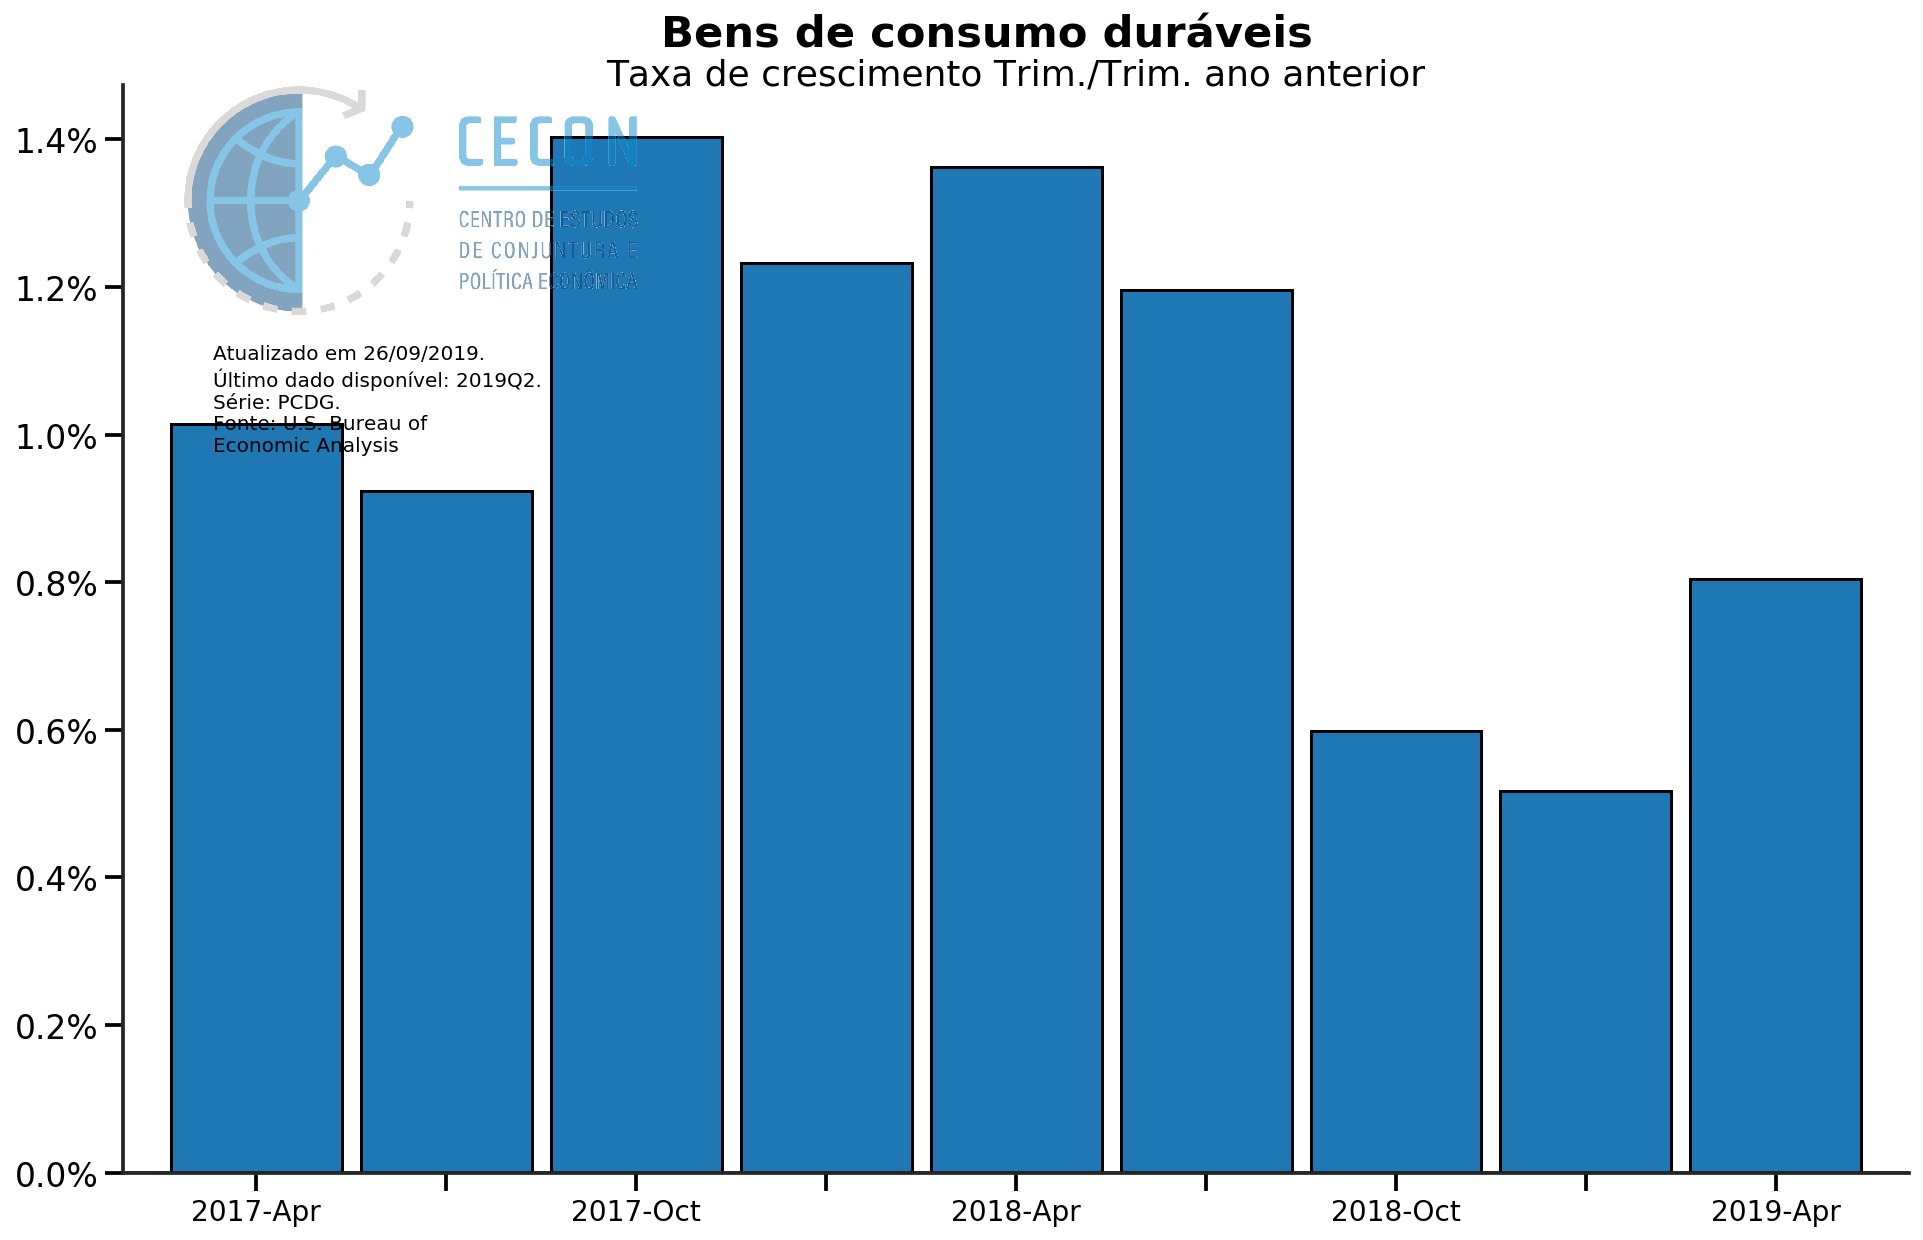

In [26]:
sns.set_context('talk')
fim = 9
periodo = 4
fig, ax = plt.subplots()


df.rolling(periodo).mean().pct_change().tail(fim).plot(
    kind = 'bar', 
    ax = ax,
    width = 0.9,
    edgecolor='black',
    figsize=(16,10),
    zorder = 1,
    legend = False
)


plt.suptitle(
    'Bens de consumo duráveis', 
    color='black', 
    weight = 'bold',
    y = .93
)

ax.set_title(
    'Taxa de crescimento Trim./Trim. ano anterior', 
    color='black', 
    y = 0.99
)

ax.text(0.05, 
        0.66, 
        'Fonte: U.S. Bureau of \nEconomic Analysis',
        verticalalignment='bottom', 
        horizontalalignment='left',
        transform=ax.transAxes,
        color='black', fontsize=10)
ax.text(
    0.05, 
    0.7,
    'Atualizado em {}. \nÚltimo dado disponível: {}. \nSérie: {}.'.format(
        datetime.datetime.now().strftime("%d/%m/%Y"),
        df.index[-1].to_period('Q'),
        "PCDG"
    ),
    verticalalignment='bottom',
    horizontalalignment='left',
    transform=ax.transAxes,
    color='black', 
    fontsize=10
)

ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.yaxis.label.set_color('black')
ax.xaxis.label.set_color('black')

labels = [i.strftime("%Y-%b") for i in df.tail(fim).index]
dates = ["" for i in df.tail(fim).index]

for i in range(len(dates)):
  
  if i%2 == 0:
    dates[i] = labels[i]
    
ax.tick_params(axis='x', which='minor', width = 1)
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.1%}'.format(y))) 
ax.axhline(y=0,color = 'black')

ax.xaxis.set_ticklabels(
    dates, 
    fontsize = 14,
    minor = False,
    rotation = 0,
    color = 'black'
)

ax2 = fig.add_axes([0.15,0.7,0.2,0.2])
ax2.imshow(
    logo, 
    aspect='equal',
    zorder=0,
    alpha=.5
)

ax2.axis('off')

sns.despine()
fig.savefig(
    'Apresentacao/figs/Consumo_Duraveis.png',
    bbox_inches='tight', 
    dpi = 300,
    pad_inches=0.05
)
plt.show()

## Confiança do consumidor

Queda sensivelmente inferior em relação à expectativa de mercado.

In [27]:
df = web.DataReader(
    [
        'UMCSENT' # University of Michigan: Consumer Sentiment
    ],
    'fred',
    start, end
)
df.columns = [
    "Confiança do consumidor",
]
df.index.name = ''
df.tail()

Confiança do consumidor
                                   
2019-02-01                     93.8
2019-03-01                     98.4
2019-04-01                     97.2
2019-05-01                    100.0
2019-06-01                     98.2

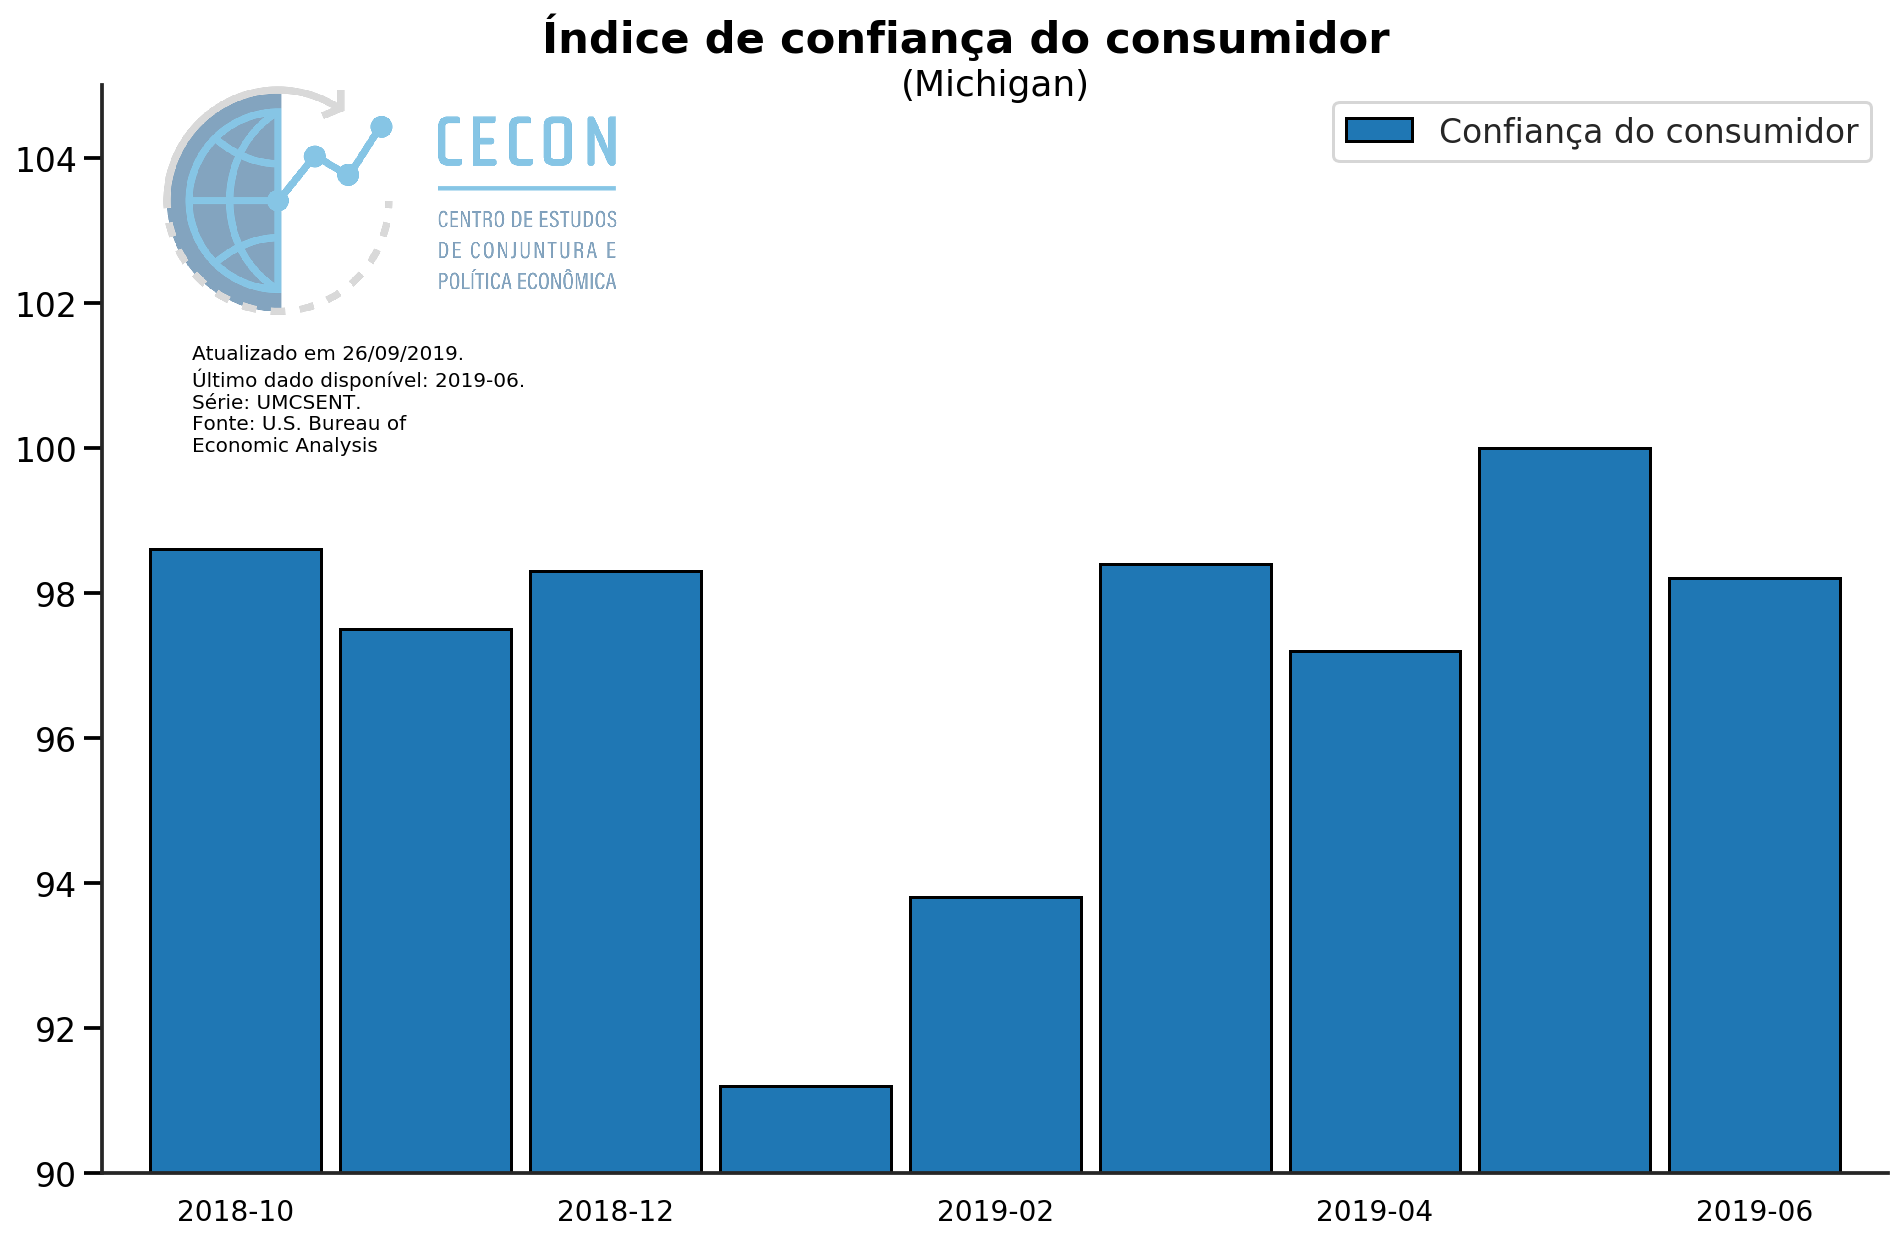

In [28]:
sns.set_context('talk')
fim = 9
periodo = 1
fig, ax = plt.subplots()


df.tail(fim).plot(
    kind = 'bar', 
    ax = ax,
    width = 0.9,
    edgecolor='black',
    figsize=(16,10),
    zorder = 1
)


plt.suptitle(
    'Índice de confiança do consumidor', 
    color='black', 
    weight = 'bold',
    y = .93
)

ax.set_title(
    '(Michigan)', 
    color='black', 
    y = 0.98
)

ax.text(0.05, 
        0.66, 
        'Fonte: U.S. Bureau of \nEconomic Analysis',
        verticalalignment='bottom', 
        horizontalalignment='left',
        transform=ax.transAxes,
        color='black', fontsize=10)
ax.text(
    0.05, 
    0.7,
    'Atualizado em {}. \nÚltimo dado disponível: {}. \nSérie: {}.'.format(
        datetime.datetime.now().strftime("%d/%m/%Y"),
        df.index[-1].to_period('M'),
        "UMCSENT"
    ),
    verticalalignment='bottom',
    horizontalalignment='left',
    transform=ax.transAxes,
    color='black', 
    fontsize=10
)

ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.yaxis.label.set_color('black')
ax.xaxis.label.set_color('black')

labels = [i.strftime("%Y-%m") for i in df.tail(fim).index]
dates = ["" for i in df.tail(fim).index]

for i in range(len(dates)):
  
  if i%2 == 0:
    dates[i] = labels[i]
    
ax.tick_params(axis='x', which='minor', width = 1)
ax.set_ylim(90,105)

ax.xaxis.set_ticklabels(
    dates, 
    fontsize = 14,
    minor = False,
    rotation = 0,
    color = 'black'
)
ax.xaxis.set_ticks_position('none') 

ax2 = fig.add_axes([0.15,0.7,0.2,0.2])
ax2.imshow(
    logo, 
    aspect='equal',
    zorder=0,
    alpha=.5
)

ax2.axis('off')

sns.despine()
fig.savefig(
    'Confianca_Consumidor.png',
    bbox_inches='tight', 
    dpi = 300,
    pad_inches=0.05
)
plt.show()

# Gastos do governo

## Contribuição para a arrecadação

In [29]:
df = web.DataReader(
    [
        'W006RC1Q027SBEA',  # Federal government current tax receipts
        'A074RC1Q027SBEA',  # Federal government current tax receipts: Personal current taxes
        #'W007RC1Q027SBEA',  # Federal government current tax receipts: Taxes on production and imports
        'B075RC1Q027SBEA', # Federal government current tax receipts: Taxes on corporate income
        'B234RC1Q027SBEA', # Federal government current tax receipts: Taxes on production and imports: Excise taxes
        'B235RC1Q027SBEA', # Federal government current tax receipts: Taxes on production and imports: Customs duties
    ],
    'fred',
    start,
    end)
df.columns = [
    "Total",
    "Renda",
    #"Produção e importação",
    "Firmas",
    "Consumo",
    "Tarifa alfandegária",
]
df.index.name = ''
(df.pct_change(4).round(3)*100).tail()

Total  Renda  Firmas  Consumo  Tarifa alfandegária
                                                              
2018-04-01   -3.0    0.7   -39.9     20.1                 19.5
2018-07-01   -3.5    0.4   -41.1     17.7                 37.3
2018-10-01   -2.7   -0.8   -38.8     16.7                 82.7
2019-01-01    5.1    5.1    -1.8    -15.8                 78.7
2019-04-01    4.8    5.3    -1.2    -16.4                 57.6

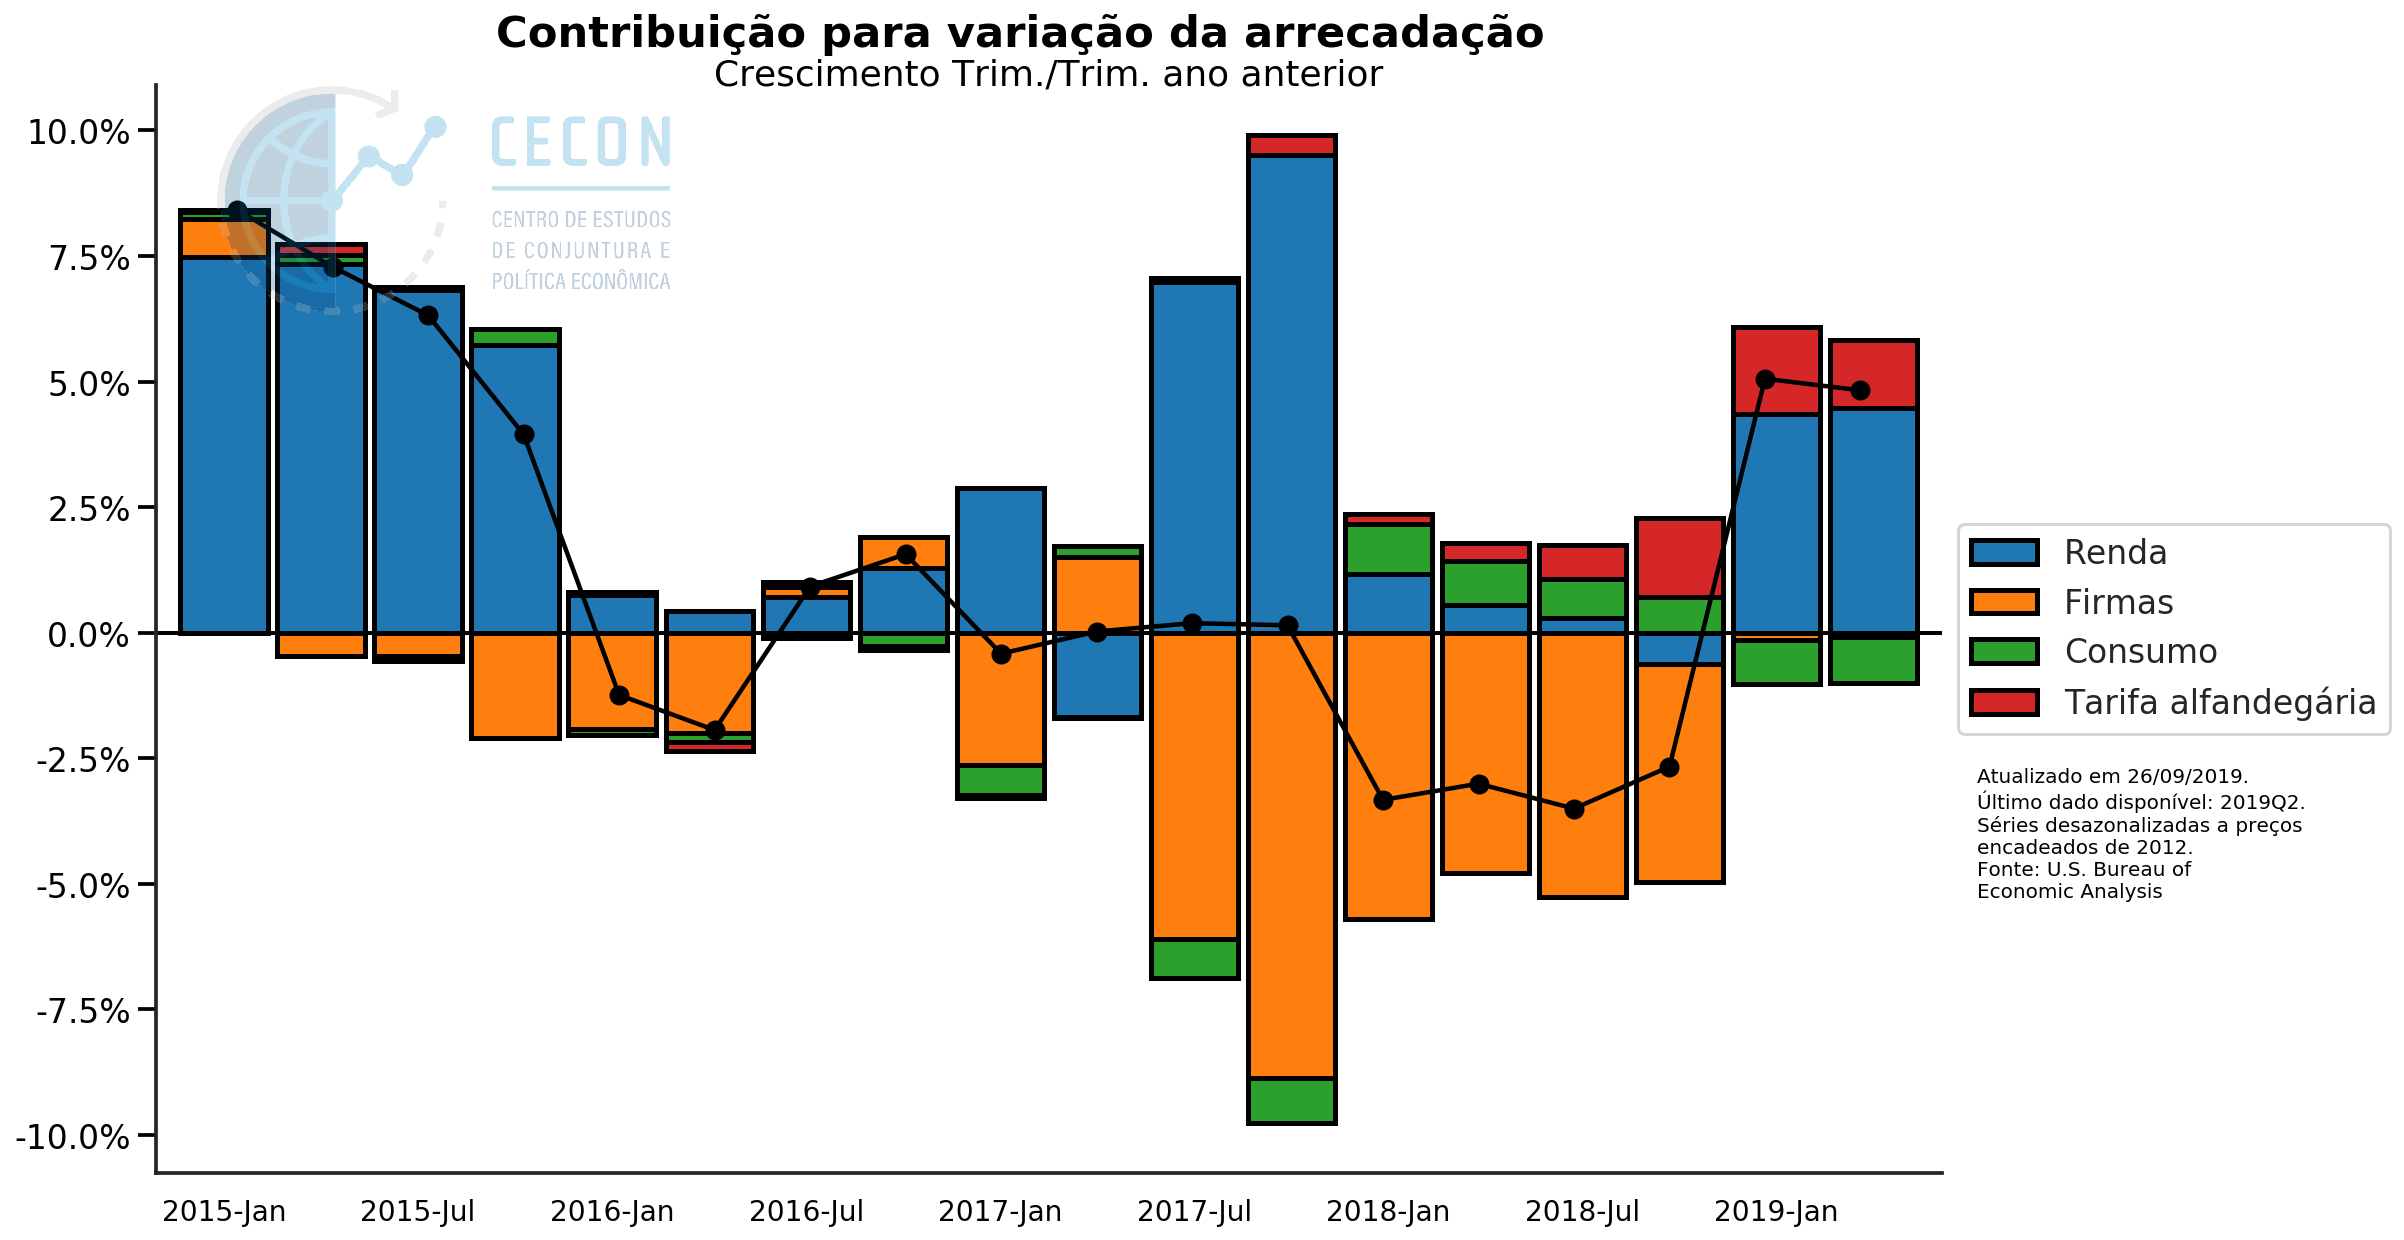

In [30]:
sns.set_context('talk')
fim = len(df.loc["2015-01-01":,"Total"])
periodo = len(df.loc["2018-01-01":"2018-12-01","Total"])
fig, ax = plt.subplots(figsize=(16, 10))

contribuicao = (df.drop("Total", axis='columns').diff(
    periodo).apply(lambda x: x / (df["Total"].shift(periodo))).tail(fim))
soma = df.drop("Total", axis='columns').diff(periodo).apply(lambda x: x / (df[
    "Total"].shift(periodo))).tail(fim).sum(axis=1)

contribuicao.apply(lambda x: (x / soma) * df["Total"].pct_change(periodo).tail(
    fim)).plot(
        kind='bar',
        stacked=True,
        ax=ax,
        width=0.9,
        # cmap="RdYlGn",
        edgecolor='black',
        linewidth=2.5,
        figsize=(16, 10),
        zorder=1)

ax.axhline(y=0, color='black', linestyle='-', lw=2)

axl = ax.twiny()
axl.plot(ax.get_xticks(),
         df["Total"].pct_change(periodo).tail(fim),
         marker='o',
         ls='-',
         color='black',
         label="Total")

axl.axis('off')


# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.suptitle(
    'Contribuição para variação da arrecadação',
    color='black',
    weight='bold',
    y=.93)

ax.set_title('Crescimento Trim./Trim. ano anterior', color='black', y=.99)

ax.text(1.02,
        0.25,
        'Fonte: U.S. Bureau of \nEconomic Analysis',
        verticalalignment='bottom',
        horizontalalignment='left',
        transform=ax.transAxes,
        color='black',
        fontsize=10)
ax.text(1.02,
        0.29,
        'Atualizado em {}. \nÚltimo dado disponível: {}. \nSéries {}.'.format(
            datetime.datetime.now().strftime("%d/%m/%Y"),
            df.index[-1].to_period('Q'),
            "desazonalizadas a preços \nencadeados de 2012"),
        verticalalignment='bottom',
        horizontalalignment='left',
        transform=ax.transAxes,
        color='black',
        fontsize=10)

ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.yaxis.label.set_color('black')
ax.xaxis.label.set_color('black')
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.1%}'.format(y)))

labels = [i.strftime("%Y-%b") for i in df.tail(fim).index]
dates = ["" for i in df.tail(fim).index]

for i in range(len(dates)):

    if i % 2 == 0:
        dates[i] = labels[i]

ax.tick_params(axis='x', which='minor', width=1)

ax.xaxis.set_ticklabels(dates,
                        fontsize=14,
                        minor=False,
                        rotation=0,
                        color='black')
ax.xaxis.set_ticks_position('none')

ax2 = fig.add_axes([0.15, 0.7, 0.2, 0.2], zorder=0)
ax2.imshow(logo, aspect='equal', zorder=0, alpha=.25)

ax2.axis('off')

sns.despine()
fig.savefig(
    'Apresentacao/figs/Contrib_Arrecadacao.png',
    bbox_inches='tight',
    dpi=300,
    pad_inches=0.05
)
plt.show()

# Guerra comercial

## Conta corrente

In [31]:
df = web.DataReader(
    [
        'GDPC1', # Real GDP
        'NETFI', # Balance on Current Account, NIPA's Billions of Dollars, Seasonally Adjusted Annual Rate
    ],
    'fred',
    start, end
)
df.columns = [
    "PIB real",
    "Saldo Conta Corrente",
]
df['Déficit corrente/PIB'] = -df['Saldo Conta Corrente']/df['PIB real']
df.index.name = ''
df.tail()

PIB real  Saldo Conta Corrente  Déficit corrente/PIB
                                                                 
2018-04-01  18598.135              -444.337              0.023891
2018-07-01  18732.720              -530.083              0.028297
2018-10-01  18783.548              -585.547              0.031173
2019-01-01  18927.281              -546.583              0.028878
2019-04-01  19023.022              -498.369              0.026198

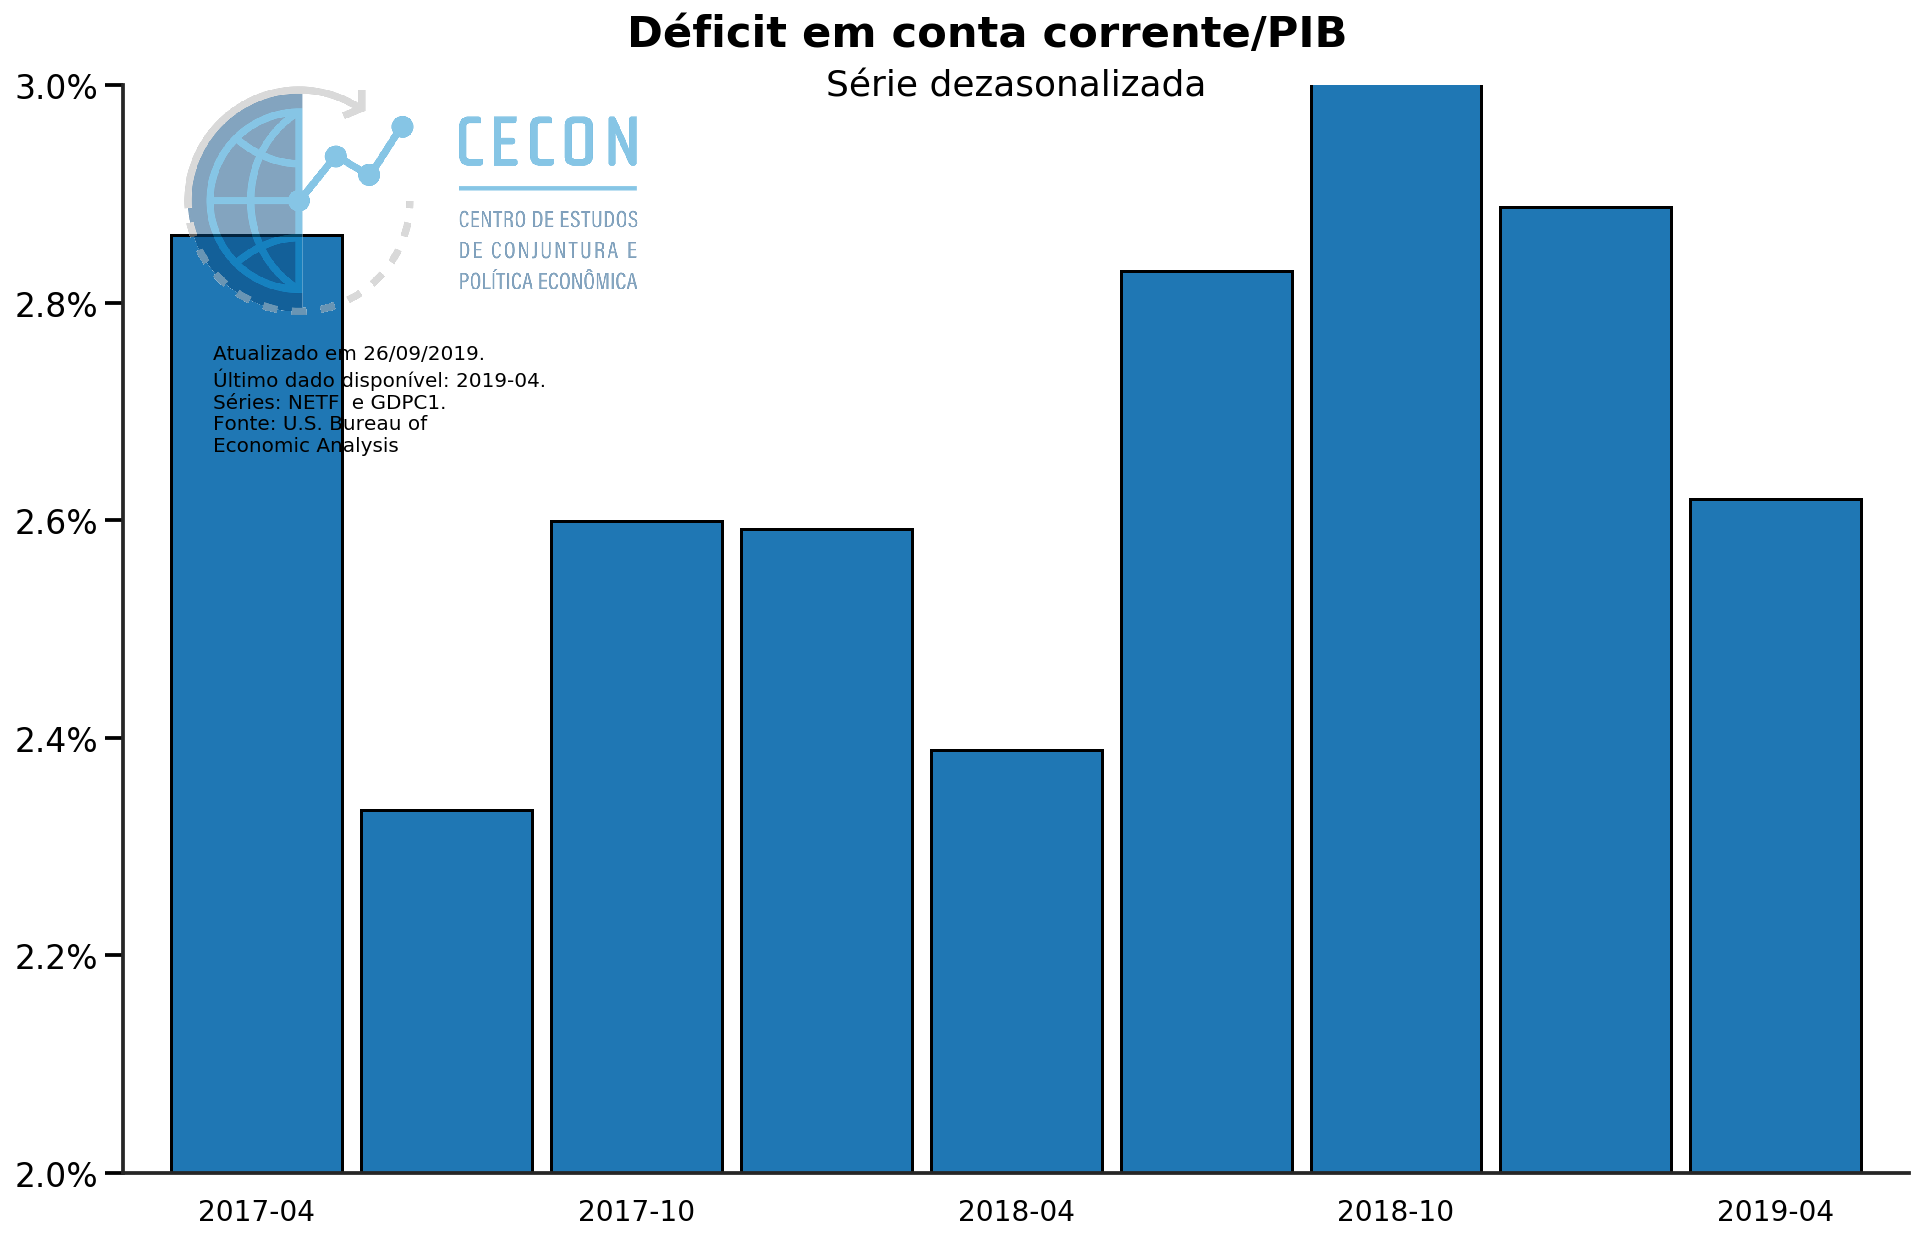

In [32]:
sns.set_context('talk')
fim = 9
periodo = 1
fig, ax = plt.subplots()


df['Déficit corrente/PIB'].tail(fim).plot(
    kind = 'bar', 
    ax = ax,
    width = 0.9,
    edgecolor='black',
    figsize=(16,10),
    zorder = 1
)


plt.suptitle(
    'Déficit em conta corrente/PIB', 
    color='black', 
    weight = 'bold',
    y = .93
)

ax.set_title(
    'Série dezasonalizada', 
    color='black', 
    y = 0.98
)

ax.text(0.05, 
        0.66, 
        'Fonte: U.S. Bureau of \nEconomic Analysis',
        verticalalignment='bottom', 
        horizontalalignment='left',
        transform=ax.transAxes,
        color='black', fontsize=10)
ax.text(
    0.05, 
    0.7,
    'Atualizado em {}. \nÚltimo dado disponível: {}. \nSéries: {}.'.format(
        datetime.datetime.now().strftime("%d/%m/%Y"),
        df.index[-1].to_period('M'),
        "NETFI e GDPC1"
    ),
    verticalalignment='bottom',
    horizontalalignment='left',
    transform=ax.transAxes,
    color='black', 
    fontsize=10
)

ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.set_ylim(0.02,0.03)
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.1%}'.format(y))) 
ax.yaxis.label.set_color('black')
ax.xaxis.label.set_color('black')

labels = [i.strftime("%Y-%m") for i in df.tail(fim).index]
dates = ["" for i in df.tail(fim).index]

for i in range(len(dates)):
  
  if i%2 == 0:
    dates[i] = labels[i]
    
ax.tick_params(axis='x', which='minor', width = 1)

ax.xaxis.set_ticklabels(
    dates, 
    fontsize = 14,
    minor = False,
    rotation = 0,
    color = 'black'
)
ax.xaxis.set_ticks_position('none') 

ax2 = fig.add_axes([0.15,0.7,0.2,0.2])
ax2.imshow(
    logo, 
    aspect='equal',
    zorder=0,
    alpha=.5
)

ax2.axis('off')

sns.despine()
fig.savefig(
    'Conta_Corrente.png',
    bbox_inches='tight', 
    dpi = 300,
    pad_inches=0.05
)
plt.show()

## Balança comercial

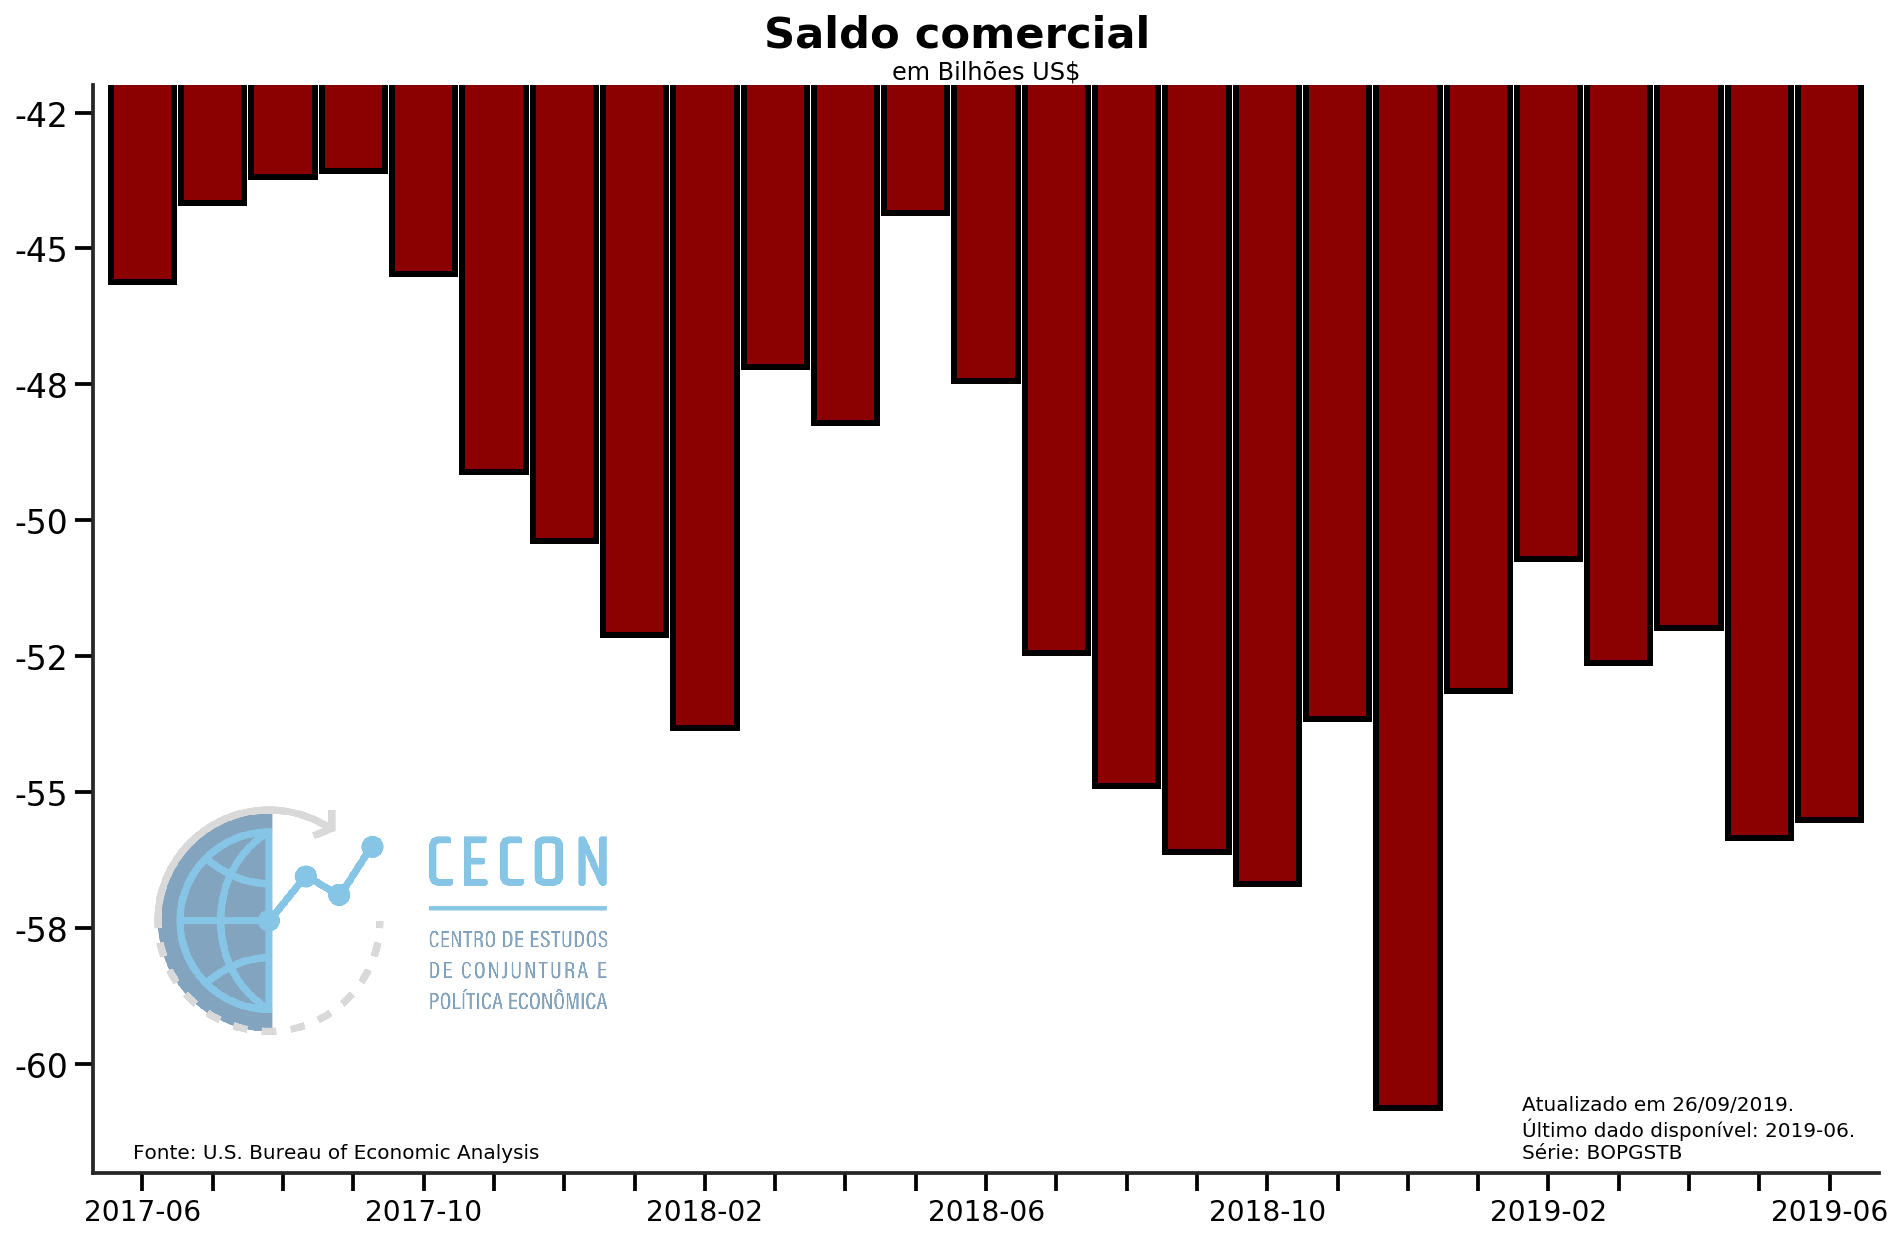

BOPGSTB  Saldo comercial  Média móvel
                                                 
2019-02-01   -10.56           -10.56         2.10
2019-03-01    -1.90            -1.90         2.24
2019-04-01   -14.52           -14.52         1.14
2019-05-01     5.09             5.09         2.80
2019-06-01     9.47             9.47         4.60

In [33]:
df = web.DataReader(
    [
        'BOPGSTB',  # Trade Balance: Goods and Services, Balance of Payments Basis Millions of Dollars, Seasonally Adjusted
    ],
    'fred',
    start, end
)
df["Saldo comercial"] = df['BOPGSTB']
df.index.name = ''
df["Média móvel"] = df['Saldo comercial'].rolling(12).mean()
df.dropna(inplace=True)

fim = (len(df.loc["2017-06-01":, "Saldo comercial"]))
periodo = len(df["2018"])
sns.set_context('talk')
fig, ax = plt.subplots()

df["Saldo comercial"].tail(fim).plot(
    kind='bar',
    ax=ax,
    width=0.9,
    color='darkred',
    legend=False,
    lw=3,
    edgecolor='black',
    figsize=(16, 10),
    zorder=1
)

plt.suptitle(
    'Saldo comercial',
    color='black',
    weight='bold',
    y=.93
)

ax.set_title(
    'em Bilhões US\$',
    color='black',
    y=.995,
    fontsize=12
)

ax.text(0.25,
        0.01,
        'Fonte: U.S. Bureau of Economic Analysis',
        verticalalignment='bottom',
        horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=10)
ax.text(
    0.8,
    0.01,
    'Atualizado em {}. \nÚltimo dado disponível: {}. \nSérie: {}'.format(
        datetime.datetime.now().strftime("%d/%m/%Y"),
        df.index[-1].to_period('M'),
        "BOPGSTB"
    ),
    verticalalignment='bottom',
    horizontalalignment='left',
    transform=ax.transAxes,
    color='black',
    fontsize=10
)

ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.yaxis.label.set_color('black')
ax.xaxis.label.set_color('black')
ax.yaxis.set_major_formatter(FuncFormatter(
    lambda y, _: '{:.0f}'.format(y/1000)))

labels = [i.strftime("%Y-%m") for i in df.tail(fim).index]
dates = ["" for i in df.tail(fim).index]

for i in range(len(dates)):

    if i % 4 == 0:
        dates[i] = labels[i]

ax.tick_params(axis='x', which='minor', width=1)
ax.set_ylim(-62000, -42000)

ax.xaxis.set_ticklabels(
    dates,
    fontsize=14,
    minor=False,
    rotation=0,
    color='black'
)

ax2 = fig.add_axes([0.15, 0.2, 0.2, 0.2])
ax2.imshow(
    logo,
    aspect='equal',
    zorder=0,
    alpha=.5
)

ax2.axis('off')

sns.despine()
fig.savefig(
    'Apresentacao/figs/Saldo_Comercial.png',
    bbox_inches='tight',
    dpi=300,
    pad_inches=0.05
)
plt.show()
(df.pct_change(4).round(4)*100).tail()

## Decomposição balança comercial

In [34]:
df = web.DataReader(
    [
        'NETEXP', # Net Exports of Goods and Services 
        'A253RC1Q027SBEA', # Current receipts from the rest of the world: Exports of goods
        'A255RC1Q027SBEA', # Current payments to the rest of the world: Imports of goods
        'A646RC1Q027SBEA', # Current receipts from the rest of the world: Exports of services
        'B656RC1Q027SBEA', # Current payments to the rest of the world: Imports of services
        'EXPGS', # Exports of Goods and Services
        'IMPGS', # Imports of Goods and Services
    ],
    'fred',
    start, end
)
df.columns = [
    "Exportações líquidas",
    "Exp. Bens",
    "Imp. Bens",
    "Exp. Serviços",
    "Imp. Serviços",
    "Exportações",
    "Importações"
]
dropped = df.columns
df.index.name = ''
df["Saldo líquido: Bens"] = df["Exp. Bens"] - df["Imp. Bens"]
df["Saldo líquido: Serviços"] = df["Exp. Serviços"] - df["Imp. Serviços"]
df.tail()

Exportações líquidas  Exp. Bens  Imp. Bens  Exp. Serviços  \
                                                                        
2018-04-01              -568.391   1697.606   2542.720        845.996   
2018-07-01              -671.353   1661.279   2602.000        849.015   
2018-10-01              -684.148   1659.948   2601.235        850.569   
2019-01-01              -633.848   1661.761   2554.337        858.517   
2019-04-01              -663.867   1647.318   2566.143        855.193   

            Imp. Serviços  Exportações  Importações  Saldo líquido: Bens  \
                                                                           
2018-04-01        569.273     2543.602     3111.993             -845.114   
2018-07-01        579.647     2510.294     3181.647             -940.721   
2018-10-01        593.430     2510.517     3194.665             -941.287   
2019-01-01        599.788     2520.278     3154.126             -892.576   
2019-04-01        600.235     2502.511     3166.378             -918.825   

            Saldo líquido: Serviços  
                                     
2018-04-01                  276.723  
2018-07-01                  269.368  
2018-10-01                  257.139  
2019-01-01                  258.729  
2019-04-01                  254.958

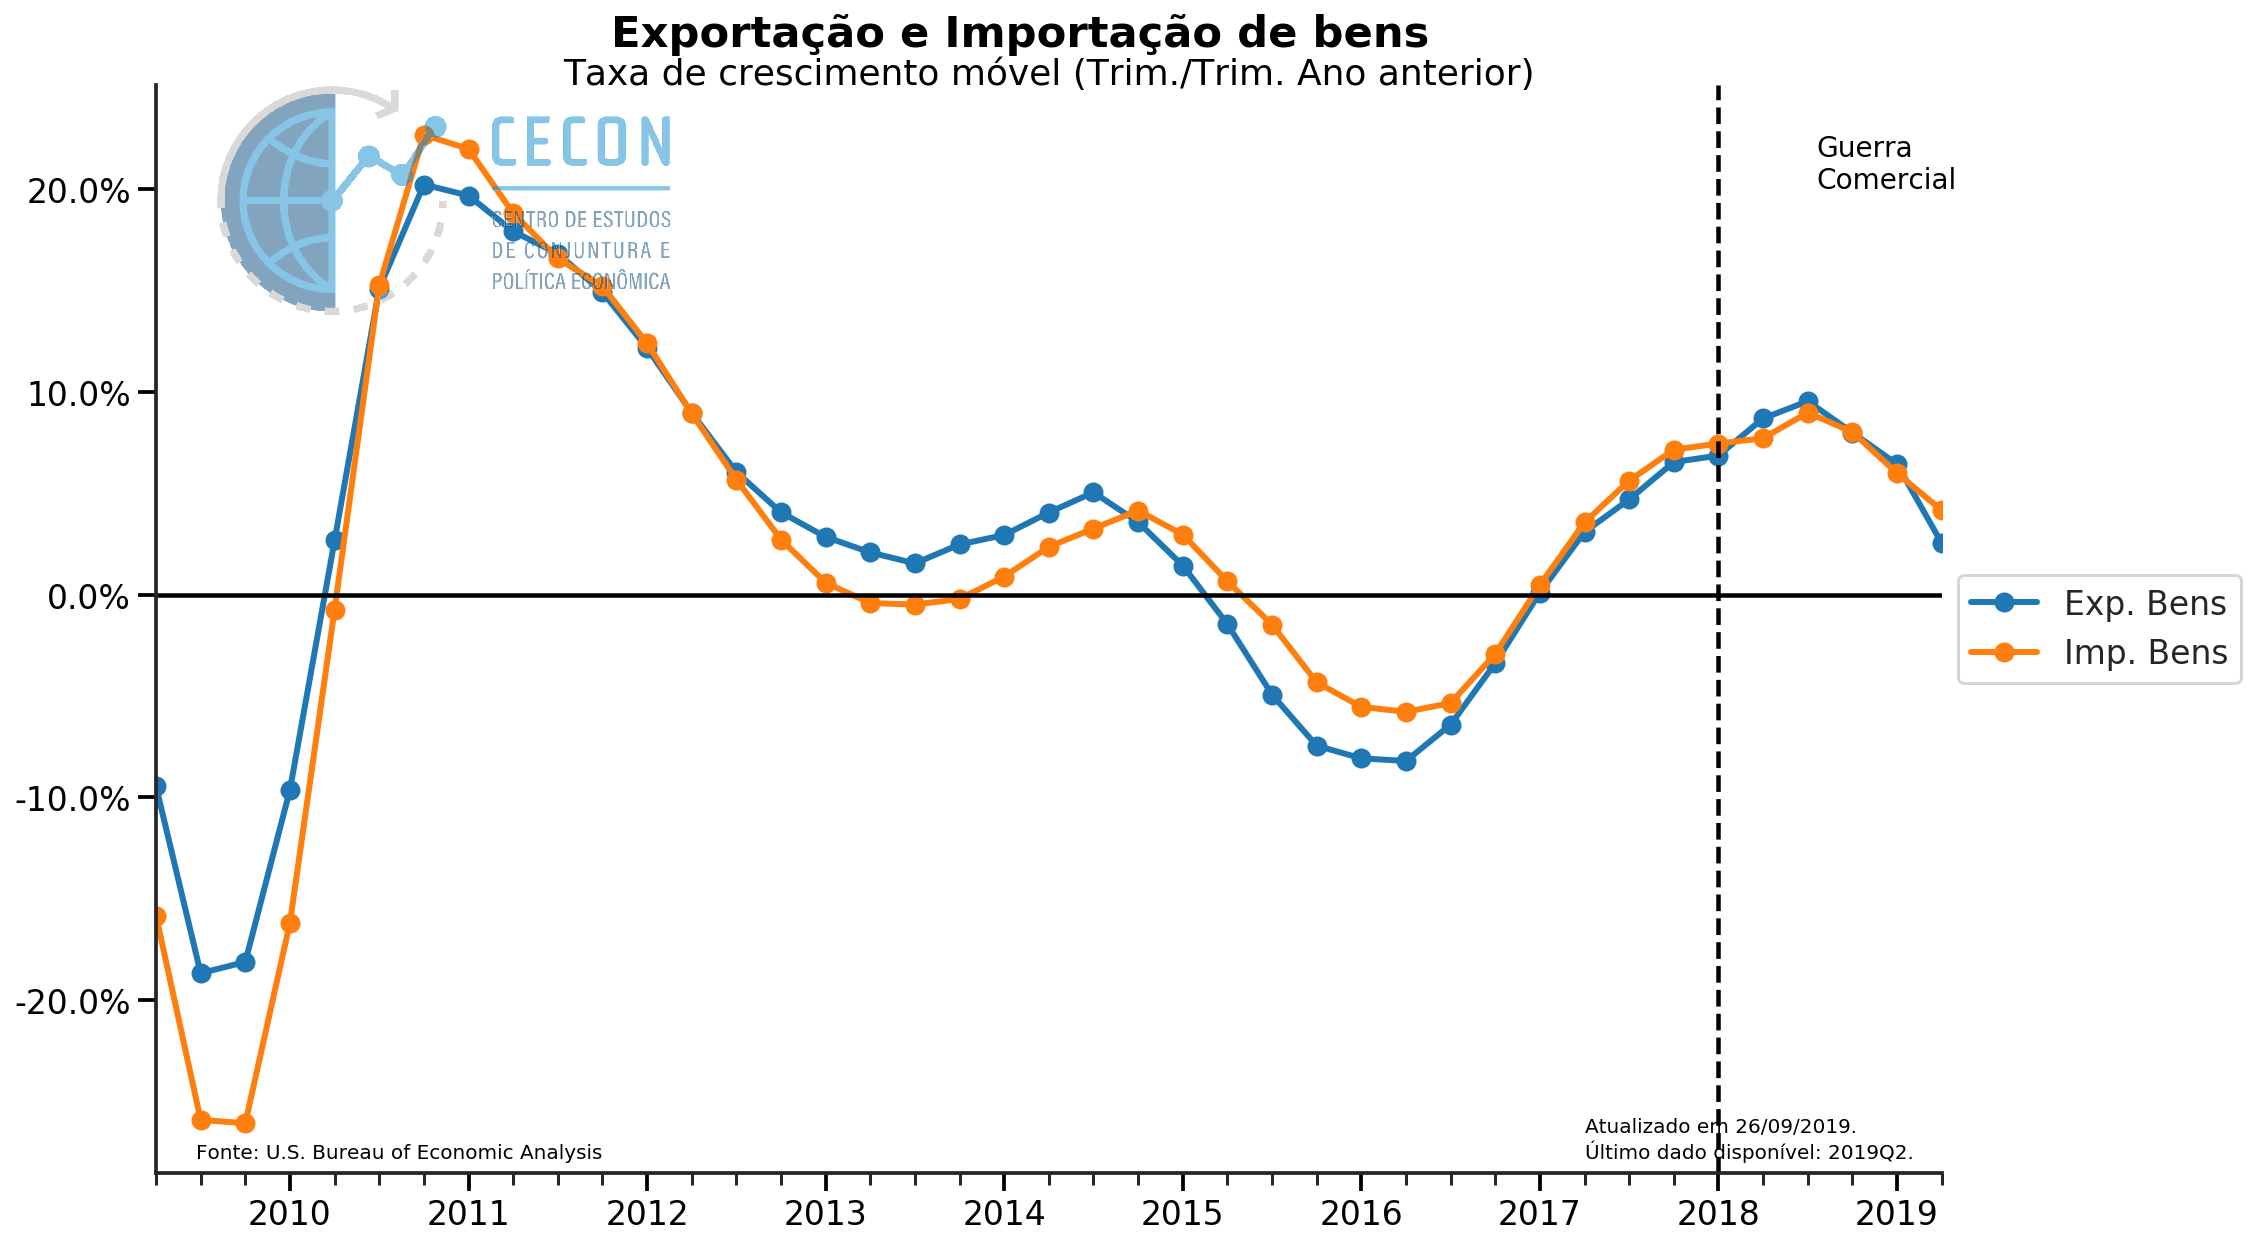

In [35]:
sns.set_context('talk')
fim = 10*4 + 1
periodo = 4
fig, ax = plt.subplots(figsize=(16, 10))

df[[
    "Exp. Bens",
    "Imp. Bens"
]].rolling(periodo).mean().pct_change(periodo).tail(fim).plot(
    ax = ax,
    lw = 3,
    marker = 'o',
    figsize=(16,10),
    zorder = 1
)

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.suptitle(
    'Exportação e Importação de bens', 
    color='black', 
    weight = 'bold',
    y = .93
)

ax.set_title(
    'Taxa de crescimento móvel (Trim./Trim. Ano anterior)', 
    color='black', 
    y = .99
)

ax.text(0.25, 
        0.01, 
        'Fonte: U.S. Bureau of Economic Analysis',
        verticalalignment='bottom', 
        horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=10)
ax.text(
    0.8, 
    0.01,
    'Atualizado em {}. \nÚltimo dado disponível: {}.'.format(
        datetime.datetime.now().strftime("%d/%m/%Y"),
        df.index[-1].to_period('Q')
    ),
    verticalalignment='bottom',
    horizontalalignment='left',
    transform=ax.transAxes,
    color='black', 
    fontsize=10
)

ax.axhline(y = 0, color = 'black')
ax.axvline(x = "2018-03-22", color = 'black', label = "Guerra comercial", ls = '--')
ax.text(0.93, 0.9, 'Guerra\nComercial',
    verticalalignment='bottom',
    horizontalalignment='left',
    transform=ax.transAxes,
    color='black', 
    fontsize=14
       )

ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.yaxis.label.set_color('black')
ax.xaxis.label.set_color('black')
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.1%}'.format(y))) 

ax2 = fig.add_axes([0.15,0.7,0.2,0.2])
ax2.imshow(
    logo, 
    aspect='equal',
    zorder=0,
    alpha=.5
)

ax2.axis('off')

sns.despine()
fig.savefig(
    'Apresentacao/figs/Export_Import.png',
    bbox_inches='tight', 
    dpi = 300,
    pad_inches=0.05
)
plt.show()

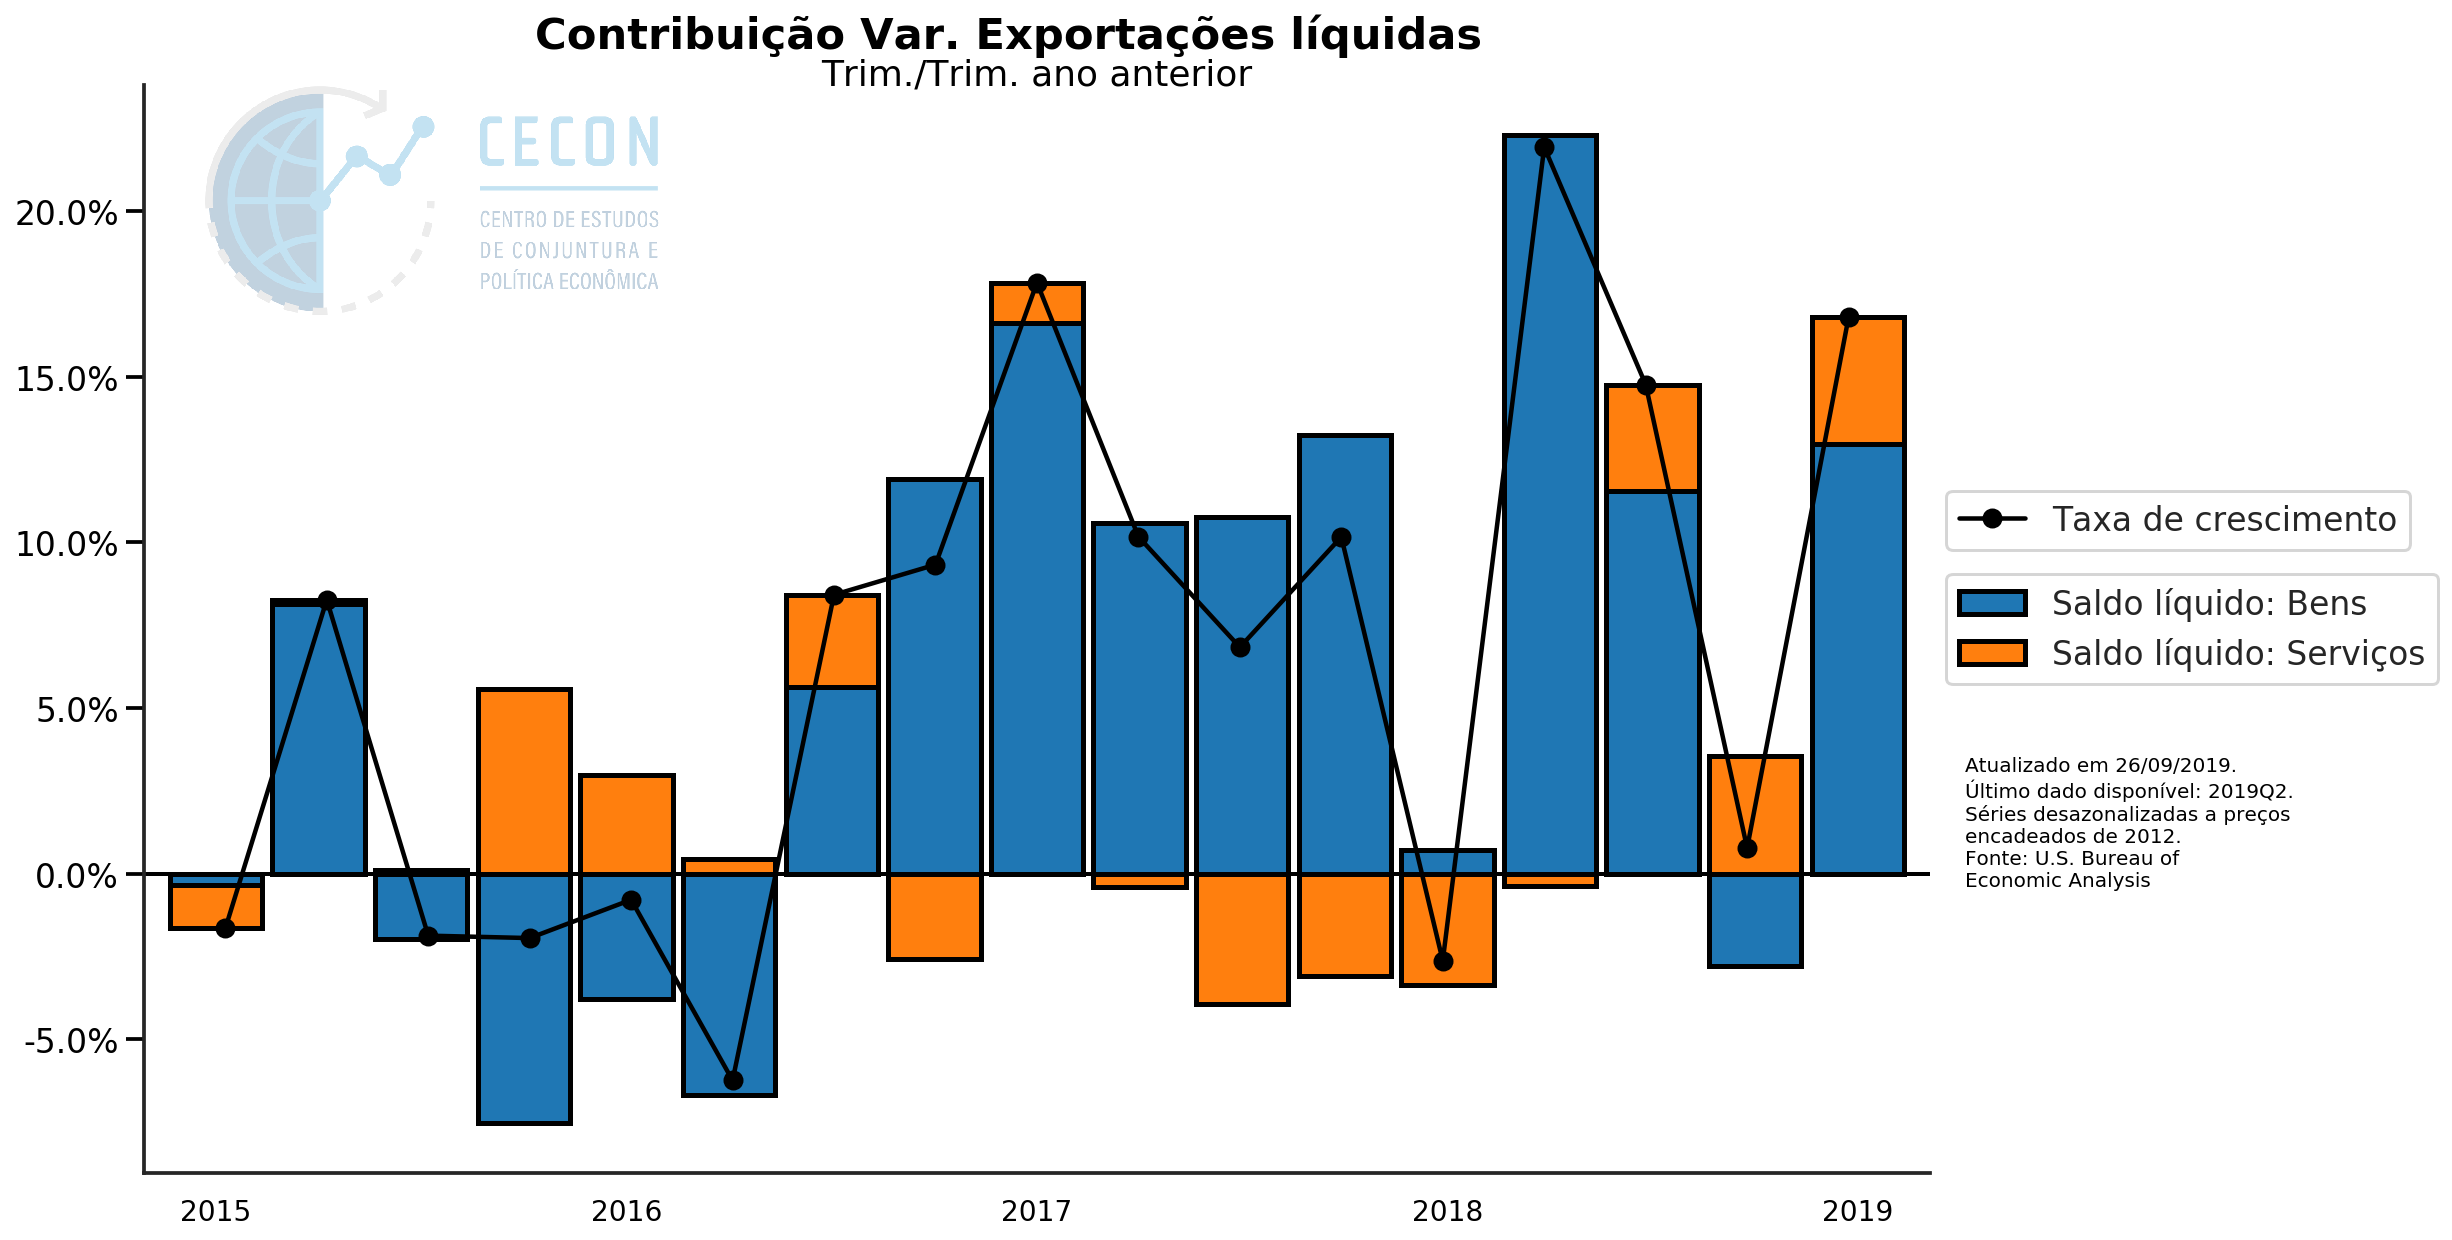

In [36]:
sns.set_context('talk')
fim = 17
periodo = 4
fig, ax = plt.subplots(figsize=(16, 10))

contribuicao = (df.drop(dropped, axis='columns').diff(
    periodo).apply(lambda x: x / (df["Exportações líquidas"].shift(periodo))).tail(fim))
soma = df.drop(dropped, axis='columns').diff(periodo).apply(lambda x: x / (df[
    "Exportações líquidas"].shift(periodo))).tail(fim).sum(axis=1)

contribuicao.apply(lambda x: (x / soma) * df["Exportações líquidas"].pct_change(periodo).tail(
    fim)).plot(
        kind='bar',
        stacked=True,
        ax=ax,
        width=0.9,
        # cmap="RdYlGn",
        edgecolor='black',
        linewidth=2.5,
        figsize=(16, 10),
        zorder=1)

ax.axhline(y=0, color='black', linestyle='-', lw=2)

axl = ax.twiny()
axl.plot(ax.get_xticks(),
         df["Exportações líquidas"].pct_change(periodo).tail(fim),
         marker='o',
         ls='-',
         color='black',
         label='Taxa de crescimento'
        )

axl.axis('off')
axl.legend(loc='center left', bbox_to_anchor=(1, 0.6))

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.suptitle(
    'Contribuição Var. Exportações líquidas',
    color='black',
    weight='bold',
    y=.93)

ax.set_title('Trim./Trim. ano anterior', color='black', y=.99)

ax.text(1.02,
        0.26,
        'Fonte: U.S. Bureau of \nEconomic Analysis',
        verticalalignment='bottom',
        horizontalalignment='left',
        transform=ax.transAxes,
        color='black',
        fontsize=10)
ax.text(1.02,
        0.3,
        'Atualizado em {}. \nÚltimo dado disponível: {}. \nSéries {}.'.format(
            datetime.datetime.now().strftime("%d/%m/%Y"),
            df.index[-1].to_period('Q'),
            "desazonalizadas a preços \nencadeados de 2012"),
        verticalalignment='bottom',
        horizontalalignment='left',
        transform=ax.transAxes,
        color='black',
        fontsize=10)

ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.yaxis.label.set_color('black')
ax.xaxis.label.set_color('black')
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.1%}'.format(y)))

labels = [i.strftime("%Y") for i in df.tail(fim).index]
dates = ["" for i in df.tail(fim).index]

for i in range(len(dates)):

    if i % 4 == 0:
        dates[i] = labels[i]

ax.tick_params(axis='x', which='minor', width=1)

ax.xaxis.set_ticklabels(dates,
                        fontsize=14,
                        minor=False,
                        rotation=0,
                        color='black')
ax.xaxis.set_ticks_position('none')

ax2 = fig.add_axes([0.15, 0.7, 0.2, 0.2], zorder=0)
ax2.imshow(logo, aspect='equal', zorder=0, alpha=.25)

ax2.axis('off')

sns.despine()
fig.savefig(
    'Apresentacao/figs/Contrib_ExportLiq_AnoAnterior.png',
    bbox_inches='tight',
    dpi=300,
    pad_inches=0.05
)
plt.show()

# Emprego e produtividade

## Emprego

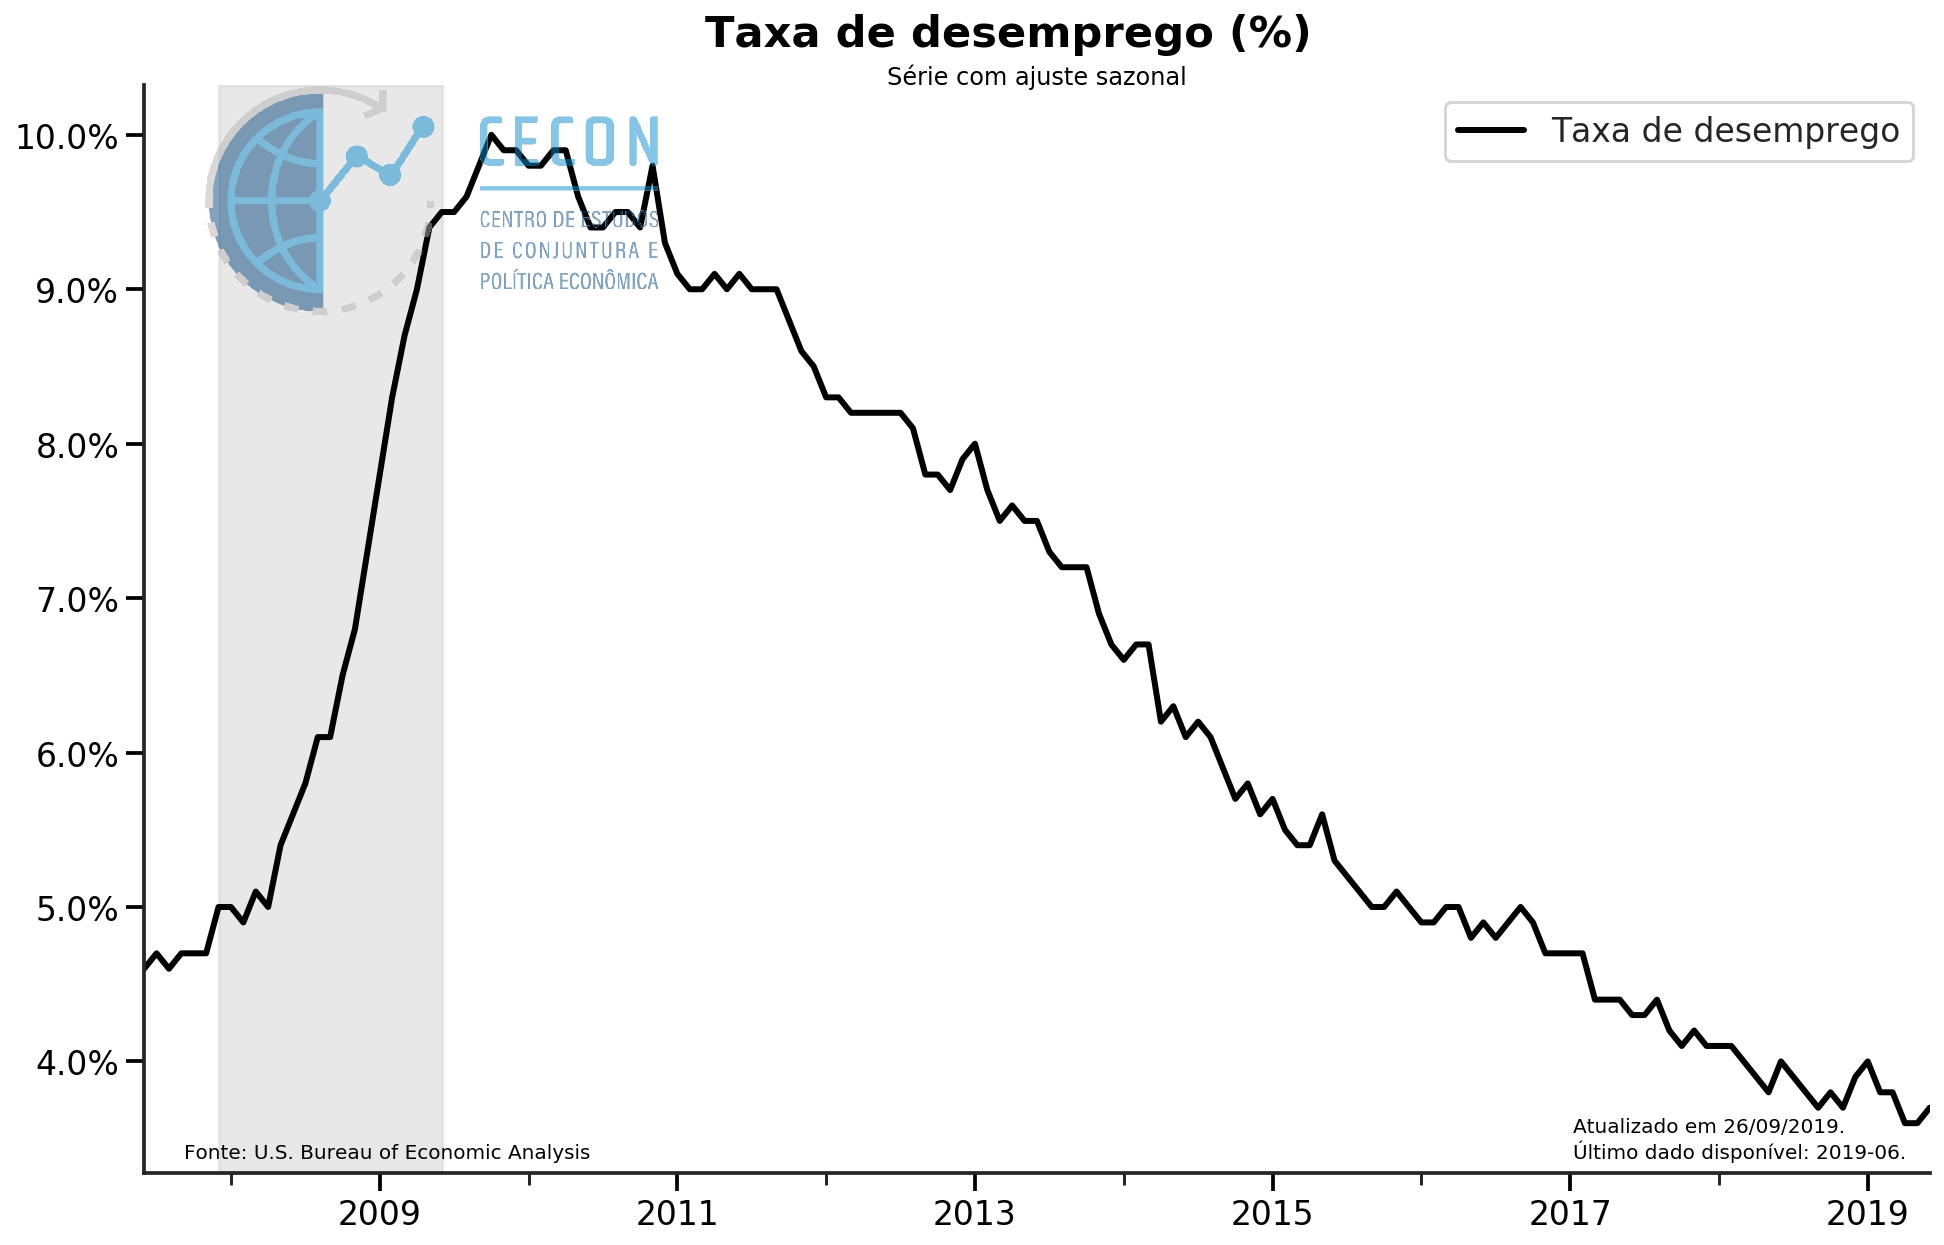

Taxa de desemprego
                              
2019-02-01                 3.8
2019-03-01                 3.8
2019-04-01                 3.6
2019-05-01                 3.6
2019-06-01                 3.7

In [37]:
df = web.DataReader(
    [
        'UNRATE',
    ],
    'fred',
    start, end
)
df.columns = [
    "Taxa de desemprego"
]
df.index.name = ''

fim = len(df.loc["2007-06-01":,])
periodo = len(df["2018"])
sns.set_context('talk')
fig, ax = plt.subplots()

(df/100).tail(fim).plot(
    ax=ax,
    lw=3,
    color='black',
    figsize=(16, 10),
    zorder=1
)

ax.legend(loc='best').set_zorder(0)

plt.suptitle(
    'Taxa de desemprego (%)',
    color='black',
    weight='bold',
    y=.93
)

ax.axvspan(xmin = "2007-12-01", xmax = "2009-06-01", color = 'lightgray', alpha = .5)

ax.set_title(
    'Série com ajuste sazonal',
    color='black',
    fontsize = 12,
    y=.99
)

ax.text(0.25,
        0.01,
        'Fonte: U.S. Bureau of Economic Analysis',
        verticalalignment='bottom',
        horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=10)
ax.text(
    0.8,
    0.01,
    'Atualizado em {}. \nÚltimo dado disponível: {}.'.format(
        datetime.datetime.now().strftime("%d/%m/%Y"),
        df.index[-1].to_period('M')
    ),
    verticalalignment='bottom',
    horizontalalignment='left',
    transform=ax.transAxes,
    color='black',
    fontsize=10
)

ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.yaxis.label.set_color('black')
ax.xaxis.label.set_color('black')
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.1%}'.format(y)))

ax.legend(loc='upper right')

ax2 = fig.add_axes([0.15, 0.7, 0.2, 0.2])
ax2.imshow(
    logo,
    aspect='equal',
    zorder=0,
    alpha=.5
)

ax2.axis('off')

sns.despine()
fig.savefig(
    'Apresentacao/figs/Tx_Desemprego.png',
    bbox_inches='tight',
    dpi=300,
    pad_inches=0.05
)
plt.show()
df.tail()

## Taxa de ocupação

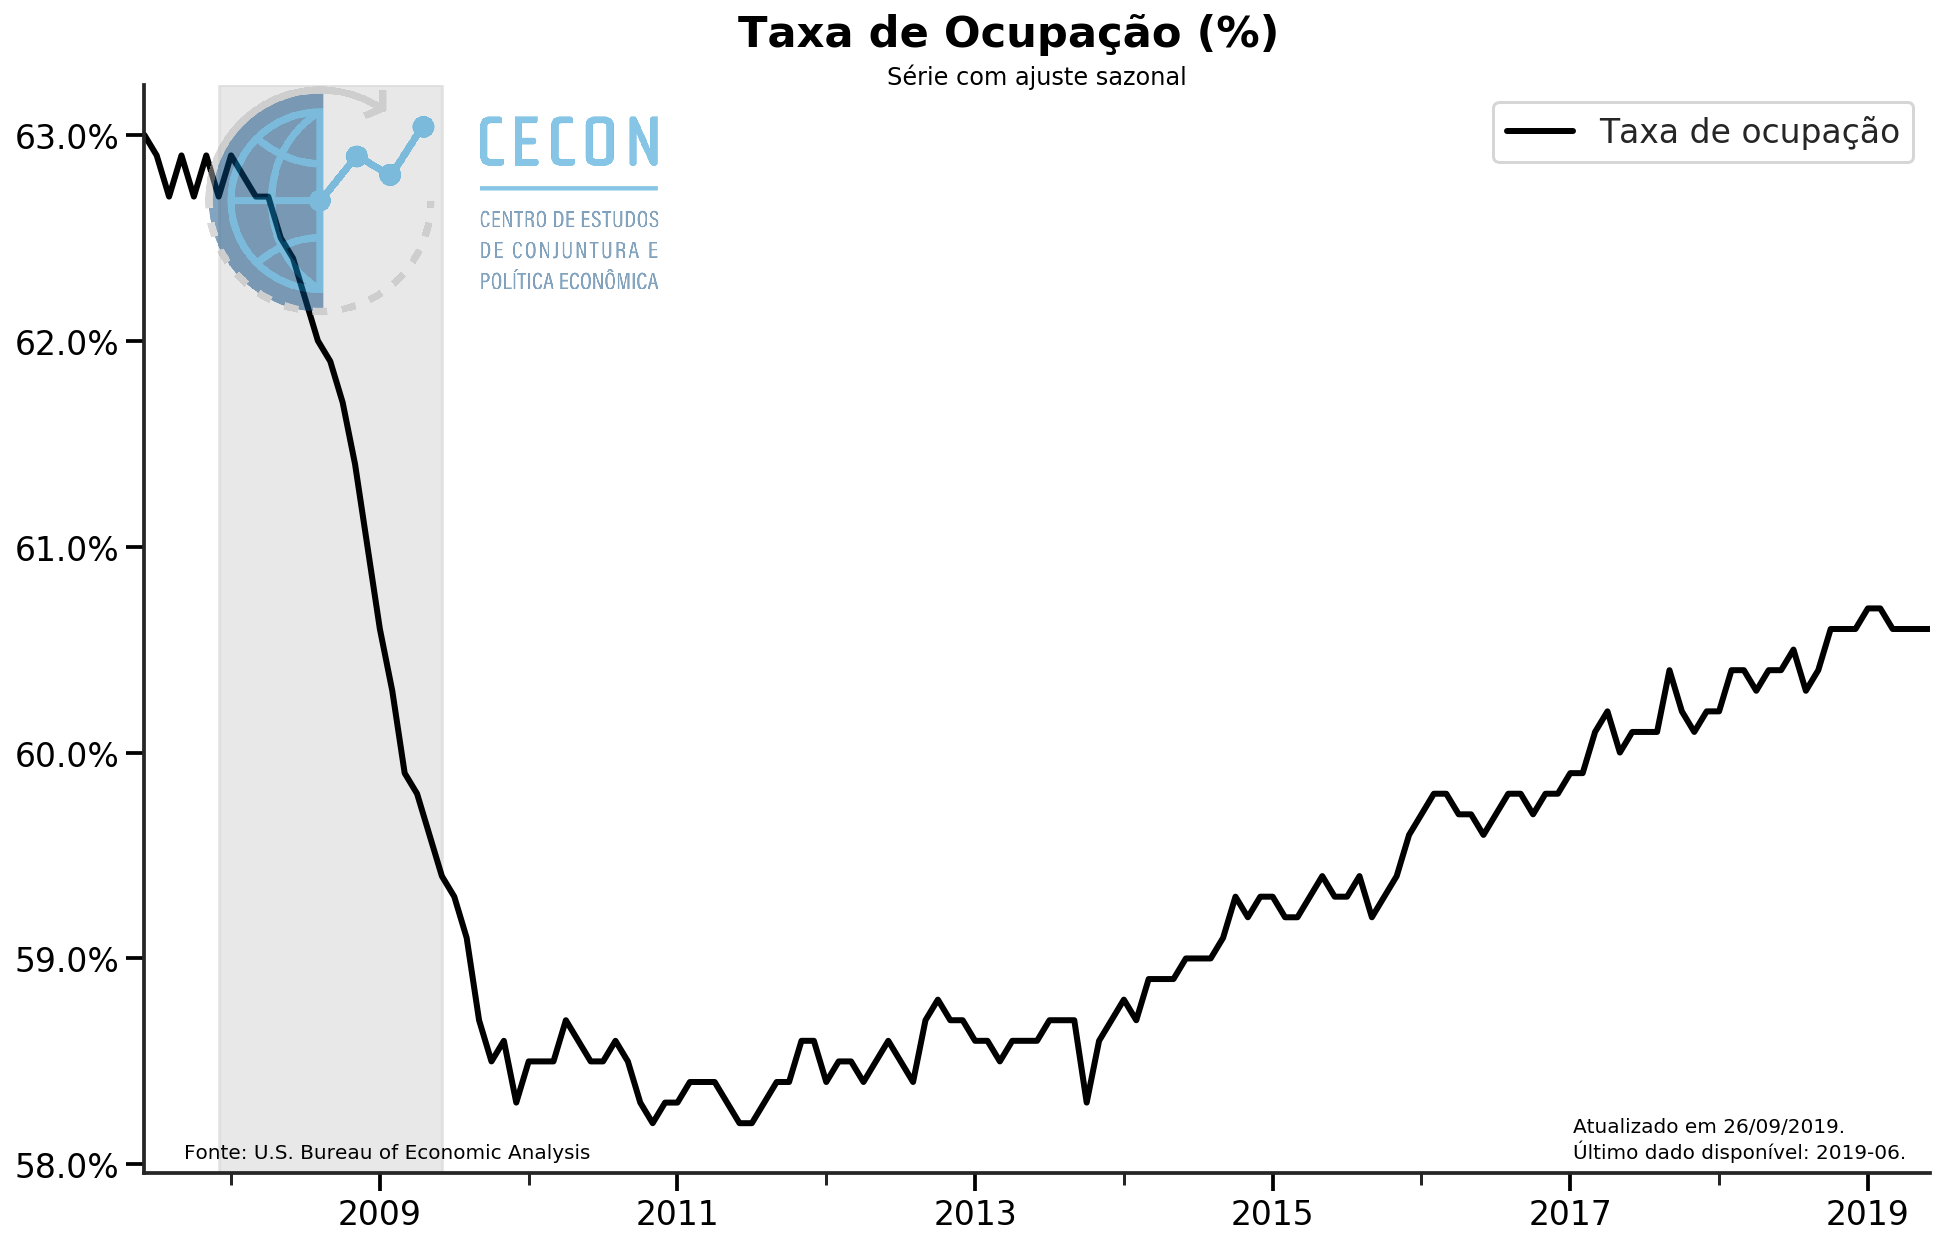

Taxa de ocupação
                            
2019-02-01              60.7
2019-03-01              60.6
2019-04-01              60.6
2019-05-01              60.6
2019-06-01              60.6

In [38]:
df = web.DataReader(
    [
        'EMRATIO',
    ],
    'fred',
    start, end
)
df.columns = [
    "Taxa de ocupação"
]
df.index.name = ''

fim = len(df.loc["2007-06-01":,])
periodo = len(df["2018"])
sns.set_context('talk')
fig, ax = plt.subplots()

(df/100).tail(fim).plot(
    ax=ax,
    lw=3,
    color='black',
    legend = False,
    figsize=(16, 10),
    zorder=1
)

plt.suptitle(
    'Taxa de Ocupação (%)',
    color='black',
    weight='bold',
    y=.93
)

ax.axvspan(xmin = "2007-12-01", xmax = "2009-06-01", color = 'lightgray', alpha = .5)

ax.set_title(
    'Série com ajuste sazonal',
    color='black',
    fontsize = 12,
    y=.99
)

ax.text(0.25,
        0.01,
        'Fonte: U.S. Bureau of Economic Analysis',
        verticalalignment='bottom',
        horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=10)
ax.text(
    0.8,
    0.01,
    'Atualizado em {}. \nÚltimo dado disponível: {}.'.format(
        datetime.datetime.now().strftime("%d/%m/%Y"),
        df.index[-1].to_period('M')
    ),
    verticalalignment='bottom',
    horizontalalignment='left',
    transform=ax.transAxes,
    color='black',
    fontsize=10
)

ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.yaxis.label.set_color('black')
ax.xaxis.label.set_color('black')
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.1%}'.format(y)))

ax.legend(loc='upper right')

ax2 = fig.add_axes([0.15, 0.7, 0.2, 0.2])
ax2.imshow(
    logo,
    aspect='equal',
    zorder=0,
    alpha=.5
)

ax2.axis('off')

sns.despine()
fig.savefig(
    'Apresentacao/figs/Tx_Ocupacao.png',
    bbox_inches='tight',
    dpi=300,
    pad_inches=0.05
)
plt.show()
df.tail()

## Salário nominal

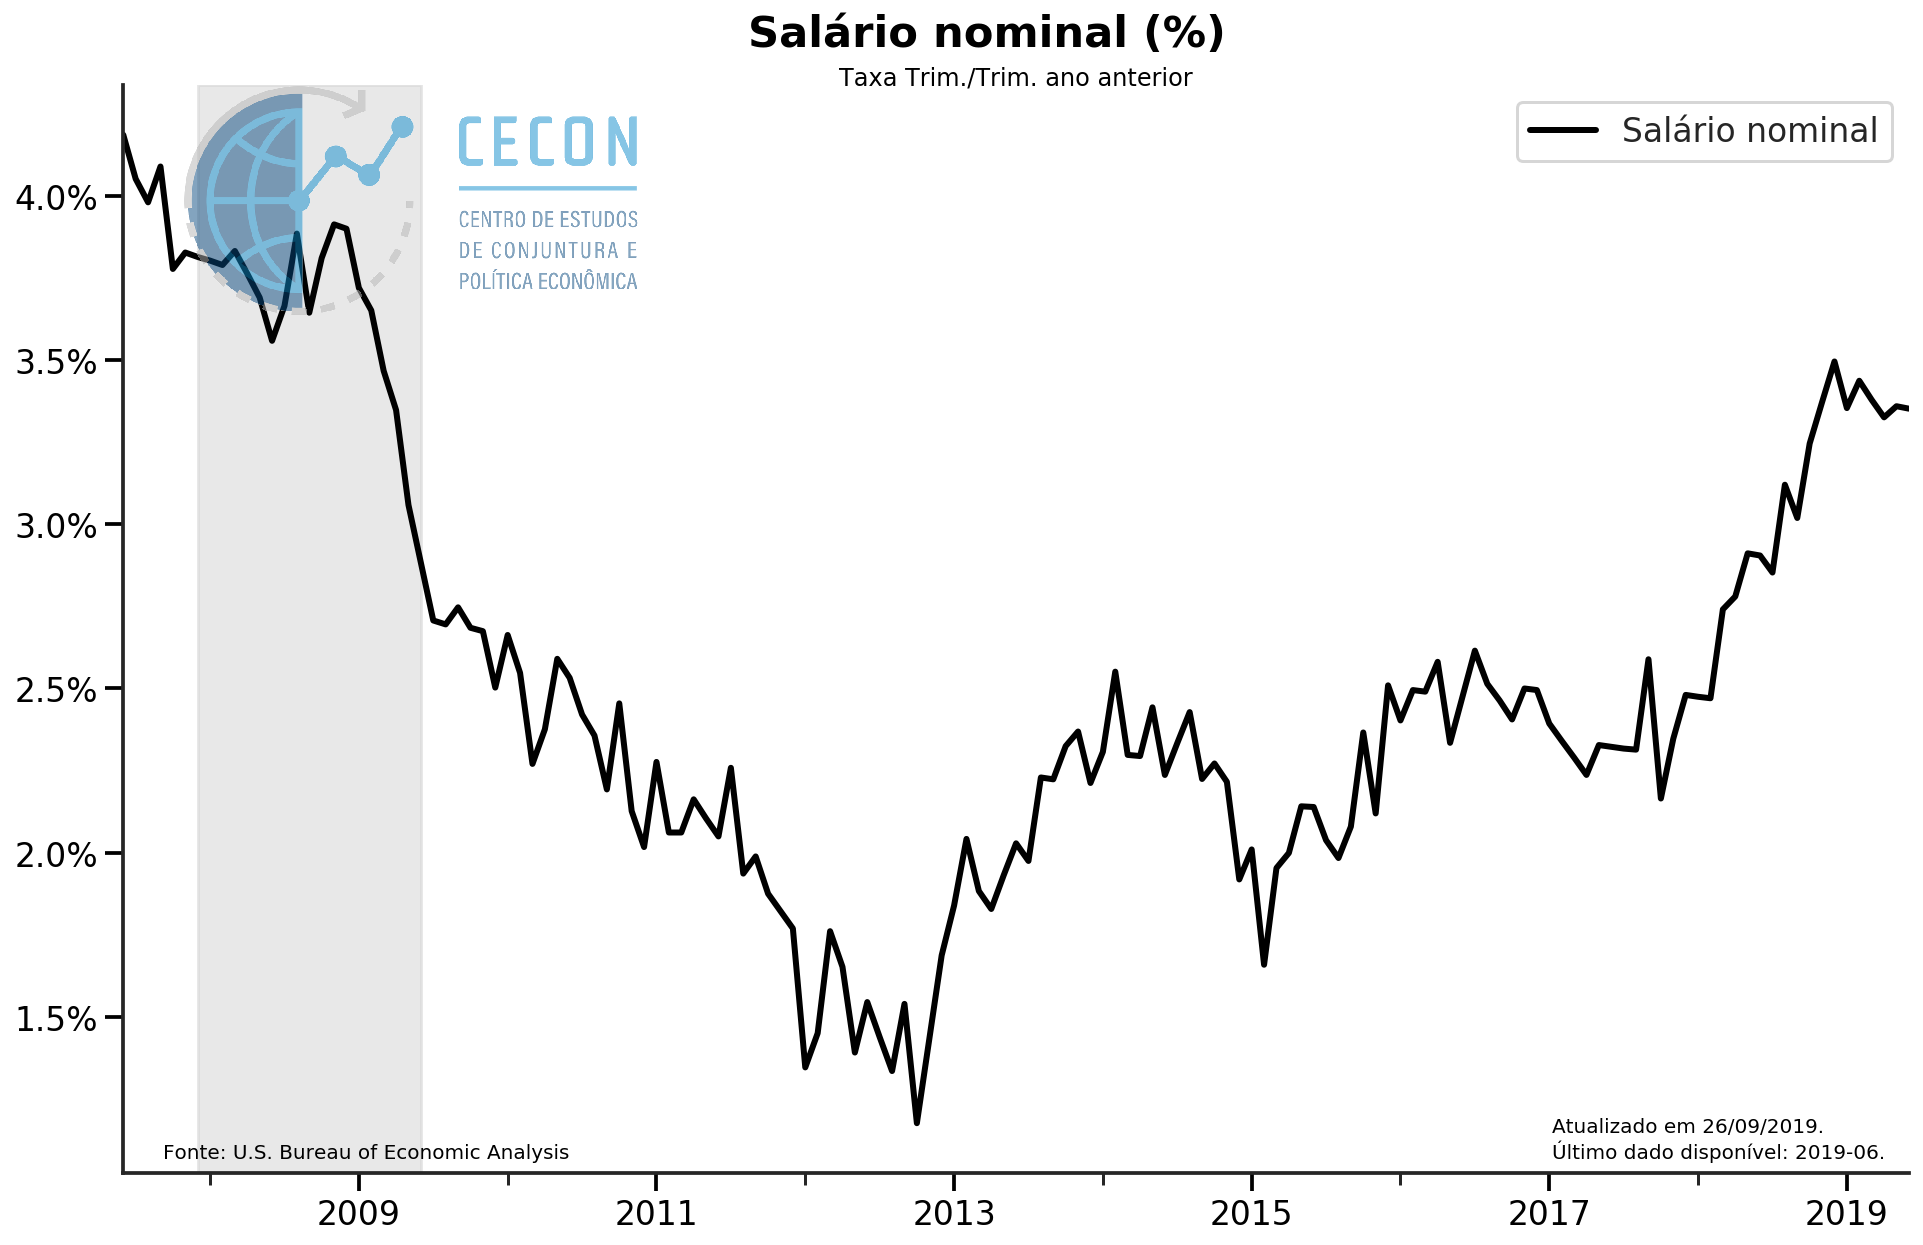

Salário nominal
                           
2019-02-01            23.17
2019-03-01            23.25
2019-04-01            23.30
2019-05-01            23.38
2019-06-01            23.43

In [39]:
df = web.DataReader(
    [
        'AHETPI',
    ],
    'fred',
    start, end
)
df.columns = [
    "Salário nominal"
]
df.index.name = ''

fim = len(df.loc["2007-06-01":,])
periodo = len(df["2018"])
sns.set_context('talk')
fig, ax = plt.subplots()

(df/100).pct_change(periodo).tail(fim).plot(
    ax=ax,
    lw=3,
    color='black',
    legend = False,
    figsize=(16, 10),
    zorder=1
)

plt.suptitle(
    'Salário nominal (%)',
    color='black',
    weight='bold',
    y=.93
)

ax.axvspan(xmin = "2007-12-01", xmax = "2009-06-01", color = 'lightgray', alpha = .5)

ax.set_title(
    'Taxa Trim./Trim. ano anterior',
    color='black',
    fontsize = 12,
    y=.99
)

ax.text(0.25,
        0.01,
        'Fonte: U.S. Bureau of Economic Analysis',
        verticalalignment='bottom',
        horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=10)
ax.text(
    0.8,
    0.01,
    'Atualizado em {}. \nÚltimo dado disponível: {}.'.format(
        datetime.datetime.now().strftime("%d/%m/%Y"),
        df.index[-1].to_period('M')
    ),
    verticalalignment='bottom',
    horizontalalignment='left',
    transform=ax.transAxes,
    color='black',
    fontsize=10
)

ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.yaxis.label.set_color('black')
ax.xaxis.label.set_color('black')
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.1%}'.format(y)))

ax.legend(loc='upper right')

ax2 = fig.add_axes([0.15, 0.7, 0.2, 0.2])
ax2.imshow(
    logo,
    aspect='equal',
    zorder=0,
    alpha=.5
)

ax2.axis('off')

sns.despine()
fig.savefig(
    'Apresentacao/figs/Nominal_Wage.png',
    bbox_inches='tight',
    dpi=300,
    pad_inches=0.05
)
plt.show()
df.tail()

## Produtividade

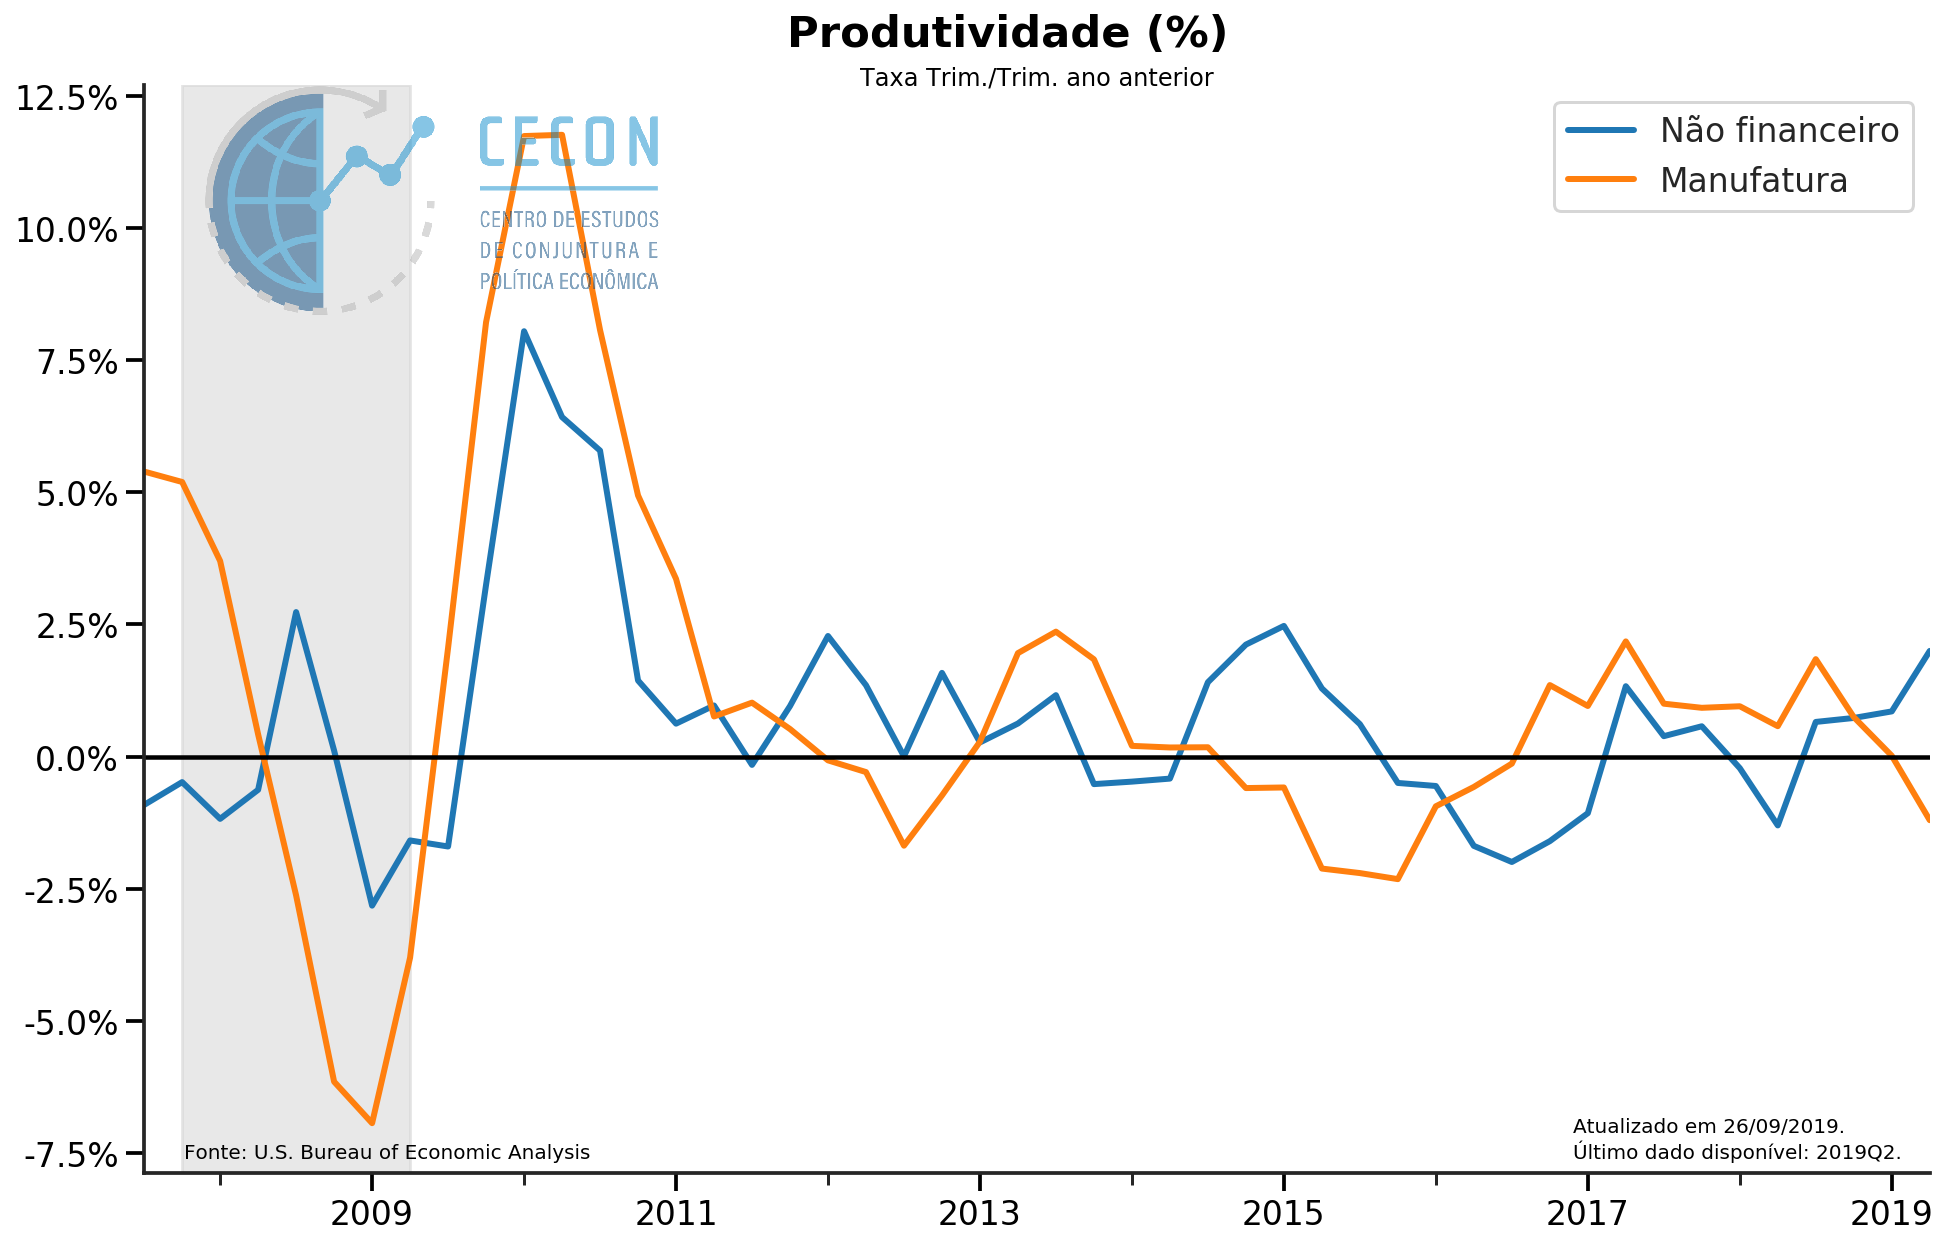

Não financeiro  Manufatura
                                      
2018-04-01         100.114     102.071
2018-07-01         101.131     102.446
2018-10-01         101.130     101.916
2019-01-01         101.582     101.468
2019-04-01         102.113     100.842

In [40]:
df = web.DataReader(
    [
        'PRS88003163',
        'PRS30006163'
    ],
    'fred',
    start, end
)
df.columns = [
    "Não financeiro",
    "Manufatura"
]
df.index.name = ''

sns.set_context('talk')
fim = len(df.loc["2007-06-01":,])
periodo = len(df["2018"])
fig, ax = plt.subplots()

(df/100).pct_change(periodo).tail(fim).plot(
    ax=ax,
    lw=3,
    legend = True,
    figsize=(16, 10),
    zorder=1
)

ax.axhline(y=0, color = 'black')

plt.suptitle(
    'Produtividade (%)',
    color='black',
    weight='bold',
    y=.93
)

ax.axvspan(xmin = "2007-12-01", xmax = "2009-06-01", color = 'lightgray', alpha = .5)

ax.set_title(
    'Taxa Trim./Trim. ano anterior',
    color='black',
    fontsize = 12,
    y=.99
)

ax.text(0.25,
        0.01,
        'Fonte: U.S. Bureau of Economic Analysis',
        verticalalignment='bottom',
        horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=10)
ax.text(
    0.8,
    0.01,
    'Atualizado em {}. \nÚltimo dado disponível: {}.'.format(
        datetime.datetime.now().strftime("%d/%m/%Y"),
        df.index[-1].to_period('Q')
    ),
    verticalalignment='bottom',
    horizontalalignment='left',
    transform=ax.transAxes,
    color='black',
    fontsize=10
)

ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.yaxis.label.set_color('black')
ax.xaxis.label.set_color('black')
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.1%}'.format(y)))

ax.legend(loc='upper right')

ax2 = fig.add_axes([0.15, 0.7, 0.2, 0.2])
ax2.imshow(
    logo,
    aspect='equal',
    zorder=0,
    alpha=.5
)

ax2.axis('off')

sns.despine()
fig.savefig(
    'Apresentacao/figs/Produtividade.png',
    bbox_inches='tight',
    dpi=300,
    pad_inches=0.05
)
plt.show()
df.tail()

## Emprego

In [41]:
df = web.DataReader(
    [
        'USPRIV',  # All Employees: Total Private Industries
        'USMINE',  # All Employees: Mining and logging
        'USCONS',  # All Employees: Construction
        'MANEMP', # All Employees: Manufacturing
        'CES0800000001', # All Employees: Private Service-Providing
    ],
    'fred',
    start,
    end)
df.columns = [
    "Total",
    "Extrativa",
    "Construção",
    "Manufatura",
    "Serviços"
]
df.index.name = ''
(df.pct_change(4).round(3)*100).tail()

Total  Extrativa  Construção  Manufatura  Serviços
                                                              
2019-02-01    0.6        0.5         0.7         0.6       0.6
2019-03-01    0.6        1.1         0.9         0.3       0.6
2019-04-01    0.5        0.5         1.1         0.2       0.5
2019-05-01    0.4       -0.1         0.4         0.1       0.4
2019-06-01    0.5        0.1         0.9         0.1       0.5

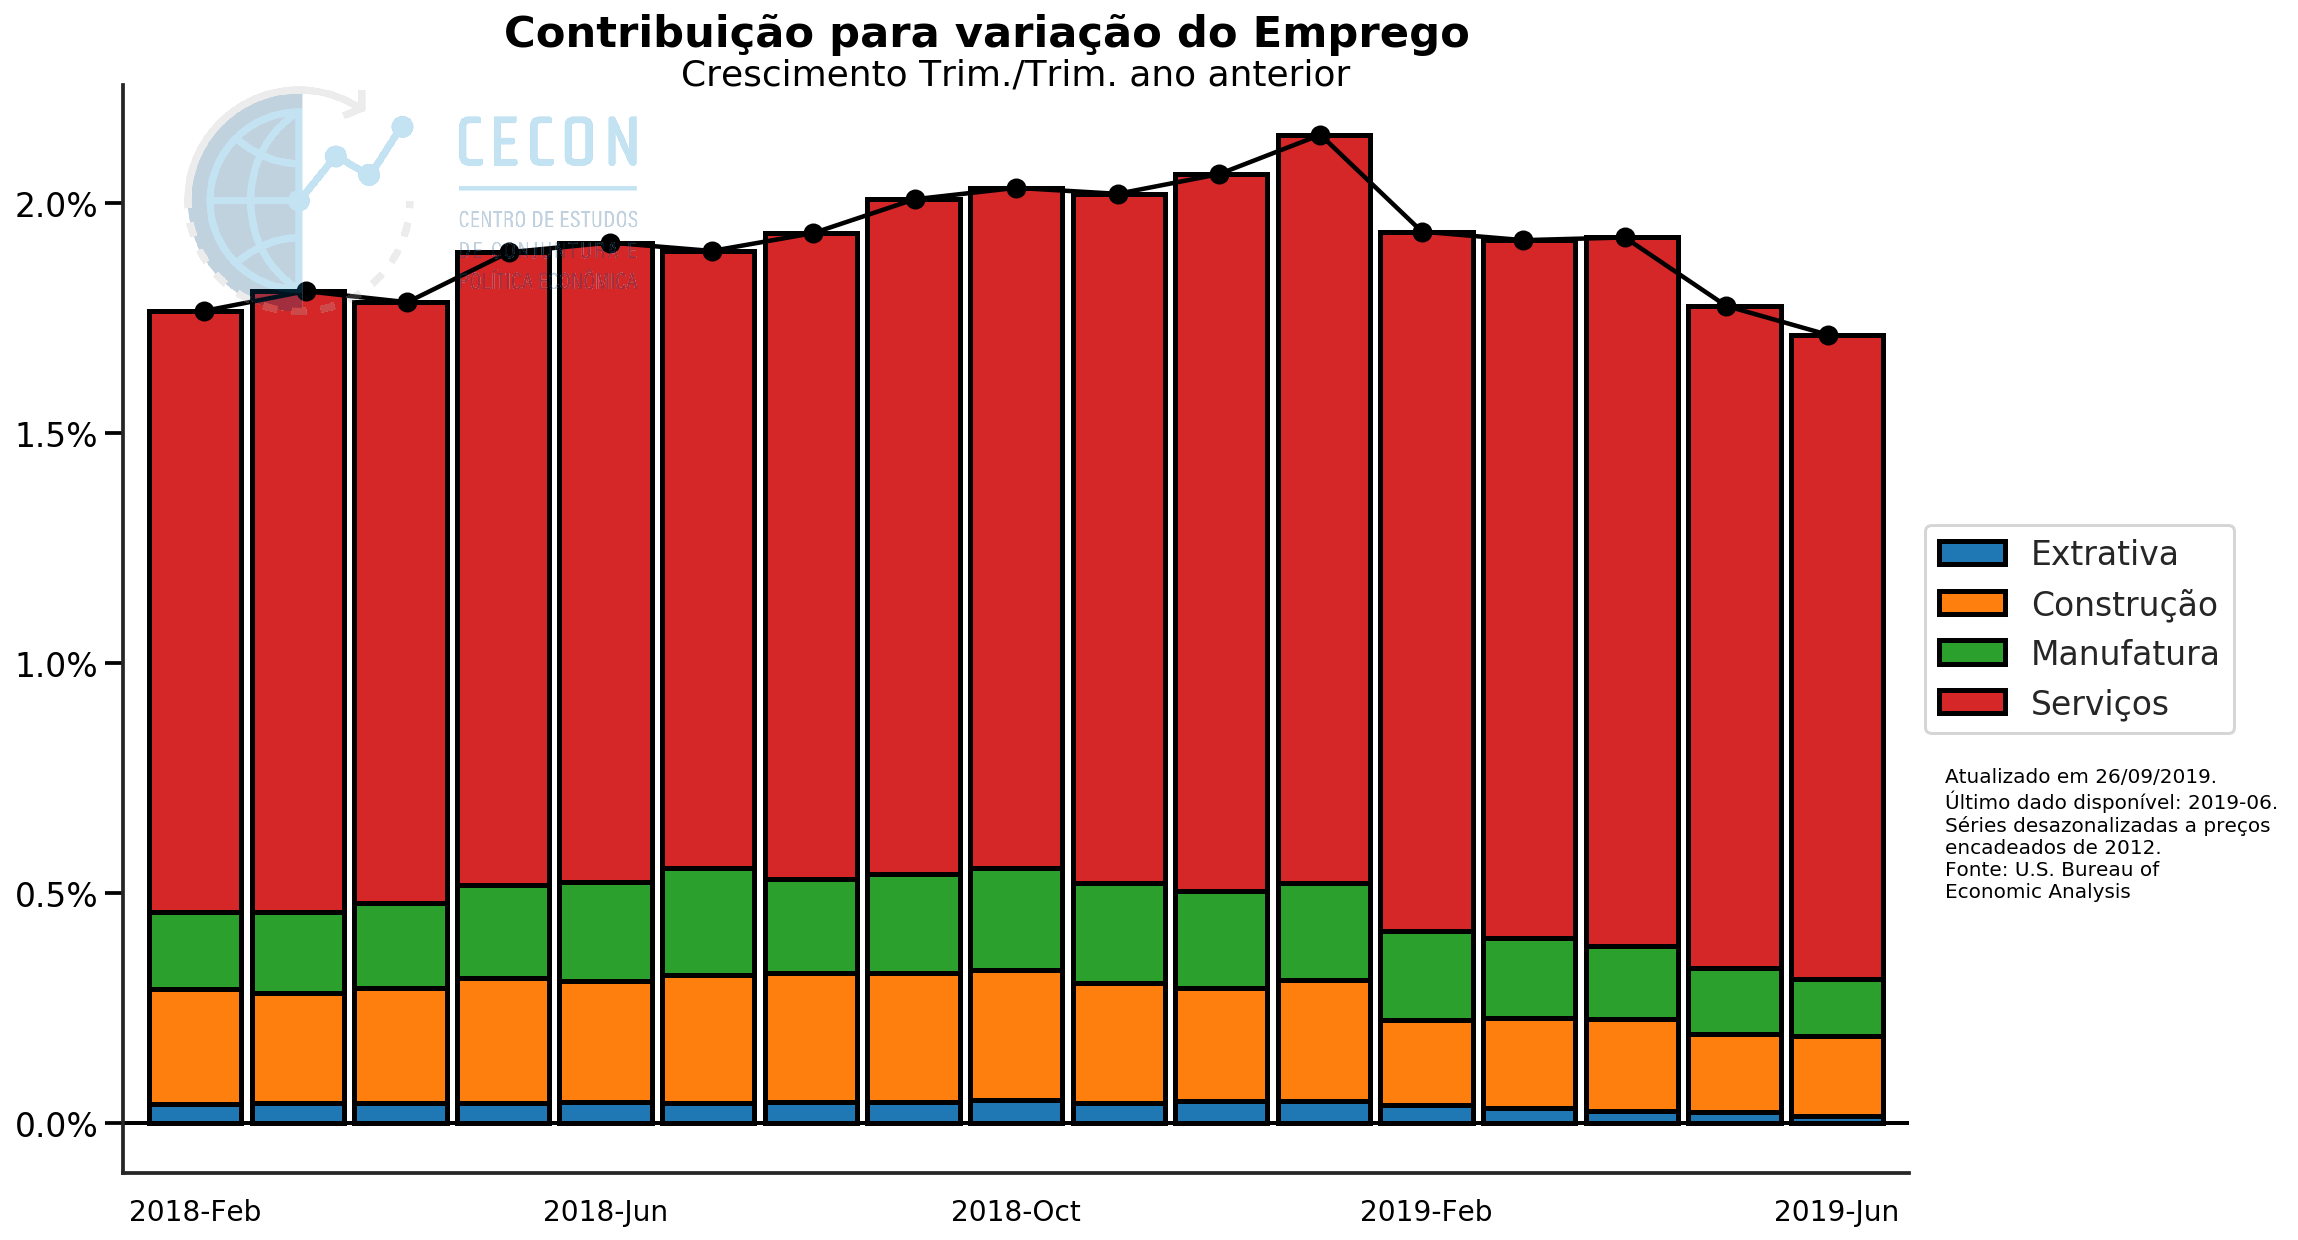

In [42]:
sns.set_context('talk')
#fim = len(df.loc["2007-06-01":,"Total"])
fim = 4*4 + 1
periodo = len(df.loc["2018-01-01":"2018-12-01","Total"])
fig, ax = plt.subplots(figsize=(16, 10))

contribuicao = (df.drop("Total", axis='columns').diff(
    periodo).apply(lambda x: x / (df["Total"].shift(periodo))).tail(fim))
soma = df.drop("Total", axis='columns').diff(periodo).apply(lambda x: x / (df[
    "Total"].shift(periodo))).tail(fim).sum(axis=1)

contribuicao.apply(lambda x: (x / soma) * df["Total"].pct_change(periodo).tail(
    fim)).plot(
        kind='bar',
        stacked=True,
        ax=ax,
        width=0.9,
        # cmap="RdYlGn",
        edgecolor='black',
        linewidth=2.5,
        figsize=(16, 10),
        zorder=1)

ax.axhline(y=0, color='black', linestyle='-', lw=2)

axl = ax.twiny()
axl.plot(ax.get_xticks(),
         df["Total"].pct_change(periodo).tail(fim),
         marker='o',
         ls='-',
         color='black',
         label="Total")

axl.axis('off')


# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.suptitle(
    'Contribuição para variação do Emprego',
    color='black',
    weight='bold',
    y=.93)

ax.set_title('Crescimento Trim./Trim. ano anterior', color='black', y=.99)

ax.text(1.02,
        0.25,
        'Fonte: U.S. Bureau of \nEconomic Analysis',
        verticalalignment='bottom',
        horizontalalignment='left',
        transform=ax.transAxes,
        color='black',
        fontsize=10)
ax.text(1.02,
        0.29,
        'Atualizado em {}. \nÚltimo dado disponível: {}. \nSéries {}.'.format(
            datetime.datetime.now().strftime("%d/%m/%Y"),
            df.index[-1].to_period('M'),
            "desazonalizadas a preços \nencadeados de 2012"),
        verticalalignment='bottom',
        horizontalalignment='left',
        transform=ax.transAxes,
        color='black',
        fontsize=10)

ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.yaxis.label.set_color('black')
ax.xaxis.label.set_color('black')
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.1%}'.format(y)))

labels = [i.strftime("%Y-%b") for i in df.tail(fim).index]
dates = ["" for i in df.tail(fim).index]

for i in range(len(dates)):

    if i % 4 == 0:
        dates[i] = labels[i]

ax.tick_params(axis='x', which='minor', width=1)

ax.xaxis.set_ticklabels(dates,
                        fontsize=14,
                        minor=False,
                        rotation=0,
                        color='black')
ax.xaxis.set_ticks_position('none')

ax2 = fig.add_axes([0.15, 0.7, 0.2, 0.2], zorder=0)
ax2.imshow(logo, aspect='equal', zorder=0, alpha=.25)

ax2.axis('off')

sns.despine()
fig.savefig(
    'Apresentacao/figs/Contrib_Emprego_AnoAnterior.png',
    bbox_inches='tight',
    dpi=300,
    pad_inches=0.05
)
plt.show()

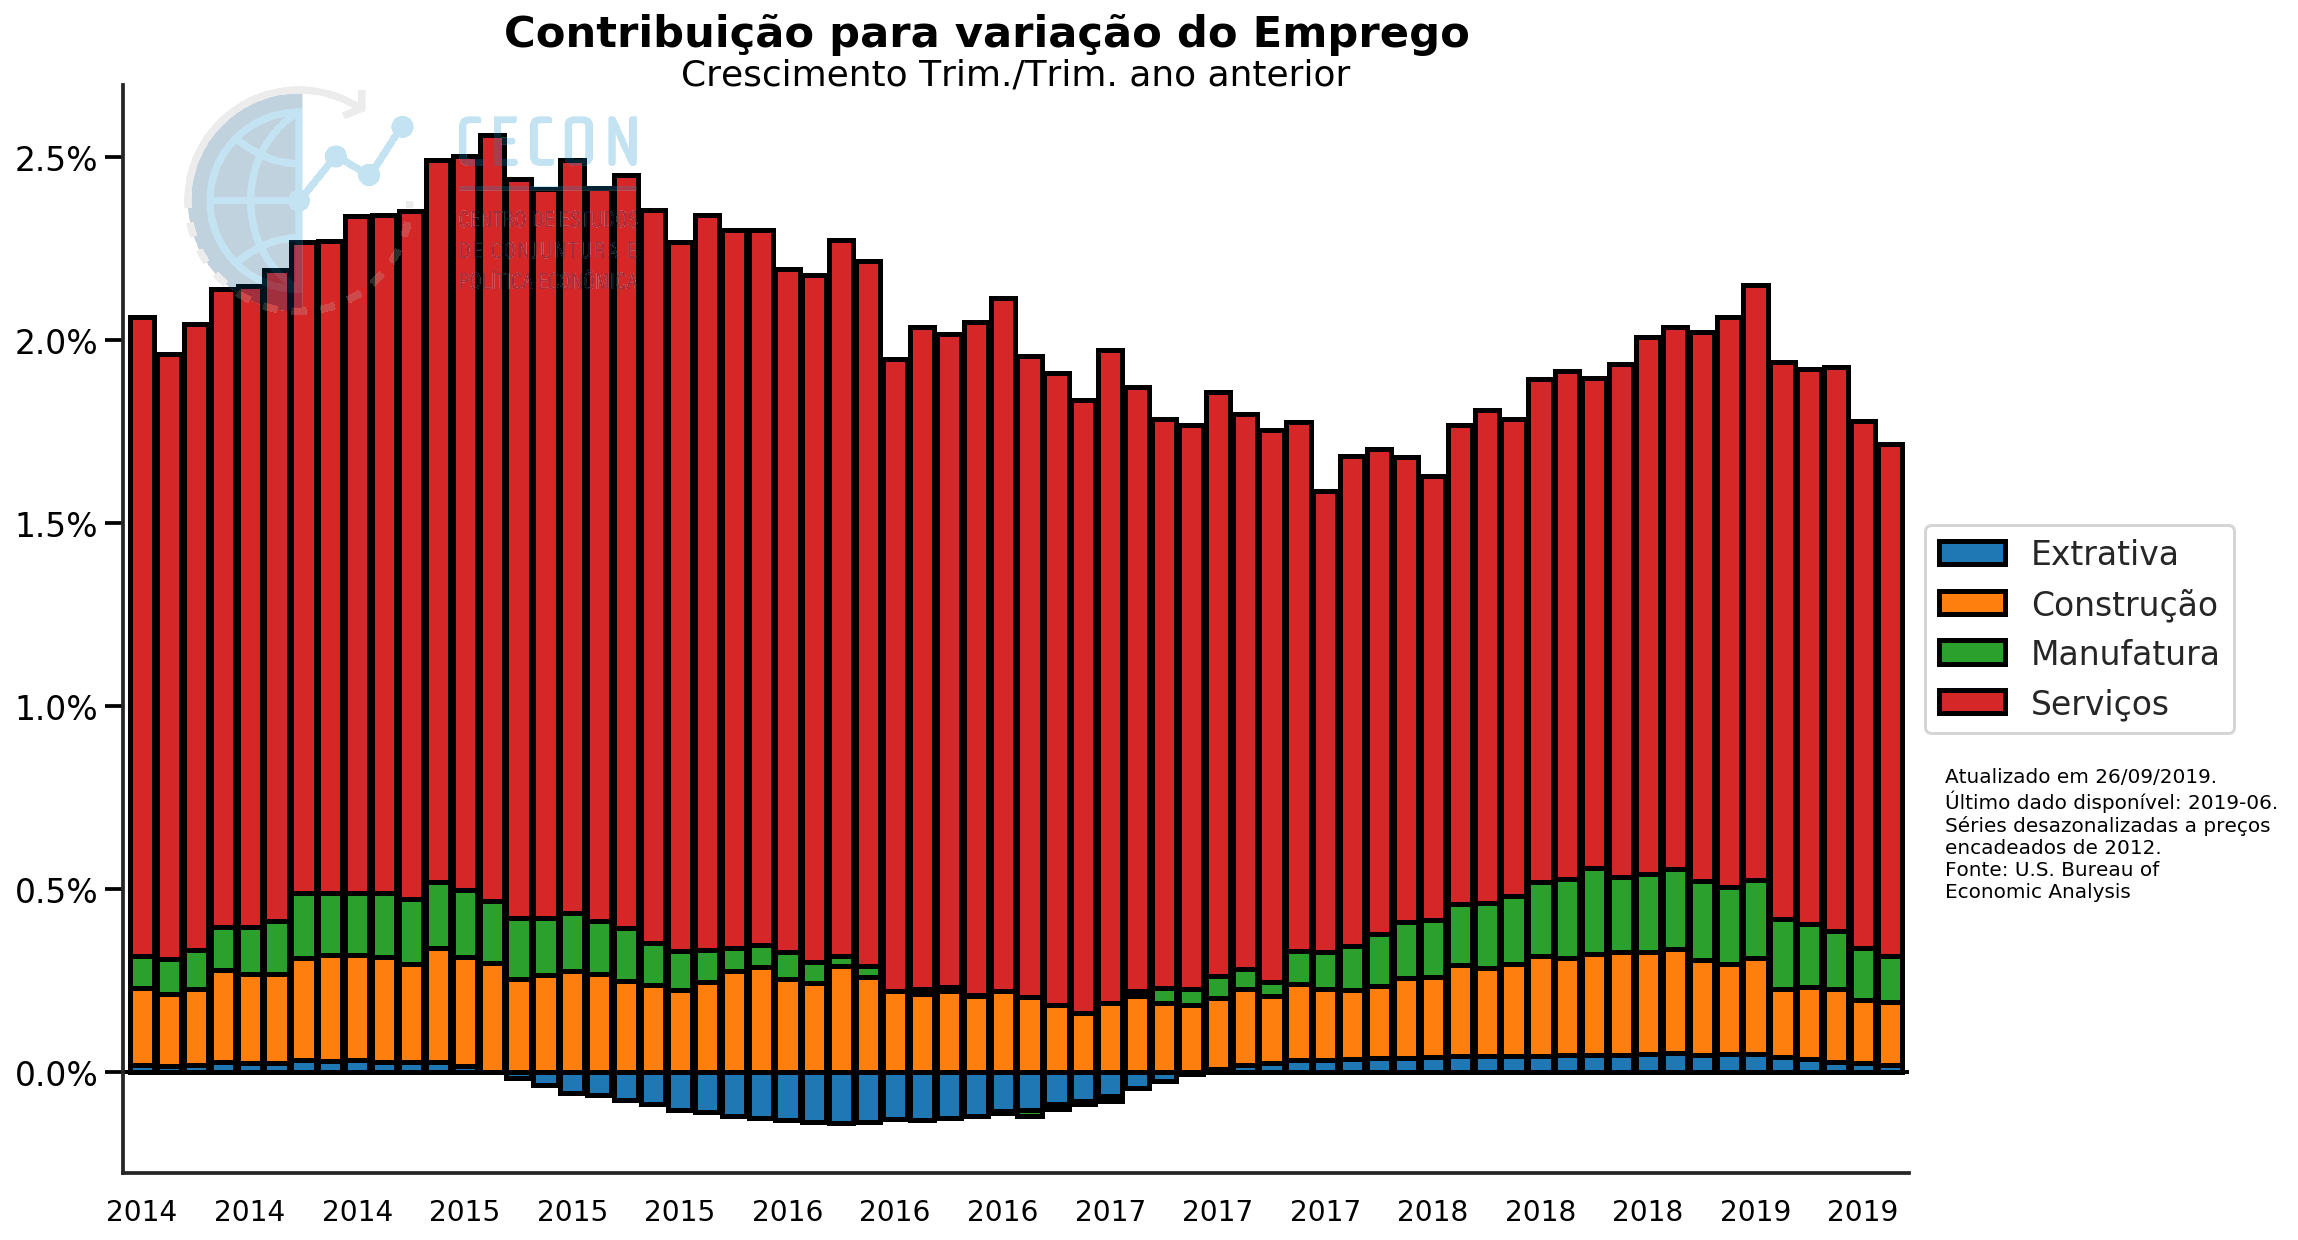

In [43]:
sns.set_context('talk')
fim = len(df.loc["2014-01-01":,"Total"])
periodo = len(df.loc["2018-01-01":"2018-12-01","Total"])
fig, ax = plt.subplots(figsize=(16, 10))

contribuicao = (df.drop("Total", axis='columns').diff(
    periodo).apply(lambda x: x / (df["Total"].shift(periodo))).tail(fim))
soma = df.drop("Total", axis='columns').diff(periodo).apply(lambda x: x / (df[
    "Total"].shift(periodo))).tail(fim).sum(axis=1)

contribuicao.apply(lambda x: (x / soma) * df["Total"].pct_change(periodo).tail(
    fim)).plot(
        kind='bar',
        stacked=True,
        ax=ax,
        width=0.9,
        # cmap="RdYlGn",
        edgecolor='black',
        linewidth=2.5,
        figsize=(16, 10),
        zorder=1)

ax.axhline(y=0, color='black', linestyle='-', lw=2)

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.suptitle(
    'Contribuição para variação do Emprego',
    color='black',
    weight='bold',
    y=.93)

ax.set_title('Crescimento Trim./Trim. ano anterior', color='black', y=.99)

ax.text(1.02,
        0.25,
        'Fonte: U.S. Bureau of \nEconomic Analysis',
        verticalalignment='bottom',
        horizontalalignment='left',
        transform=ax.transAxes,
        color='black',
        fontsize=10)
ax.text(1.02,
        0.29,
        'Atualizado em {}. \nÚltimo dado disponível: {}. \nSéries {}.'.format(
            datetime.datetime.now().strftime("%d/%m/%Y"),
            df.index[-1].to_period('M'),
            "desazonalizadas a preços \nencadeados de 2012"),
        verticalalignment='bottom',
        horizontalalignment='left',
        transform=ax.transAxes,
        color='black',
        fontsize=10)

ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.yaxis.label.set_color('black')
ax.xaxis.label.set_color('black')
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.1%}'.format(y)))

labels = [i.strftime("%Y") for i in df.tail(fim).index]
dates = ["" for i in df.tail(fim).index]

for i in range(len(dates)):

    if i % 4 == 0:
        dates[i] = labels[i]

ax.tick_params(axis='x', which='minor', width=1)

ax.xaxis.set_ticklabels(dates,
                        fontsize=14,
                        minor=False,
                        rotation=0,
                        color='black')
ax.xaxis.set_ticks_position('none')

ax2 = fig.add_axes([0.15, 0.7, 0.2, 0.2], zorder=0)
ax2.imshow(logo, aspect='equal', zorder=0, alpha=.25)

ax2.axis('off')

sns.despine()
fig.savefig(
    'Apresentacao/figs/Contrib_Emprego_Longa.png',
    bbox_inches='tight',
    dpi=300,
    pad_inches=0.05
)
plt.show()

### Desagregação serviços

In [44]:
df = web.DataReader(
    [
        'CES0800000001',  # All Employees: Private Service-Providing
        'USTPU',  # All Employees: Trade, Transportation and Utilities
        'USINFO',  # All Employees: Information Services
        'USFIRE', # All Employees: Financial Activities
        'USPBS', # All All Employees: Professional and Business Services
        'USEHS', # All Employees: Education and Health Services
        'USLAH', # All Employees: Leisure and Hospitality
        'USSERV', # All Employees: Other Services
    ],
    'fred',
    start,
    end)
df.columns = [
    "Total",
    "Transportes",
    "Informação",
    "Atividades financeiras",
    "Empresariais",
    "Educação e saúde",
    "Lazer e entretenimento",
    "Outros"
]
df.index.name = ''
df.tail()

Total  Transportes  Informação  Atividades financeiras  \
                                                                      
2019-02-01  107111        27827        2808                    8626   
2019-03-01  107251        27810        2812                    8637   
2019-04-01  107409        27809        2806                    8651   
2019-05-01  107485        27807        2815                    8656   
2019-06-01  107619        27815        2828                    8659   

            Empresariais  Educação e saúde  Lazer e entretenimento  Outros  
                                                                            
2019-02-01         21313             23999                   16646    5892  
2019-03-01         21332             24071                   16678    5911  
2019-04-01         21387             24142                   16687    5927  
2019-05-01         21408             24176                   16699    5924  
2019-06-01         21451             24224                   16703    5939

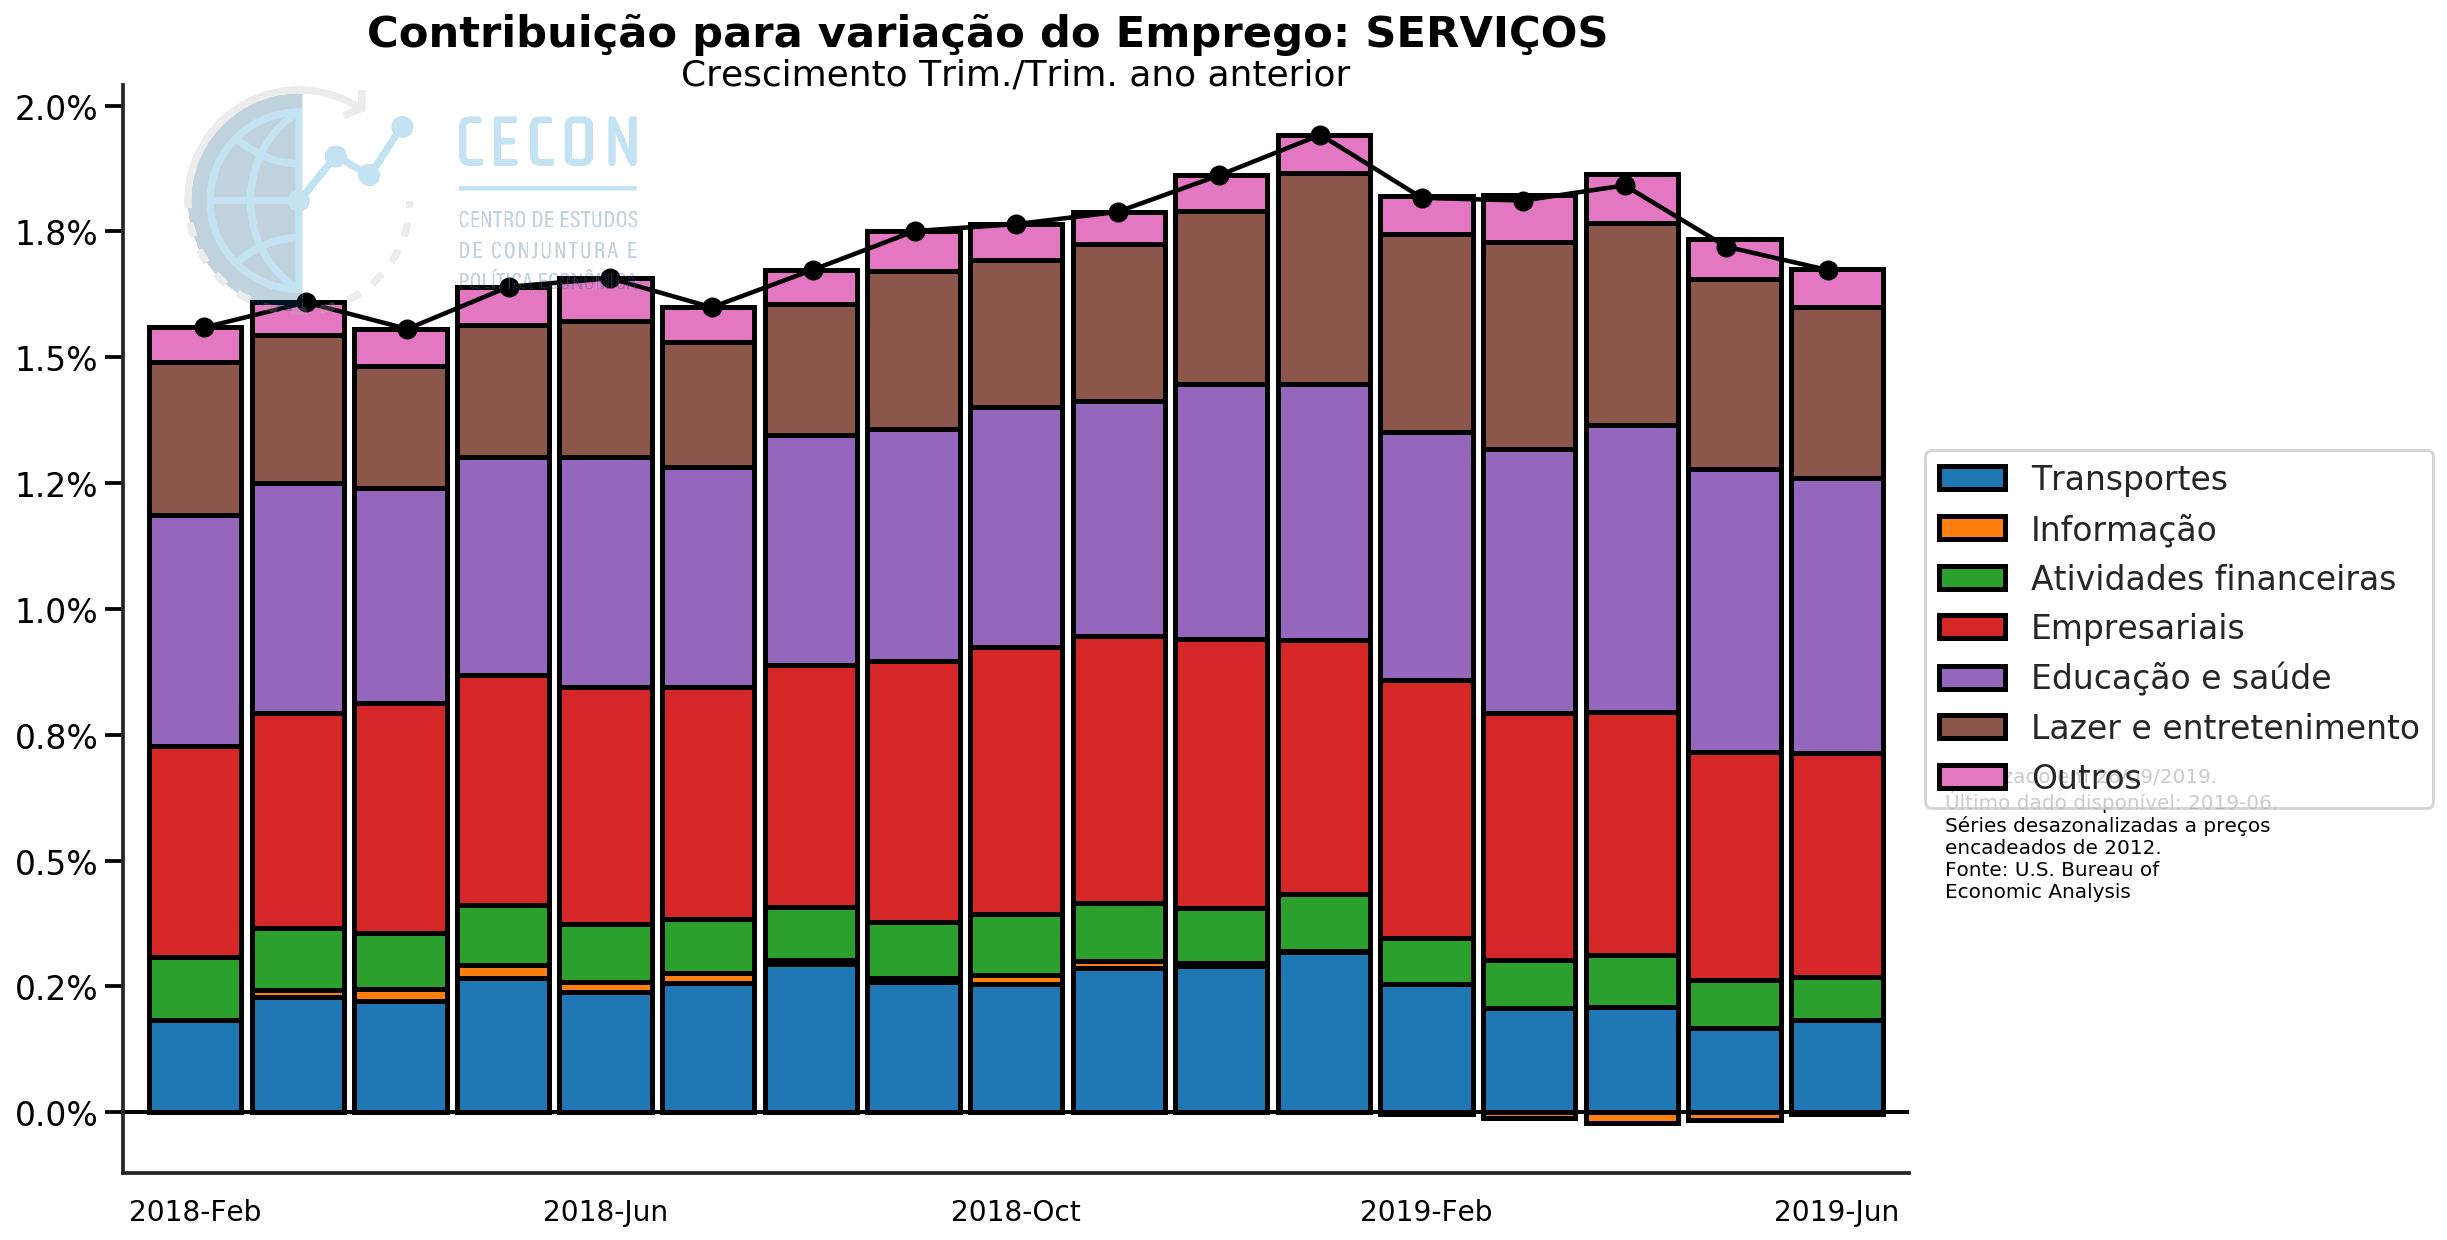

In [45]:
sns.set_context('talk')
#fim = len(df.loc["2007-06-01":,"Total"])
fim = 4*4 + 1
periodo = len(df.loc["2018-01-01":"2018-12-01","Total"])
fig, ax = plt.subplots(figsize=(16, 10))

contribuicao = (df.drop("Total", axis='columns').diff(
    periodo).apply(lambda x: x / (df["Total"].shift(periodo))).tail(fim))
soma = df.drop("Total", axis='columns').diff(periodo).apply(lambda x: x / (df[
    "Total"].shift(periodo))).tail(fim).sum(axis=1)

contribuicao.apply(lambda x: (x / soma) * df["Total"].pct_change(periodo).tail(
    fim)).plot(
        kind='bar',
        stacked=True,
        ax=ax,
        width=0.9,
        # cmap="RdYlGn",
        edgecolor='black',
        linewidth=2.5,
        figsize=(16, 10),
        zorder=1)

ax.axhline(y=0, color='black', linestyle='-', lw=2)

axl = ax.twiny()
axl.plot(ax.get_xticks(),
         df["Total"].pct_change(periodo).tail(fim),
         marker='o',
         ls='-',
         color='black',
         label="Total")

axl.axis('off')


# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.suptitle(
    'Contribuição para variação do Emprego: SERVIÇOS',
    color='black',
    weight='bold',
    y=.93)

ax.set_title('Crescimento Trim./Trim. ano anterior', color='black', y=.99)

ax.text(1.02,
        0.25,
        'Fonte: U.S. Bureau of \nEconomic Analysis',
        verticalalignment='bottom',
        horizontalalignment='left',
        transform=ax.transAxes,
        color='black',
        fontsize=10)
ax.text(1.02,
        0.29,
        'Atualizado em {}. \nÚltimo dado disponível: {}. \nSéries {}.'.format(
            datetime.datetime.now().strftime("%d/%m/%Y"),
            df.index[-1].to_period('M'),
            "desazonalizadas a preços \nencadeados de 2012"),
        verticalalignment='bottom',
        horizontalalignment='left',
        transform=ax.transAxes,
        color='black',
        fontsize=10)

ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.yaxis.label.set_color('black')
ax.xaxis.label.set_color('black')
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.1%}'.format(y)))

labels = [i.strftime("%Y-%b") for i in df.tail(fim).index]
dates = ["" for i in df.tail(fim).index]

for i in range(len(dates)):

    if i % 4 == 0:
        dates[i] = labels[i]

ax.tick_params(axis='x', which='minor', width=1)

ax.xaxis.set_ticklabels(dates,
                        fontsize=14,
                        minor=False,
                        rotation=0,
                        color='black')
ax.xaxis.set_ticks_position('none')

ax2 = fig.add_axes([0.15, 0.7, 0.2, 0.2], zorder=0)
ax2.imshow(logo, aspect='equal', zorder=0, alpha=.25)

ax2.axis('off')

sns.despine()
fig.savefig(
    'Apresentacao/figs/Contrib_Servicos_AnoAnterior.png',
    bbox_inches='tight',
    dpi=300,
    pad_inches=0.05
)
plt.show()

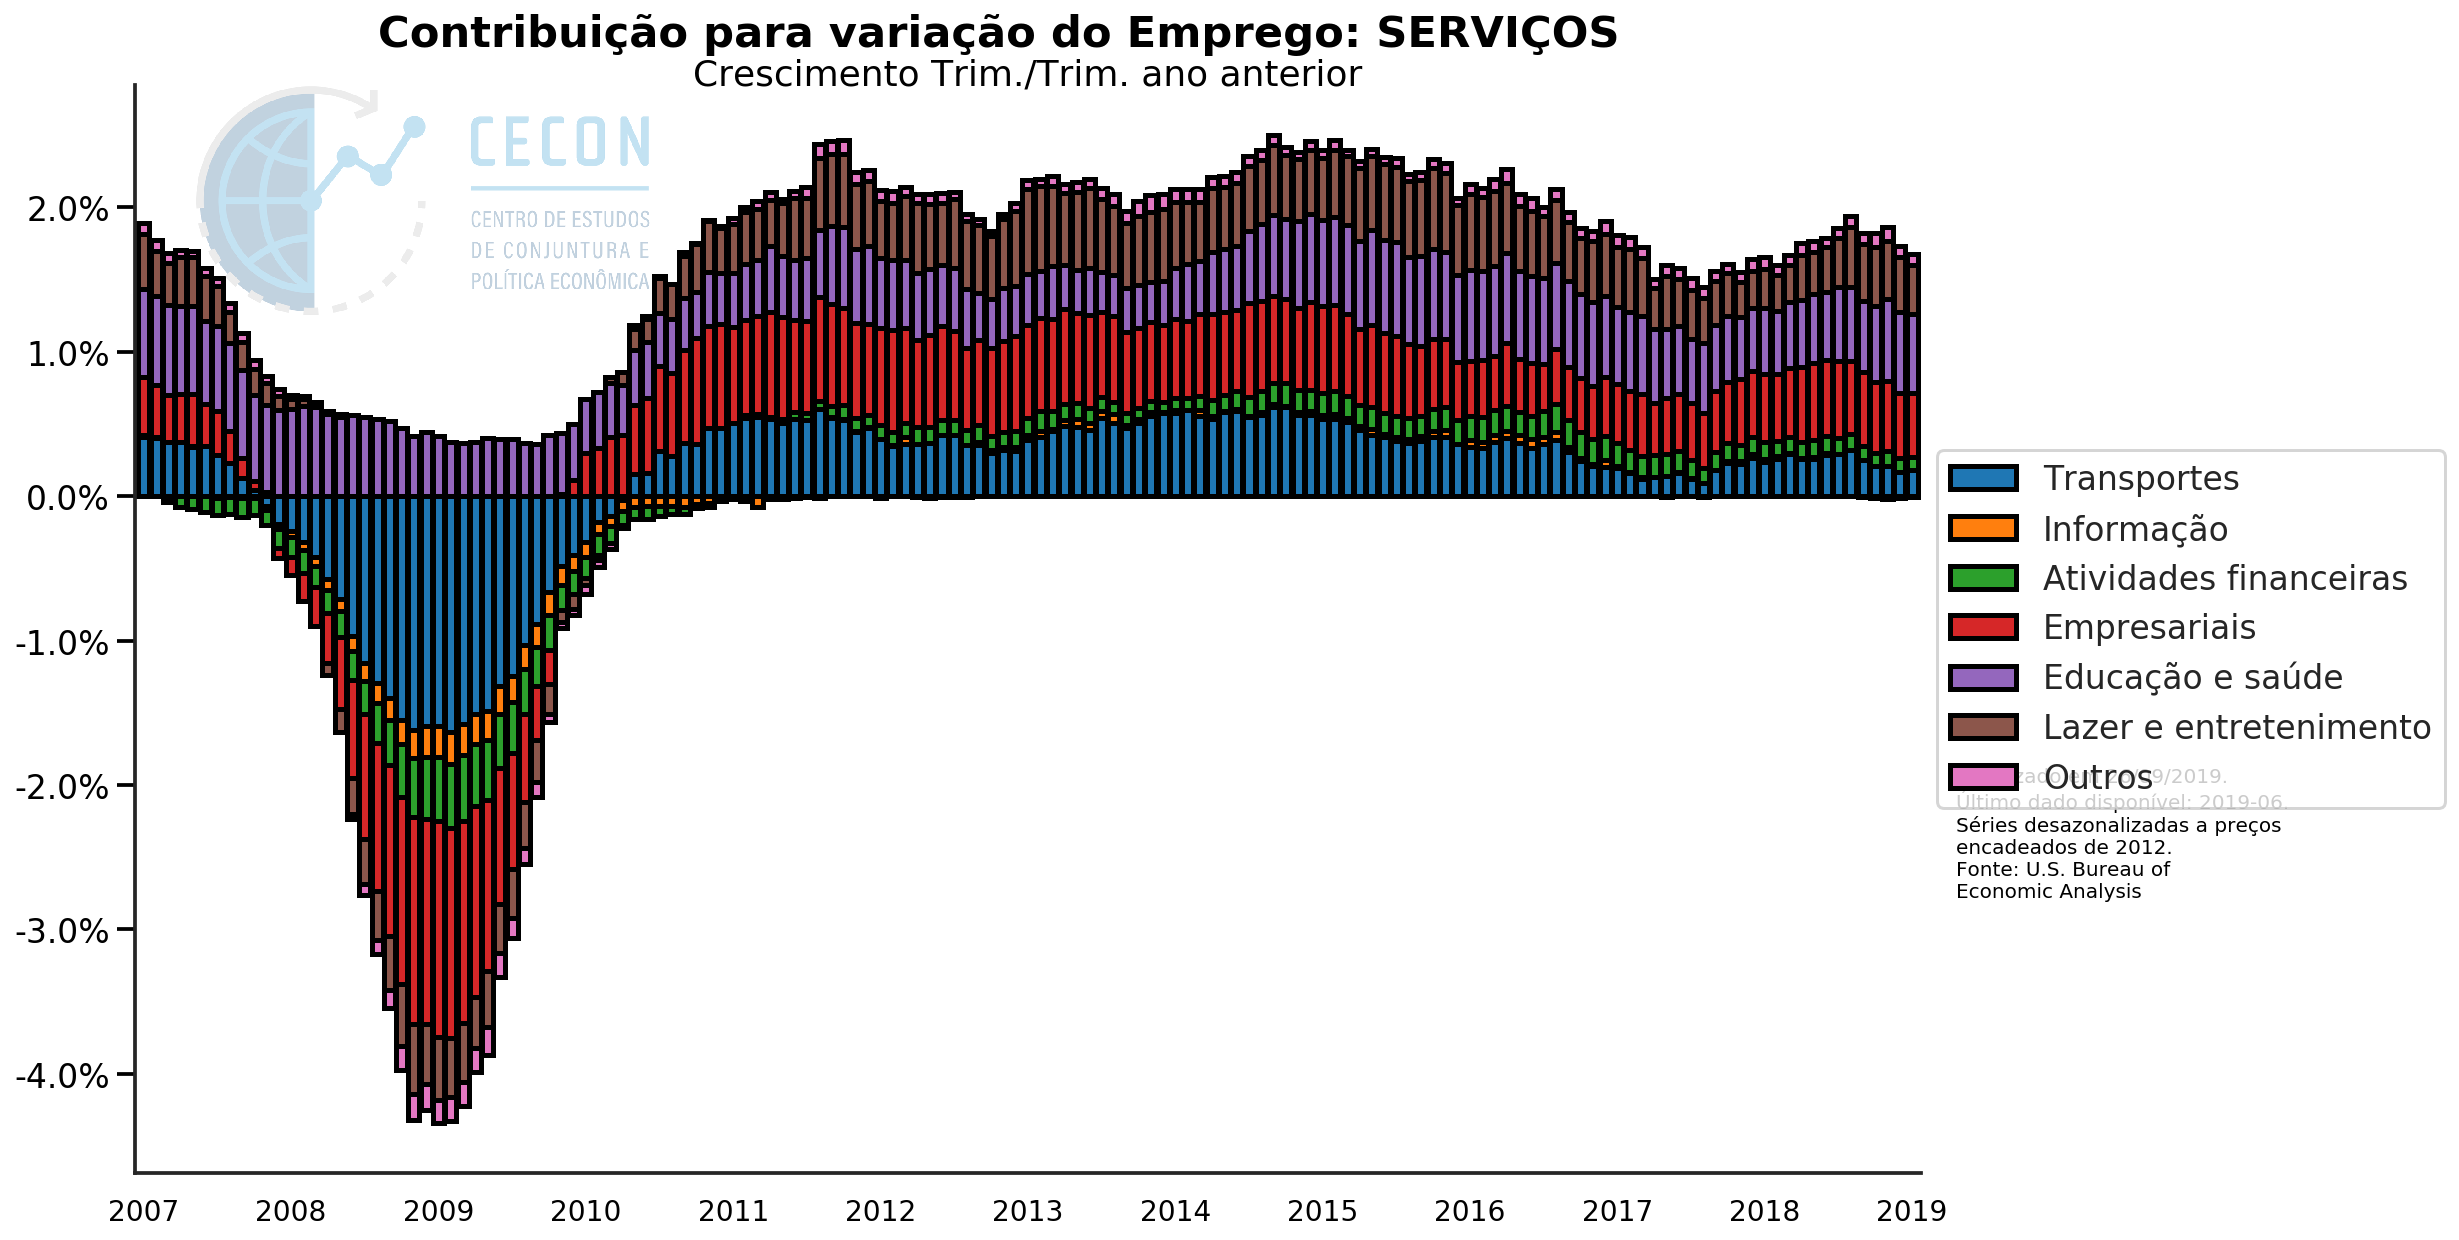

In [46]:
sns.set_context('talk')
fim = len(df.loc["2007-06-01":,"Total"])
periodo = len(df.loc["2018-01-01":"2018-12-01","Total"])
fig, ax = plt.subplots(figsize=(16, 10))

contribuicao = (df.drop("Total", axis='columns').diff(
    periodo).apply(lambda x: x / (df["Total"].shift(periodo))).tail(fim))
soma = df.drop("Total", axis='columns').diff(periodo).apply(lambda x: x / (df[
    "Total"].shift(periodo))).tail(fim).sum(axis=1)

contribuicao.apply(lambda x: (x / soma) * df["Total"].pct_change(periodo).tail(
    fim)).plot(
        kind='bar',
        stacked=True,
        ax=ax,
        width=0.9,
        # cmap="RdYlGn",
        edgecolor='black',
        linewidth=2.5,
        figsize=(16, 10),
        zorder=1)

ax.axhline(y=0, color='black', linestyle='-', lw=2)

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.suptitle(
    'Contribuição para variação do Emprego: SERVIÇOS',
    color='black',
    weight='bold',
    y=.93)

ax.set_title('Crescimento Trim./Trim. ano anterior', color='black', y=.99)

ax.text(1.02,
        0.25,
        'Fonte: U.S. Bureau of \nEconomic Analysis',
        verticalalignment='bottom',
        horizontalalignment='left',
        transform=ax.transAxes,
        color='black',
        fontsize=10)
ax.text(1.02,
        0.29,
        'Atualizado em {}. \nÚltimo dado disponível: {}. \nSéries {}.'.format(
            datetime.datetime.now().strftime("%d/%m/%Y"),
            df.index[-1].to_period('M'),
            "desazonalizadas a preços \nencadeados de 2012"),
        verticalalignment='bottom',
        horizontalalignment='left',
        transform=ax.transAxes,
        color='black',
        fontsize=10)

ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.yaxis.label.set_color('black')
ax.xaxis.label.set_color('black')
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.1%}'.format(y)))

labels = [i.strftime("%Y") for i in df.tail(fim).index]
dates = ["" for i in df.tail(fim).index]

for i in range(len(dates)):

    if i % 12 == 0:
        dates[i] = labels[i]

ax.tick_params(axis='x', which='minor', width=1)

ax.xaxis.set_ticklabels(dates,
                        fontsize=14,
                        minor=False,
                        rotation=0,
                        color='black')
ax.xaxis.set_ticks_position('none')

ax2 = fig.add_axes([0.15, 0.7, 0.2, 0.2], zorder=0)
ax2.imshow(logo, aspect='equal', zorder=0, alpha=.25)

ax2.axis('off')

sns.despine()
fig.savefig(
    'Apresentacao/figs/Contrib_Serviços_Longa.png',
    bbox_inches='tight',
    dpi=300,
    pad_inches=0.05
)
plt.show()

## Salários reais

In [47]:

df.tail()

Total  Transportes  Informação  Atividades financeiras  \
                                                                      
2019-02-01  107111        27827        2808                    8626   
2019-03-01  107251        27810        2812                    8637   
2019-04-01  107409        27809        2806                    8651   
2019-05-01  107485        27807        2815                    8656   
2019-06-01  107619        27815        2828                    8659   

            Empresariais  Educação e saúde  Lazer e entretenimento  Outros  
                                                                            
2019-02-01         21313             23999                   16646    5892  
2019-03-01         21332             24071                   16678    5911  
2019-04-01         21387             24142                   16687    5927  
2019-05-01         21408             24176                   16699    5924  
2019-06-01         21451             24224                   16703    5939

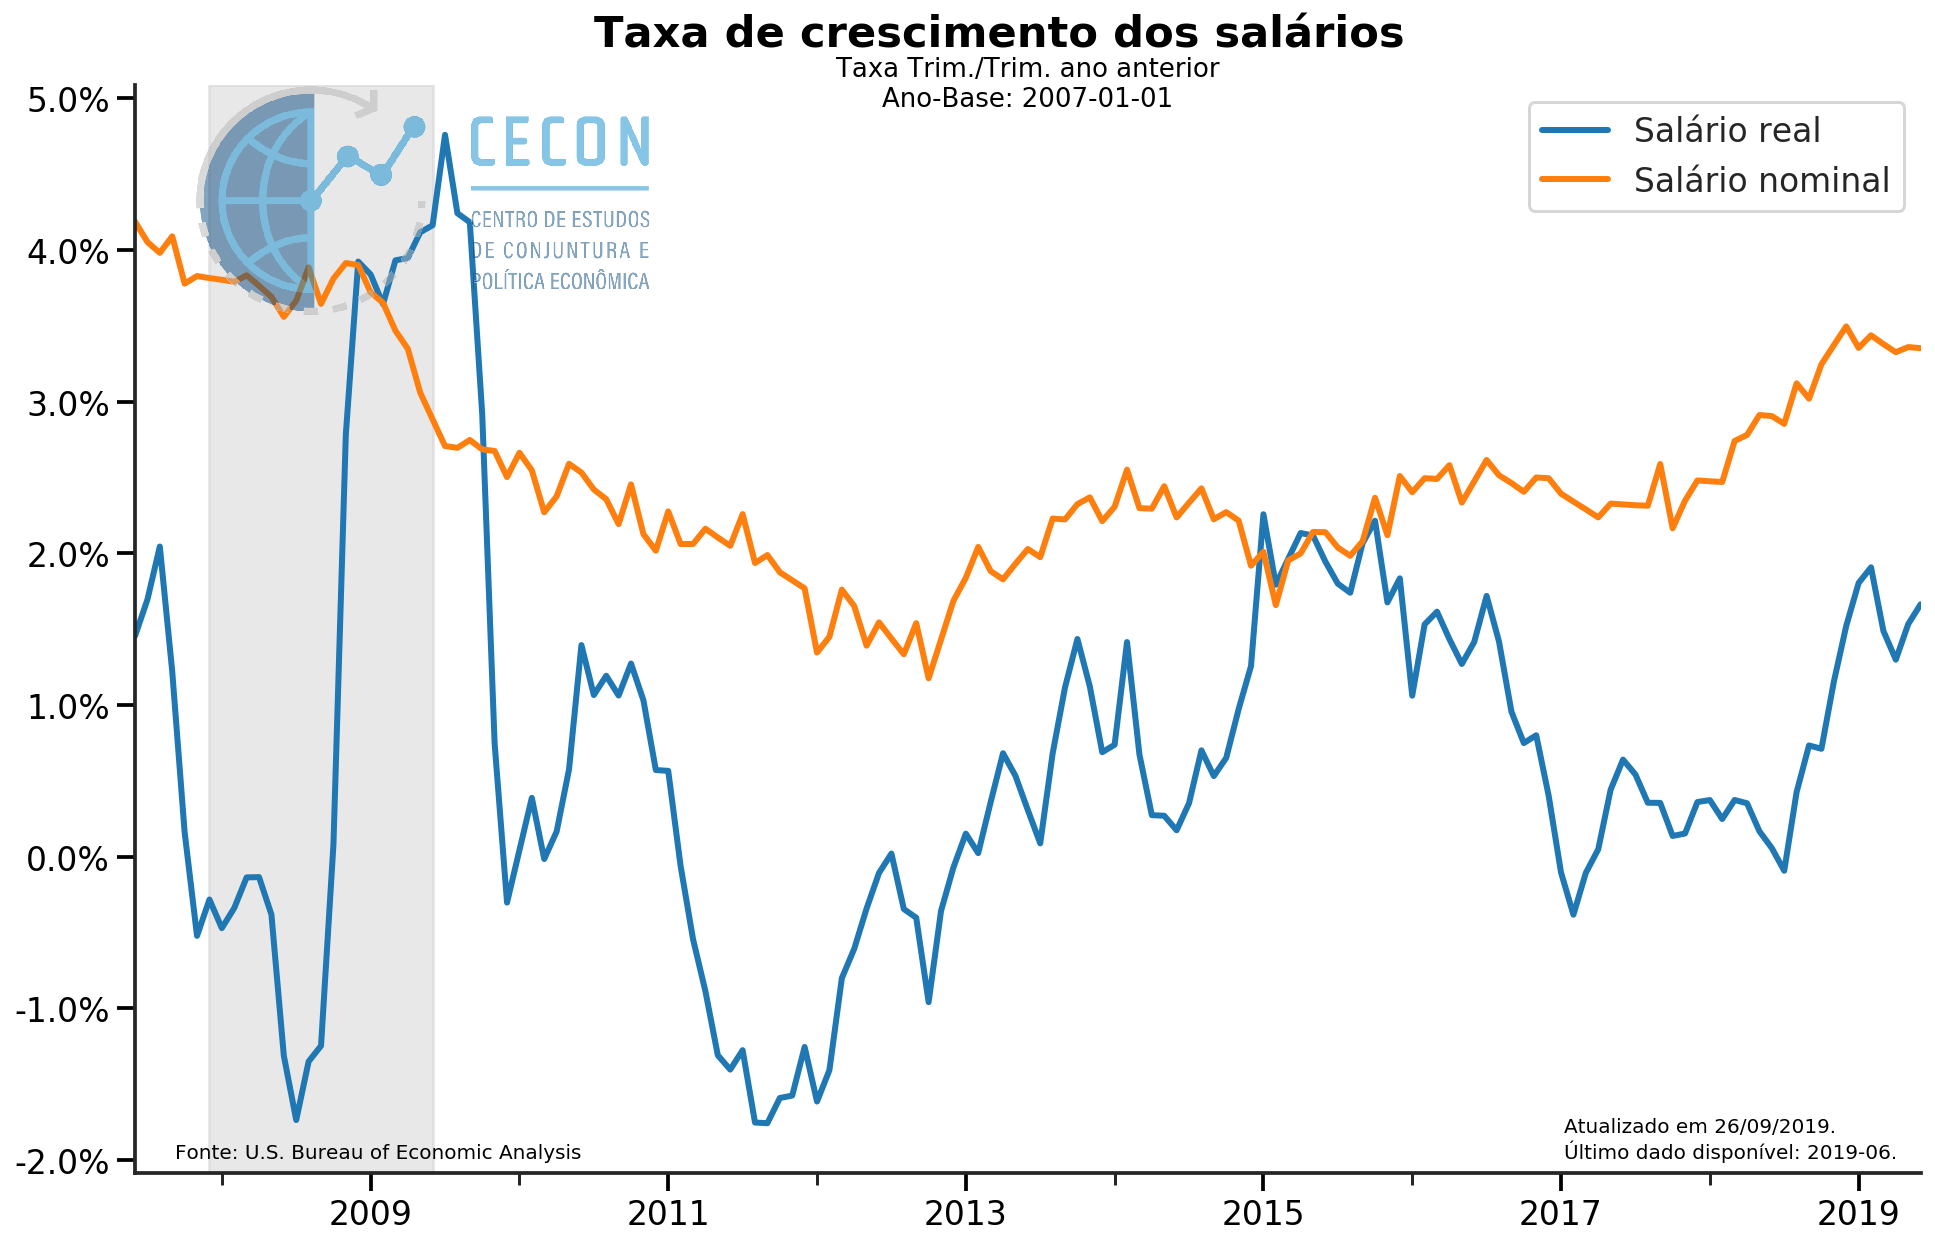

Salário nominal  Índice de preços  Salário real
                                                           
2019-02-01              1.2               0.1           1.1
2019-03-01              1.1               0.5           0.6
2019-04-01              0.9               0.9           0.0
2019-05-01              1.2               1.0           0.2
2019-06-01              1.1               0.9           0.3

In [48]:
df = web.DataReader(
    [
        'AHETPI',
        'CPIAUCSL'
    ],
    'fred',
    start, end
)
df.columns = [
    "Salário nominal",
    "Índice de preços"
]
ano_base = "2007-01-01"
df["Salário real"] = (df["Salário nominal"]/df["Índice de preços"])*df.loc[ano_base,"Índice de preços"]
df.index.name = ''

fim = len(df.loc["2007-06-01":,"Salário real"])
periodo = len(df.loc["2018-01-01":"2018-12-01","Salário real"])
fig, ax = plt.subplots()

(df[["Salário real", "Salário nominal"]]/100).pct_change(periodo).tail(fim).plot(
    ax=ax,
    lw=3,
    figsize=(16, 10),
    zorder=1
)

plt.suptitle(
    'Taxa de crescimento dos salários',
    color='black',
    weight='bold',
    y=.93
)

ax.axvspan(xmin = "2007-12-01", xmax = "2009-06-01", color = 'lightgray', alpha = .5)

ax.set_title(
    'Taxa Trim./Trim. ano anterior\nAno-Base: {}'.format(ano_base),
    color='black',
    fontsize = 13,
    y=.97
)

ax.text(0.25,
        0.01,
        'Fonte: U.S. Bureau of Economic Analysis',
        verticalalignment='bottom',
        horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=10)
ax.text(
    0.8,
    0.01,
    'Atualizado em {}. \nÚltimo dado disponível: {}.'.format(
        datetime.datetime.now().strftime("%d/%m/%Y"),
        df.index[-1].to_period('M')
    ),
    verticalalignment='bottom',
    horizontalalignment='left',
    transform=ax.transAxes,
    color='black',
    fontsize=10
)

ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.yaxis.label.set_color('black')
ax.xaxis.label.set_color('black')
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.1%}'.format(y)))

ax.legend(loc='upper right')

ax2 = fig.add_axes([0.15, 0.7, 0.2, 0.2])
ax2.imshow(
    logo,
    aspect='equal',
    zorder=0,
    alpha=.5
)

ax2.axis('off')

sns.despine()
fig.savefig(
    'Apresentacao/figs/NominalReal_Wage.png',
    bbox_inches='tight',
    dpi=300,
    pad_inches=0.05
)
plt.show()
(df.pct_change(4).round(3)*100).tail()

# Lado Monetário

## Taxa de juros

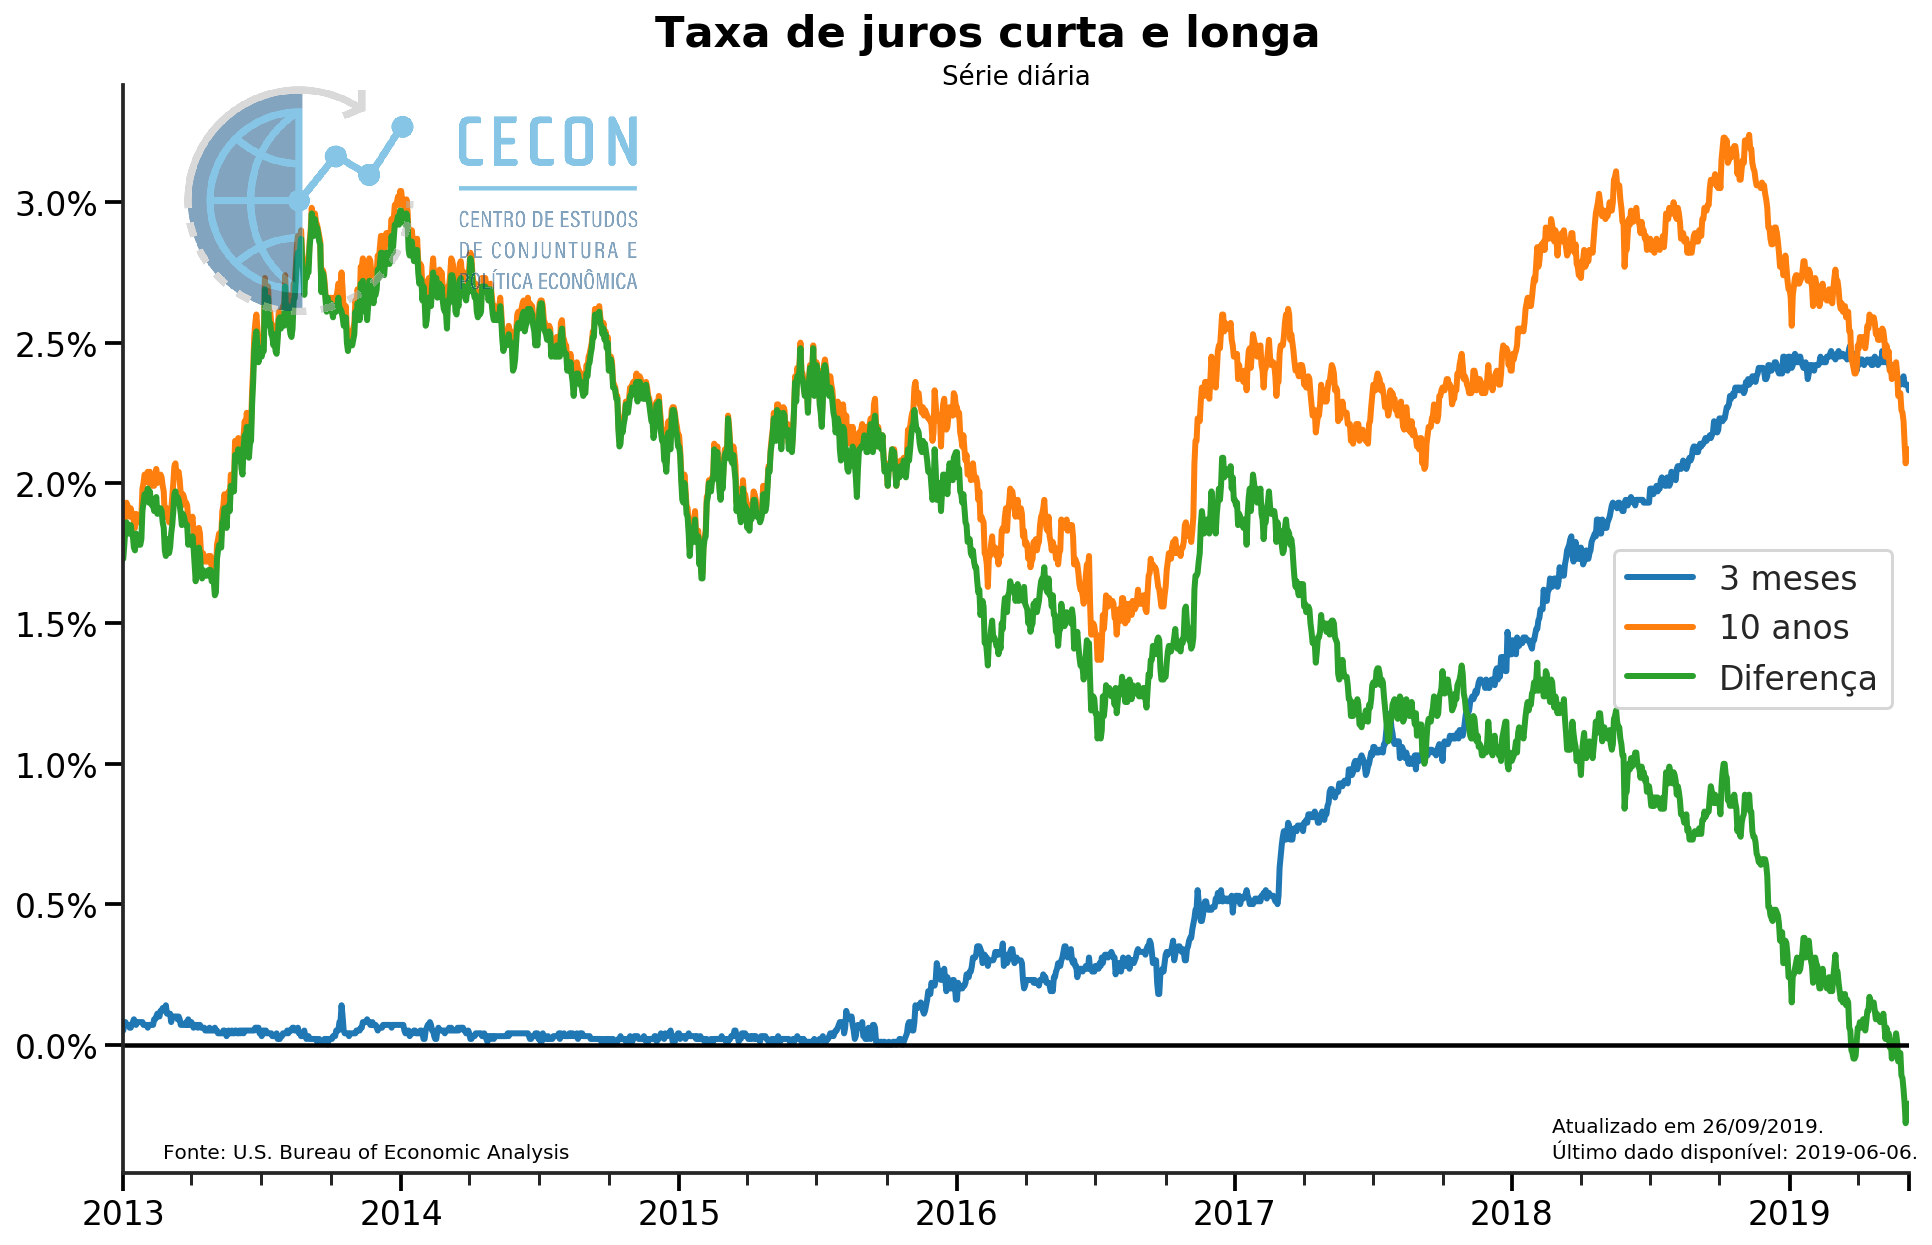

3 meses  10 anos  Diferença
                                       
2019-05-31     2.35     2.14      -0.21
2019-06-03     2.35     2.07      -0.28
2019-06-04     2.35     2.12      -0.23
2019-06-05     2.35     2.12      -0.23
2019-06-06     2.33     2.12      -0.21

In [49]:
df = web.DataReader(
    [
        'DGS3MO',
        'DGS10',
        'T10Y3M'
    ],
    'fred',
    start, end
)
df.columns = [
    "3 meses",
    "10 anos",
    "Diferença"
]
df.index.name = ''
df = df.fillna(method='ffill')

fim = len(df.loc["2013-01-01":,"Diferença"])
periodo = len(df.loc["2018-01-01":"2018-12-01","Diferença"])

sns.set_context('talk')
fig, ax = plt.subplots()

(df/100).tail(fim).plot(
    ax=ax,
    lw=3,
    figsize=(16, 10),
    zorder=1
)

plt.suptitle(
    'Taxa de juros curta e longa',
    color='black',
    weight='bold',
    y=.93
)

ax.set_title(
    'Série diária',
    color='black',
    fontsize = 13,
    y=.99
)

ax.axhline(y = 0, color = 'black')
ax.axvspan(xmin = "2007-12-01", xmax = "2009-06-01", color = 'lightgray', alpha = .5)

ax.text(0.25,
        0.01,
        'Fonte: U.S. Bureau of Economic Analysis',
        verticalalignment='bottom',
        horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=10)
ax.text(
    0.8,
    0.01,
    'Atualizado em {}. \nÚltimo dado disponível: {}.'.format(
        datetime.datetime.now().strftime("%d/%m/%Y"),
        df.index[-1].to_period('D')
    ),
    verticalalignment='bottom',
    horizontalalignment='left',
    transform=ax.transAxes,
    color='black',
    fontsize=10
)

ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.yaxis.label.set_color('black')
ax.xaxis.label.set_color('black')
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.1%}'.format(y)))

ax.legend(loc='best')

ax2 = fig.add_axes([0.15, 0.7, 0.2, 0.2])
ax2.imshow(
    logo,
    aspect='equal',
    zorder=0,
    alpha=.5
)

ax2.axis('off')

sns.despine()
fig.savefig(
    'Apresentacao/figs/Juros.png',
    bbox_inches='tight',
    dpi=300,
    pad_inches=0.05
)
plt.show()
df.tail()

## Inflação

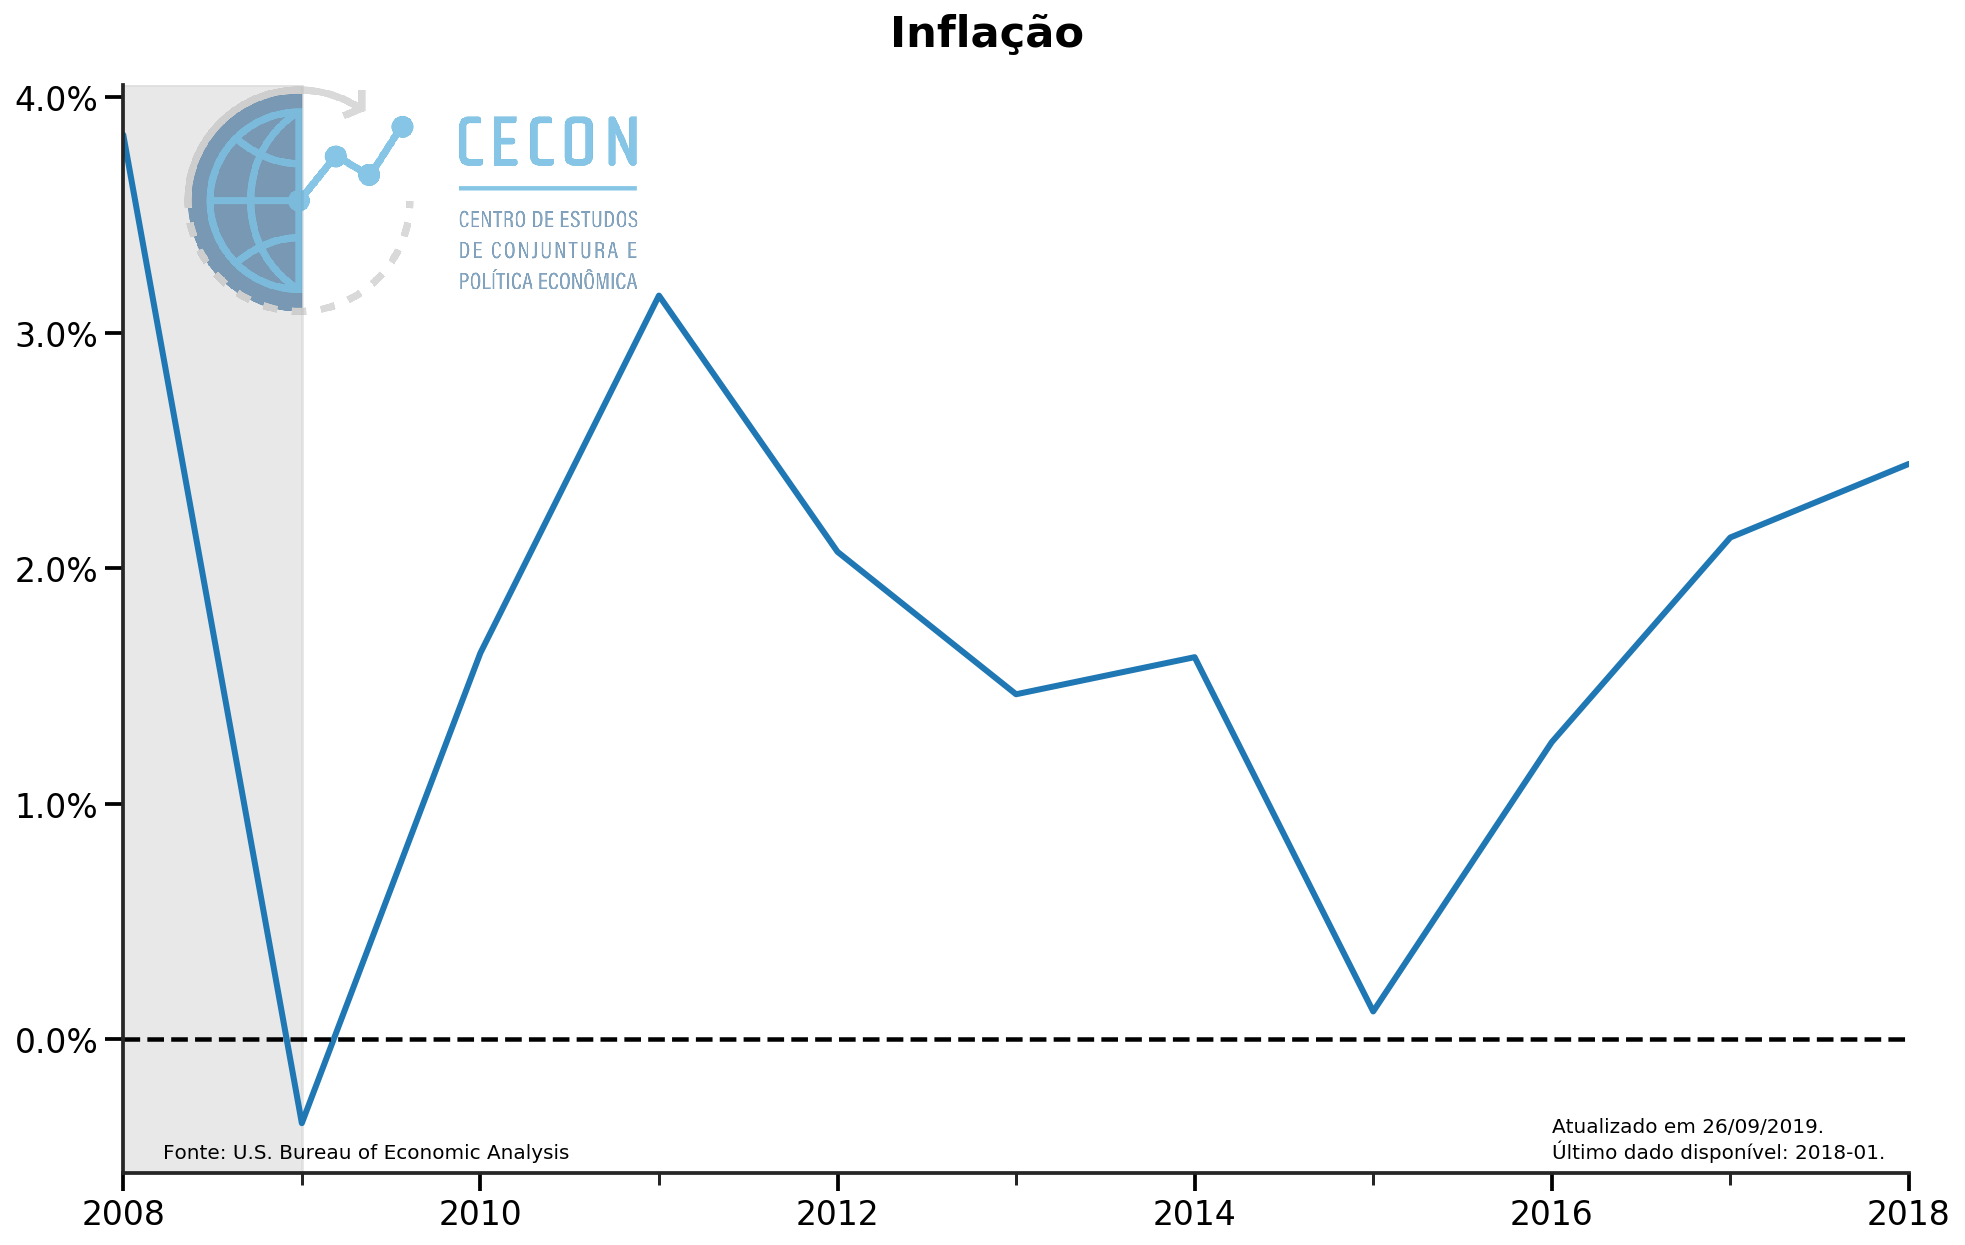

Inflação
                    
2014-01-01  0.016222
2015-01-01  0.001186
2016-01-01  0.012616
2017-01-01  0.021301
2018-01-01  0.024426

In [50]:
df = web.DataReader(
    [
        'FPCPITOTLZGUSA', # Inflation, consumer prices for the United States
    ],
    'fred',
    start, end
)
df.columns = [
    "Inflação"
]
df.index.name = ''

fim = len(df.loc["2007-11-01":,])
periodo = 1
fig, ax = plt.subplots()
sns.set_context('talk')

(df/100).tail(fim).plot(
    ax=ax,
    lw=3,
    legend = False,
    figsize=(16, 10),
    zorder=1
)

plt.suptitle(
    'Inflação',
    color='black',
    weight='bold',
    y=.93
)

ax.axhline(y = 0, color = 'black', ls = '--')
ax.axvspan(xmin = "2007-12-01", xmax = "2009-06-01", color = 'lightgray', alpha = .5)

ax.text(0.25,
        0.01,
        'Fonte: U.S. Bureau of Economic Analysis',
        verticalalignment='bottom',
        horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=10)
ax.text(
    0.8,
    0.01,
    'Atualizado em {}. \nÚltimo dado disponível: {}.'.format(
        datetime.datetime.now().strftime("%d/%m/%Y"),
        df.index[-1].to_period('M')
    ),
    verticalalignment='bottom',
    horizontalalignment='left',
    transform=ax.transAxes,
    color='black',
    fontsize=10
)

ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.yaxis.label.set_color('black')
ax.xaxis.label.set_color('black')
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.1%}'.format(y)))


ax2 = fig.add_axes([0.15, 0.7, 0.2, 0.2])
ax2.imshow(
    logo,
    aspect='equal',
    zorder=0,
    alpha=.5
)

ax2.axis('off')

sns.despine()
fig.savefig(
    'Apresentacao/figs/Inflacao.png',
    bbox_inches='tight',
    dpi=300,
    pad_inches=0.05
)
plt.show()
(df/100).tail()